# CSAS CHALLENGE
    Name: Olubayode Ebenezer
    Email: Olubayodeeben@gmail.com

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline

In [2]:
# pip install scikit-learn

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# pip install polars

In [5]:
# pip install pyarrow

In [6]:
import polars as pl

## Read the arrow file into a Table
ad = 'C:/Users/OLUBAYODE/Documents/NEW RESEARCH/statcast_pitch_swing_data_20240402_20240630.arrow'
df = pl.read_ipc(ad, use_pyarrow = True)
df.describe()

## Convert polar dataframe to pandas dataframe
train_data = df.to_pandas()
train_data.describe()

release_speed  release_pos_x  release_pos_z         batter  \
count  345997.000000  345998.000000  345998.000000  346250.000000   
mean       89.054222      -0.808297       5.760631  640341.389103   
std         5.938723       1.870899       0.536150   50853.025059   
min        31.900000      -4.680000       0.850000  444482.000000   
25%        84.700000      -2.120000       5.490000  621028.000000   
50%        89.900000      -1.490000       5.800000  663624.000000   
75%        93.900000       0.920000       6.090000  671218.000000   
max       104.000000       4.620000       7.530000  808982.000000   

             pitcher           zone  hit_location          balls  \
count  346250.000000  345998.000000  78362.000000  346250.000000   
mean   635722.940624       9.040442      5.150902       0.871962   
std     53502.645360       4.239416      2.629989       0.965441   
min    434378.000000       1.000000      1.000000       0.000000   
25%    607192.000000       5.000000      2.000000       0.000000   
50%    656887.000000      11.000000      5.000000       1.000000   
75%    670059.000000      13.000000      8.000000       1.000000   
max    814005.000000      14.000000      9.000000       3.000000   

             strikes  game_year          pfx_x          pfx_z        plate_x  \
count  346250.000000   346250.0  345998.000000  345998.000000  345998.000000   
mean        0.904251     2024.0      -0.095900       0.591223       0.062214   
std         0.827965        0.0       0.902485       0.702850       0.836200   
min         0.000000     2024.0      -2.950000      -2.450000      -5.360000   
25%         0.000000     2024.0      -0.870000       0.130000      -0.500000   
50%         1.000000     2024.0      -0.150000       0.630000       0.060000   
75%         2.000000     2024.0       0.630000       1.190000       0.620000   
max         2.000000     2024.0       2.400000       2.310000      10.200000   

             plate_z          on_3b          on_2b          on_1b  \
count  345998.000000   32101.000000   65035.000000  104428.000000   
mean        2.295089  642052.580948  640968.709587  640124.114289   
std         0.961557   49723.564380   50074.820570   51132.863852   
min        -3.080000  444482.000000  444482.000000  444482.000000   
25%         1.670000  621466.000000  621043.000000  621020.000000   
50%         2.300000  663647.000000  663586.000000  663538.000000   
75%         2.930000  672279.000000  671289.000000  670770.000000   
max        12.360000  808982.000000  808982.000000  808982.000000   

        outs_when_up         inning          hc_x          hc_y  \
count  346250.000000  346250.000000  61082.000000  61082.000000   
mean        0.982836       4.956679    126.177755    122.756087   
std         0.816989       2.597164     40.514531     41.069789   
min         0.000000       1.000000      3.060000      5.540000   
25%         0.000000       3.000000    101.320000     90.650000   
50%         1.000000       5.000000    124.870000    124.260000   
75%         2.000000       7.000000    153.550000    156.790000   
max         2.000000      14.000000    246.910000    229.130000   

           fielder_2            vx0            vy0            vz0  \
count  346250.000000  345998.000000  345998.000000  345998.000000   
mean   633344.158157       2.398634    -129.522563      -3.719869   
std     53619.558574       5.853288       8.595455       2.957339   
min    455117.000000     -19.523847    -151.396705     -19.381509   
25%    605170.000000      -1.854107    -136.470492      -5.709351   
50%    663698.000000       4.025733    -130.797936      -3.781349   
75%    669134.000000       6.638144    -123.286139      -1.804769   
max    700250.000000      22.674362     -43.668850      18.192088   

                  ax             ay             az         sz_top  \
count  345998.000000  345998.000000  345998.000000  345998.000000   
mean       -1.968751      27.089454     -24.161284       3.414360

In [7]:
train_data.head()

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         FF  2024-04-02           95.0          -2.01           5.22   
1         CH  2024-04-02           88.5          -2.09           4.95   
2         SI  2024-04-02           95.0          -2.02           5.12   
3         SI  2024-04-02           90.7          -1.26           5.13   
4         FF  2024-04-02           95.4          -1.95           5.12   

       player_name  batter  pitcher     events    description spin_dir  \
0  Rocchio, Brayan  677587   622491     single  hit_into_play     None   
1  Rocchio, Brayan  677587   622491                      foul     None   
2  Rocchio, Brayan  677587   622491             called_strike     None   
3   Ohtani, Shohei  660271   657277       walk           ball     None   
4   Hedges, Austin  595978   622491  strikeout       foul_tip     None   

  spin_rate_deprecated break_angle_deprecated break_length_deprecated  zone  \
0                 None                   None                    None   3.0   
1                 None                   None                    None   4.0   
2                 None                   None                    None   2.0   
3                 None                   None                    None  11.0   
4                 None                   None                    None   5.0   

                                                 des game_type stand p_throws  \
0  Brayan Rocchio singles on a pop up to left fie...         R     L        R   
1  Brayan Rocchio singles on a pop up to left fie...         R     L        R   
2  Brayan Rocchio singles on a pop up to left fie...         R     L        R   
3   Shohei Ohtani walks.   Enrique Hernández to 2nd.         R     L        R   
4           Austin Hedges strikes out on a foul tip.         R     R        R   

  home_team away_team type  hit_location bb_type  balls  strikes  game_year  \
0       SEA       CLE    X           7.0   popup      0        2       2024   
1       SEA       CLE    S           NaN              0        1       2024   
2       SEA       CLE    S           NaN              0        0       2024   
3       LAD        SF    B           NaN              3        0       2024   
4       SEA       CLE    S           2.0              1        2       2024   

   pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b     on_1b  outs_when_up  \
0  -0.85   1.20     0.69     3.18    NaN    NaN  666310.0             2   
1  -1.40   0.07    -0.30     2.29    NaN    NaN  666310.0             2   
2  -1.48   0.15    -0.14     3.15    NaN    NaN  666310.0             2   
3  -1.45   0.09    -2.25     3.29    NaN    NaN  571771.0             2   
4  -1.08   0.90    -0.04     2.52    NaN    NaN  666310.0             1   

   inning inning_topbot   hc_x    hc_y tfs_deprecated tfs_zulu_deprecated  \
0       6           Top  87.46  125.97           None                None   
1       6           Top    NaN     NaN           None                None   
2       6           Top    NaN     NaN           None                None   
3       4           Bot    NaN     NaN           None                None   
4       6           Top    NaN     NaN           None                None   

   fielder_2 umpire sv_id       vx0         vy0       vz0         ax  \
0     663728   None  None  8.809589 -138.184461 -2.337745 -12.836936   
1     663728   None  None  7.152185 -128.763652 -0.628007 -17.009072   
2     663728   None  None  8.099205 -138.195334  0.123694 -20.789685   
3     672275   None  None  0.620900 -132.024381  1.226850 -16.888058   
4     663728   None  None  7.315465 -138.777335 -3.229775 -15.530020   

          ay         az  sz_top  sz_bot  hit_distance_sc  launch_speed  \
0  30.274047 -16.442679    3.10    1.40            180.0          61.9   
1  24.589996 -31.420628    3.10    1.40              3.0          69.0   
2  29.584680 -30.453101    3.09    1.39              NaN           NaN   
3  32.439688 -31.639916    3.55    1.6

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346250 entries, 0 to 346249
Data columns (total 94 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pitch_type                       346250 non-null  object 
 1   game_date                        346250 non-null  object 
 2   release_speed                    345997 non-null  float64
 3   release_pos_x                    345998 non-null  float64
 4   release_pos_z                    345998 non-null  float64
 5   player_name                      346250 non-null  object 
 6   batter                           346250 non-null  int32  
 7   pitcher                          346250 non-null  int32  
 8   events                           346250 non-null  object 
 9   description                      346250 non-null  object 
 10  spin_dir                         0 non-null       object 
 11  spin_rate_deprecated             0 non-null       object 
 12  br

In [9]:
train_data['pitch_type'].unique()

array(['FF', 'CH', 'SI', 'KC', 'SL', 'ST', 'FC', 'CU', 'SV', 'FS', 'PO',
       'FO', 'FA', 'KN', 'EP', 'CS', ''], dtype=object)

In [10]:
 train_data['description'].unique()

array(['hit_into_play', 'foul', 'called_strike', 'ball', 'foul_tip',
       'swinging_strike', 'blocked_ball', 'swinging_strike_blocked',
       'hit_by_pitch', 'foul_bunt', 'pitchout', 'missed_bunt',
       'bunt_foul_tip'], dtype=object)

In [11]:
train_data['des'].unique()

array(['Brayan Rocchio singles on a pop up to left fielder Dominic Canzone.   Bo Naylor to 2nd.',
       'Shohei Ohtani walks.   Enrique Hernández to 2nd.',
       'Austin Hedges strikes out on a foul tip.', ...,
       'Brenton Doyle out on a sacrifice bunt, pitcher Michael Soroka to first baseman Andrew Vaughn.   Jake Cave to 3rd.',
       'Jared Triolo lines out to center fielder Jarred Kelenic.',
       'J.P. Crawford singles on a line drive to center fielder Byron Buxton.'],
      dtype=object)

In [12]:
train_data['pitch_type'].value_counts()

pitch_type
FF    108346
SL     57024
SI     55770
CH     35317
FC     28199
CU     22573
ST     20013
FS     10920
KC      5524
SV      1159
KN       576
FA       288
         250
EP       166
FO       102
PO        20
CS         3
Name: count, dtype: int64

# Quality Reports of Data

In [13]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)

In [14]:
quality_report(train_data)

Total NaN  Percent of NaN  Nunique    Dtype
break_angle_deprecated              346250      100.000000        0   object
spin_rate_deprecated                346250      100.000000        0   object
tfs_deprecated                      346250      100.000000        0   object
tfs_zulu_deprecated                 346250      100.000000        0   object
umpire                              346250      100.000000        0   object
sv_id                               346250      100.000000        0   object
break_length_deprecated             346250      100.000000        0   object
spin_dir                            346250      100.000000        0   object
on_3b                               314149       90.728953      523  float64
launch_speed_angle                  285371       82.417617        6  float64
estimated_ba_using_speedangle       285371       82.417617      351  float64
hc_y                                285168       82.358989    15144  float64
hc_x                                285168       82.358989    16574  float64
on_2b                               281215       81.217329      536  float64
hit_location                        267888       77.368375        9  float64
estimated_woba_using_speedangle     257763       74.444188     1089  float64
woba_denom                          257328       74.318556        2  float64
woba_value                          257106       74.254440        7  float64
babip_value                         257106       74.254440        2  float64
iso_value                           257106       74.254440        4  float64
on_1b                               241822       69.840289      542  float64
launch_speed                        230415       66.545848     1076  float64
launch_angle                        230255       66.499639      180  float64
hit_distance_sc                     229717       66.344260      469  float64
swing_length                        190438       55.000144   123958  float64
bat_speed                           190424       54.996101   155826  float64
release_spin_rate                     2203        0.636245     3251  float64
spin_axis                             2201        0.635668      361  float64
effective_speed                       1076        0.310758      611  float64
release_extension                      973        0.281011       54  float64
release_speed                          253        0.073069      590  float64
sz_top                                 252        0.072780      171  float64
az                                     252        0.072780   345998  float64
ay                                     252        0.072780   345998  float64
vz0                                    252        0.072780   345998  float64
vy0                                    252        0.072780   345998  float64
vx0                                    252        0.072780   345998  float64
sz_bot                                 252        0.072780       99  float64
release_pos_y                          252        0.072780      485  float64
ax                                     252        0.072780   345998  float64
zone                                   252        0.072780       13  float64
plate_x                                252        0.072780      741  float64
pfx_x                                  252        0.072780      442  float64
pfx_z                                  252        0.072780      407  float64
release_pos_z                          252        0.072780      575  float64
plate_z                                252        0.072780      859  float64
release_pos_x                          252        0.072780      925  float64
delta_run_exp                           20        0.005776     1597  float64
description                              0        0.000000       13   object
away_score                               0        0.000000       18    int32
events                                   0        0.000000       30   object
pitcher                      

# Visualizing data to see if it is celan

<Axes: >

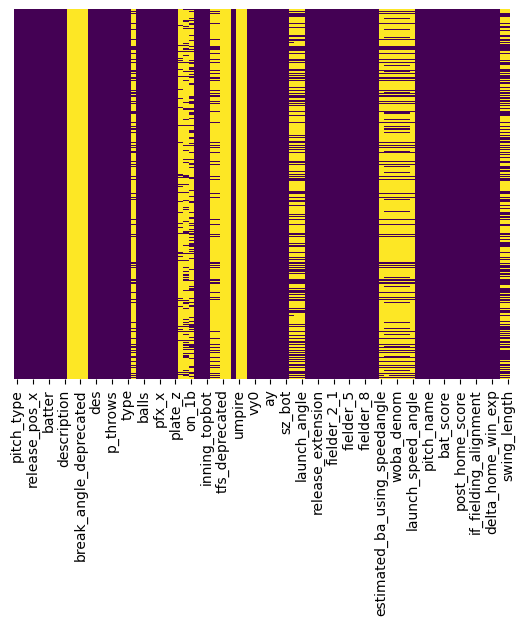

In [15]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
two_strike_pitches = train_data[train_data['strikes'] == 2]
two_strike_pitches.head(5)

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         FF  2024-04-02           95.0          -2.01           5.22   
4         FF  2024-04-02           95.4          -1.95           5.12   
5         SI  2024-04-02           91.8           1.75           4.89   
6         KC  2024-04-02           80.8          -3.13           5.61   
7         FF  2024-04-02           93.4          -3.17           5.63   

       player_name  batter  pitcher     events    description spin_dir  \
0  Rocchio, Brayan  677587   622491     single  hit_into_play     None   
4   Hedges, Austin  595978   622491  strikeout       foul_tip     None   
5   Casas, Triston  671213   622072       walk           ball     None   
6   Rizzo, Anthony  519203   668678  field_out  hit_into_play     None   
7   Rizzo, Anthony  519203   668678                      ball     None   

  spin_rate_deprecated break_angle_deprecated break_length_deprecated  zone  \
0                 None                   None                    None   3.0   
4                 None                   None                    None   5.0   
5                 None                   None                    None  11.0   
6                 None                   None                    None  13.0   
7                 None                   None                    None  13.0   

                                                 des game_type stand p_throws  \
0  Brayan Rocchio singles on a pop up to left fie...         R     L        R   
4           Austin Hedges strikes out on a foul tip.         R     R        R   
5                               Triston Casas walks.         R     L        L   
6  Anthony Rizzo grounds out softly, pitcher Zac ...         R     L        R   
7  Anthony Rizzo grounds out softly, pitcher Zac ...         R     L        R   

  home_team away_team type  hit_location      bb_type  balls  strikes  \
0       SEA       CLE    X           7.0        popup      0        2   
4       SEA       CLE    S           2.0                   1        2   
5       OAK       BOS    B           NaN                   3        2   
6        AZ       NYY    X           1.0  ground_ball      3        2   
7        AZ       NYY    B           NaN                   2        2   

   game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b     on_1b  \
0       2024  -0.85   1.20     0.69     3.18    NaN    NaN  666310.0   
4       2024  -1.08   0.90    -0.04     2.52    NaN    NaN  666310.0   
5       2024   0.93   1.04    -2.09     2.97    NaN    NaN       NaN   
6       2024   0.50  -1.10    -1.01     1.13    NaN    NaN  665742.0   
7       2024  -0.59   1.49    -1.00     1.17    NaN    NaN  665742.0   

   outs_when_up  inning inning_topbot    hc_x    hc_y tfs_deprecated  \
0             2       6           Top   87.46  125.97           None   
4             1       6           Top     NaN     NaN           None   
5             0       6           Top     NaN     NaN           None   
6             2       6           Top  113.82  188.11           None   
7             2       6           Top     NaN     NaN           None   

  tfs_zulu_deprecated  fielder_2 umpire sv_id        vx0         vy0  \
0                None     663728   None  None   8.809589 -138.184461   
4                None     663728   None  None   7.315465 -138.777335   
5                None     669127   None  None -11.658589 -133.059239   
6                None     672515   None  None   3.785866 -117.568637   
7                None     672515   None  None   6.960234 -135.680334   

        vz0         ax         ay         az  sz_top  sz_bot  hit_distance_sc  \
0 -2.337745 -12.836936  30.274047 -16.442679    3.10    1.40            180.0   
4 -3.229775 -15.530020  28.215738 -19.948870    3.18    1.45              NaN   
5 -1.161628  13.648448  31.146210 -19.905991    3.51    1.75              NaN   
6 -1.172778   3.876730  23.969148 -42.301623    3.66    1.73              1.0   
7 -9.133126  

In [17]:
two_strike_pitches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103692 entries, 0 to 345964
Data columns (total 94 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pitch_type                       103692 non-null  object 
 1   game_date                        103692 non-null  object 
 2   release_speed                    103603 non-null  float64
 3   release_pos_x                    103603 non-null  float64
 4   release_pos_z                    103603 non-null  float64
 5   player_name                      103692 non-null  object 
 6   batter                           103692 non-null  int32  
 7   pitcher                          103692 non-null  int32  
 8   events                           103692 non-null  object 
 9   description                      103692 non-null  object 
 10  spin_dir                         0 non-null       object 
 11  spin_rate_deprecated             0 non-null       object 
 12  break_a

In [21]:
train_data['strikes'].value_counts()

strikes
0    136845
1    105713
2    103692
Name: count, dtype: int64

In [22]:
train_data['events'].unique()

array(['single', '', 'walk', 'strikeout', 'field_out', 'home_run',
       'force_out', 'double', 'field_error', 'grounded_into_double_play',
       'hit_by_pitch', 'catcher_interf', 'triple', 'sac_fly',
       'double_play', 'sac_bunt', 'fielders_choice',
       'caught_stealing_home', 'fielders_choice_out',
       'caught_stealing_2b', 'strikeout_double_play', 'stolen_base_2b',
       'caught_stealing_3b', 'other_out', 'pickoff_caught_stealing_home',
       'pickoff_caught_stealing_3b', 'pickoff_3b', 'sac_fly_double_play',
       'pickoff_1b', 'triple_play'], dtype=object)

In [23]:
train_data['description'].unique()

array(['hit_into_play', 'foul', 'called_strike', 'ball', 'foul_tip',
       'swinging_strike', 'blocked_ball', 'swinging_strike_blocked',
       'hit_by_pitch', 'foul_bunt', 'pitchout', 'missed_bunt',
       'bunt_foul_tip'], dtype=object)

In [ ]:
'foul_bunt','bunt_foul_tip'

In [24]:
# Define relevant foul descriptions
foul_descriptions = ['foul', 'foul_tip']

# Select Two-Strike Pitches With Fouls
two_strike_fouls = train_data[(train_data['strikes'] == 2) & (train_data['description'].isin(foul_descriptions))]

# Select Two-Strike Pitches Without Fouls
two_strike_no_fouls = train_data[(train_data['strikes'] == 2) & (~train_data['description'].isin(foul_descriptions))]

# Add a dependent variable 'foul_occurred' to the dataset
# Create a copy of the original data to preserve its structure
data_with_foul_occurred = train_data[train_data['strikes'] == 2].copy()

# Assign 'foul_occurred' based on whether the description indicates a foul
data_with_foul_occurred['foul_occurred'] = data_with_foul_occurred['description'].apply(
    lambda x: 1 if x in foul_descriptions else 0
)


print("Two-Strike Pitches With Fouls:", two_strike_fouls.shape)
print("Two-Strike Pitches Without Fouls:", two_strike_no_fouls.shape)
print("Data with 'foul_occurred' column:")
print(data_with_foul_occurred[['description', 'foul_occurred']].head())


Two-Strike Pitches With Fouls: (25476, 94)
Two-Strike Pitches Without Fouls: (78216, 94)
Data with 'foul_occurred' column:
     description  foul_occurred
0  hit_into_play              0
4       foul_tip              1
5           ball              0
6  hit_into_play              0
7           ball              0


In [25]:
data_with_foul_occurred.head()

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
0         FF  2024-04-02           95.0          -2.01           5.22   
4         FF  2024-04-02           95.4          -1.95           5.12   
5         SI  2024-04-02           91.8           1.75           4.89   
6         KC  2024-04-02           80.8          -3.13           5.61   
7         FF  2024-04-02           93.4          -3.17           5.63   

       player_name  batter  pitcher     events    description spin_dir  \
0  Rocchio, Brayan  677587   622491     single  hit_into_play     None   
4   Hedges, Austin  595978   622491  strikeout       foul_tip     None   
5   Casas, Triston  671213   622072       walk           ball     None   
6   Rizzo, Anthony  519203   668678  field_out  hit_into_play     None   
7   Rizzo, Anthony  519203   668678                      ball     None   

  spin_rate_deprecated break_angle_deprecated break_length_deprecated  zone  \
0                 None                   None                    None   3.0   
4                 None                   None                    None   5.0   
5                 None                   None                    None  11.0   
6                 None                   None                    None  13.0   
7                 None                   None                    None  13.0   

                                                 des game_type stand p_throws  \
0  Brayan Rocchio singles on a pop up to left fie...         R     L        R   
4           Austin Hedges strikes out on a foul tip.         R     R        R   
5                               Triston Casas walks.         R     L        L   
6  Anthony Rizzo grounds out softly, pitcher Zac ...         R     L        R   
7  Anthony Rizzo grounds out softly, pitcher Zac ...         R     L        R   

  home_team away_team type  hit_location      bb_type  balls  strikes  \
0       SEA       CLE    X           7.0        popup      0        2   
4       SEA       CLE    S           2.0                   1        2   
5       OAK       BOS    B           NaN                   3        2   
6        AZ       NYY    X           1.0  ground_ball      3        2   
7        AZ       NYY    B           NaN                   2        2   

   game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b     on_1b  \
0       2024  -0.85   1.20     0.69     3.18    NaN    NaN  666310.0   
4       2024  -1.08   0.90    -0.04     2.52    NaN    NaN  666310.0   
5       2024   0.93   1.04    -2.09     2.97    NaN    NaN       NaN   
6       2024   0.50  -1.10    -1.01     1.13    NaN    NaN  665742.0   
7       2024  -0.59   1.49    -1.00     1.17    NaN    NaN  665742.0   

   outs_when_up  inning inning_topbot    hc_x    hc_y tfs_deprecated  \
0             2       6           Top   87.46  125.97           None   
4             1       6           Top     NaN     NaN           None   
5             0       6           Top     NaN     NaN           None   
6             2       6           Top  113.82  188.11           None   
7             2       6           Top     NaN     NaN           None   

  tfs_zulu_deprecated  fielder_2 umpire sv_id        vx0         vy0  \
0                None     663728   None  None   8.809589 -138.184461   
4                None     663728   None  None   7.315465 -138.777335   
5                None     669127   None  None -11.658589 -133.059239   
6                None     672515   None  None   3.785866 -117.568637   
7                None     672515   None  None   6.960234 -135.680334   

        vz0         ax         ay         az  sz_top  sz_bot  hit_distance_sc  \
0 -2.337745 -12.836936  30.274047 -16.442679    3.10    1.40            180.0   
4 -3.229775 -15.530020  28.215738 -19.948870    3.18    1.45              NaN   
5 -1.161628  13.648448  31.146210 -19.905991    3.51    1.75              NaN   
6 -1.172778   3.876730  23.969148 -42.301623    3.66    1.73              1.0   
7 -9.133126  

In [26]:
data_with_foul_occurred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103692 entries, 0 to 345964
Data columns (total 95 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pitch_type                       103692 non-null  object 
 1   game_date                        103692 non-null  object 
 2   release_speed                    103603 non-null  float64
 3   release_pos_x                    103603 non-null  float64
 4   release_pos_z                    103603 non-null  float64
 5   player_name                      103692 non-null  object 
 6   batter                           103692 non-null  int32  
 7   pitcher                          103692 non-null  int32  
 8   events                           103692 non-null  object 
 9   description                      103692 non-null  object 
 10  spin_dir                         0 non-null       object 
 11  spin_rate_deprecated             0 non-null       object 
 12  break_a

In [27]:
# Drop columns with 100% NaN values
data_with_foul_occurred = data_with_foul_occurred.dropna(axis=1, how='all')

# Check the dataset
data_with_foul_occurred.info()


<class 'pandas.core.frame.DataFrame'>
Index: 103692 entries, 0 to 345964
Data columns (total 87 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   pitch_type                       103692 non-null  object 
 1   game_date                        103692 non-null  object 
 2   release_speed                    103603 non-null  float64
 3   release_pos_x                    103603 non-null  float64
 4   release_pos_z                    103603 non-null  float64
 5   player_name                      103692 non-null  object 
 6   batter                           103692 non-null  int32  
 7   pitcher                          103692 non-null  int32  
 8   events                           103692 non-null  object 
 9   description                      103692 non-null  object 
 10  zone                             103603 non-null  float64
 11  des                              103692 non-null  object 
 12  game_ty

In [28]:
# Retain the rows where 'swing_length' is not NaN
filtered_data = data_with_foul_occurred[data_with_foul_occurred['swing_length'].notna()]

# Check the result

filtered_data.head()


pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
3628         FS  2024-04-03           90.1          -2.36           5.30   
3631         FF  2024-04-03           96.7          -2.49           5.03   
3633         CU  2024-04-03           83.6          -0.87           6.10   
3637         FC  2024-04-03           95.9          -1.12           5.91   
3639         FC  2024-04-03           95.4          -0.98           6.02   

          player_name  batter  pitcher     events      description  zone  \
3628  Ramírez, Harold  623912   543135  strikeout  swinging_strike  13.0   
3631  Ramírez, Harold  623912   543135                        foul   6.0   
3633   Fermin, Freddy  666023   669203  strikeout  swinging_strike  14.0   
3637   Fermin, Freddy  666023   669203                        foul   9.0   
3639   Fermin, Freddy  666023   669203                        foul   2.0   

                                       des game_type stand p_throws home_team  \
3628  Harold Ramírez strikes out swinging.         R     R        R        TB   
3631  Harold Ramírez strikes out swinging.         R     R        R        TB   
3633   Freddy Fermin strikes out swinging.         R     R        R       BAL   
3637   Freddy Fermin strikes out swinging.         R     R        R       BAL   
3639   Freddy Fermin strikes out swinging.         R     R        R       BAL   

     away_team type  hit_location bb_type  balls  strikes  game_year  pfx_x  \
3628       TEX    S           2.0              2        2       2024  -1.15   
3631       TEX    S           NaN              0        2       2024  -1.26   
3633        KC    S           2.0              2        2       2024   0.89   
3637        KC    S           NaN              2        2       2024  -0.15   
3639        KC    S           NaN              2        2       2024   0.02   

      pfx_z  plate_x  plate_z  on_3b  on_2b  on_1b  outs_when_up  inning  \
3628  -0.29    -1.04     1.09    NaN    NaN    NaN             2       7   
3631   1.01     0.32     2.60    NaN    NaN    NaN             2       7   
3633  -0.81     1.56     1.05    NaN    NaN    NaN             1       6   
3637   1.03     0.44     1.76    NaN    NaN    NaN             1       6   
3639   1.21     0.13     3.30    NaN    NaN    NaN             1       6   

     inning_topbot  hc_x  hc_y  fielder_2        vx0         vy0       vz0  \
3628           Bot   NaN   NaN     641680   5.703031 -131.124412 -3.867662   
3631           Bot   NaN   NaN     641680  10.478987 -140.422455 -3.225538   
3633           Top   NaN   NaN     543510   3.874713 -121.725997 -3.602516   
3637           Top   NaN   NaN     543510   4.477629 -139.472332 -7.772661   
3639           Top   NaN   NaN     543510   2.910823 -138.887122 -4.301655   

             ax         ay         az  sz_top  sz_bot  hit_distance_sc  \
3628 -14.470960  28.577307 -34.821720    3.25    1.49              NaN   
3631 -19.036370  33.009135 -18.293370    3.25    1.49            267.0   
3633   8.037247  25.560634 -39.623224    3.20    1.53              NaN   
3637  -2.858866  28.996951 -17.258328    3.20    1.53              1.0   
3639  -0.344140  29.600857 -15.776084    3.20    1.53            186.0   

      launch_speed  launch_angle  effective_speed  release_spin_rate  \
3628           NaN           NaN             89.6             1641.0   
3631          91.2          18.0             97.7             2209.0   
3633           NaN           NaN             84.1             3008.0   
3637          84.9         -52.0             96.8             2852.0   
3639          85.7          62.0             96.1             2740.0   

      release_extension  game_pk  pitcher_1  fielder_2_1  fielder_3  \
3628                6.1   745114     543135       641680     665120   
3631                7.0   745114     543135       641680     665120   
3633                6.8   747059     669203       543510     663624   
3637                6.7   747059     6692

In [29]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58566 entries, 3628 to 345958
Data columns (total 87 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   pitch_type                       58566 non-null  object 
 1   game_date                        58566 non-null  object 
 2   release_speed                    58564 non-null  float64
 3   release_pos_x                    58565 non-null  float64
 4   release_pos_z                    58565 non-null  float64
 5   player_name                      58566 non-null  object 
 6   batter                           58566 non-null  int32  
 7   pitcher                          58566 non-null  int32  
 8   events                           58566 non-null  object 
 9   description                      58566 non-null  object 
 10  zone                             58565 non-null  float64
 11  des                              58566 non-null  object 
 12  game_type          

In [30]:
filtered_data['foul_occurred'].value_counts()

foul_occurred
0    34159
1    24407
Name: count, dtype: int64

<Axes: >

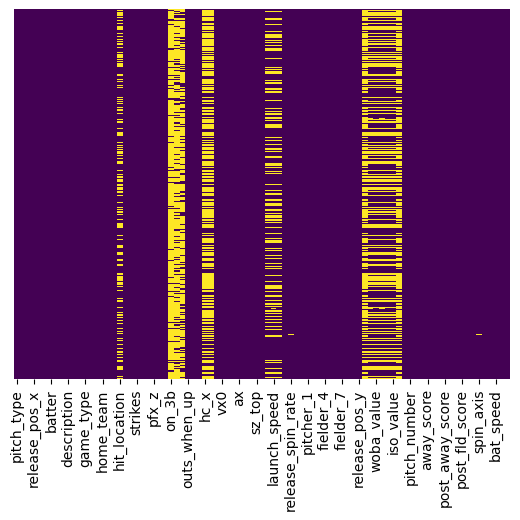

In [31]:
sns.heatmap(filtered_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
# # List of the relevant columns I considered in my analyis
# relevant_columns = 
#     'bat_speed',        # Batter-specific
#     'swing_length',     # Batter-specific
#     'stand',            # Batter-specific
#     'p_throws',
#     'release_speed',    # Pitch-specific
#     'pfx_x',            # Pitch-specific
#     'pfx_z',            # Pitch-specific
#     'plate_x',          # Pitch-specific
#     'plate_z',          # Pitch-specific
#     'pitch_type',       # Pitch-specific
#     'strikes',          # Situational context
#     'balls',            # Situational context
#     'inning',           # Situational context
#     'outs_when_up',      # Situational context
#     'foul_occurred'

# DATA PREPROCESSING

In [38]:
filtered_data['stand'].unique()

array(['R', 'L'], dtype=object)

In [39]:
filtered_data['p_throws'].unique()

array(['R', 'L'], dtype=object)

# Transforming categorically variable

In [40]:
filtered_data['stand'] = np.where(filtered_data['stand'] == 'R', 1, -1)
filtered_data['p_throws'] = np.where(filtered_data['p_throws'] == 'R', 1, -1)

In [41]:
filtered_data.head()

pitch_type   game_date  release_speed  release_pos_x  release_pos_z  \
3628         FS  2024-04-03           90.1          -2.36           5.30   
3631         FF  2024-04-03           96.7          -2.49           5.03   
3633         CU  2024-04-03           83.6          -0.87           6.10   
3637         FC  2024-04-03           95.9          -1.12           5.91   
3639         FC  2024-04-03           95.4          -0.98           6.02   

          player_name  batter  pitcher     events      description  zone  \
3628  Ramírez, Harold  623912   543135  strikeout  swinging_strike  13.0   
3631  Ramírez, Harold  623912   543135                        foul   6.0   
3633   Fermin, Freddy  666023   669203  strikeout  swinging_strike  14.0   
3637   Fermin, Freddy  666023   669203                        foul   9.0   
3639   Fermin, Freddy  666023   669203                        foul   2.0   

                                       des game_type  stand  p_throws  \
3628  Harold Ramírez strikes out swinging.         R      1         1   
3631  Harold Ramírez strikes out swinging.         R      1         1   
3633   Freddy Fermin strikes out swinging.         R      1         1   
3637   Freddy Fermin strikes out swinging.         R      1         1   
3639   Freddy Fermin strikes out swinging.         R      1         1   

     home_team away_team type  hit_location bb_type  balls  strikes  \
3628        TB       TEX    S           2.0              2        2   
3631        TB       TEX    S           NaN              0        2   
3633       BAL        KC    S           2.0              2        2   
3637       BAL        KC    S           NaN              2        2   
3639       BAL        KC    S           NaN              2        2   

      game_year  pfx_x  pfx_z  plate_x  plate_z  on_3b  on_2b  on_1b  \
3628       2024  -1.15  -0.29    -1.04     1.09    NaN    NaN    NaN   
3631       2024  -1.26   1.01     0.32     2.60    NaN    NaN    NaN   
3633       2024   0.89  -0.81     1.56     1.05    NaN    NaN    NaN   
3637       2024  -0.15   1.03     0.44     1.76    NaN    NaN    NaN   
3639       2024   0.02   1.21     0.13     3.30    NaN    NaN    NaN   

      outs_when_up  inning inning_topbot  hc_x  hc_y  fielder_2        vx0  \
3628             2       7           Bot   NaN   NaN     641680   5.703031   
3631             2       7           Bot   NaN   NaN     641680  10.478987   
3633             1       6           Top   NaN   NaN     543510   3.874713   
3637             1       6           Top   NaN   NaN     543510   4.477629   
3639             1       6           Top   NaN   NaN     543510   2.910823   

             vy0       vz0         ax         ay         az  sz_top  sz_bot  \
3628 -131.124412 -3.867662 -14.470960  28.577307 -34.821720    3.25    1.49   
3631 -140.422455 -3.225538 -19.036370  33.009135 -18.293370    3.25    1.49   
3633 -121.725997 -3.602516   8.037247  25.560634 -39.623224    3.20    1.53   
3637 -139.472332 -7.772661  -2.858866  28.996951 -17.258328    3.20    1.53   
3639 -138.887122 -4.301655  -0.344140  29.600857 -15.776084    3.20    1.53   

      hit_distance_sc  launch_speed  launch_angle  effective_speed  \
3628              NaN           NaN           NaN             89.6   
3631            267.0          91.2          18.0             97.7   
3633              NaN           NaN           NaN             84.1   
3637              1.0          84.9         -52.0             96.8   
3639            186.0          85.7          62.0             96.1   

      release_spin_rate  release_extension  game_pk  pitcher_1  fielder_2_1  \
3628             1641.0                6.1   745114     543135       641680   
3631             2209.0                7.0   745114     543135       641680   
3633             3008.0                6.8   747059     669203       543510   
3637             2852.0                6.7   747059     669203       543510   
3639             2740.0         

# Create an additional feature through feature interaction betwenen bat_speed and Swing_lenght

In [ ]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az


filtered_data['interaction'] = filtered_data['bat_speed'] * filtered_data['swing_length']

data = filtered_data[[
    'bat_speed',        # Batter-specific
    'swing_length',     # Batter-specific
    'stand',            # Batter-specific
    'p_throws',
    'release_speed',    # Pitch-specific
    'pfx_x',            # Pitch-specific
    'pfx_z',            # Pitch-specific
    'plate_x',          # Pitch-specific
    'plate_z',          # Pitch-specific
    'pitch_type',       # Pitch-specific
    'strikes',          # Situational context
    'balls',            # Situational context
    'inning',           # Situational context
    'outs_when_up',      # Situational context
    'interaction',
    'foul_occurred'
]]


# List of continous variables to standardize
continuous_cols = ['bat_speed', 'swing_length', 'release_speed', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z','interaction']

# Standardize the selected variables
data[continuous_cols] = data[continuous_cols].apply(lambda x: (x - x.mean()) / x.std(), axis=0)
# Use a subset of the data
data_subset = data.sample(n=5000, random_state=42)  

# DRAWING THE DAG AND MODEL BUILDING

# Question 1.  Does bat speed directly influence the likelihood of fouling off a pitch?"

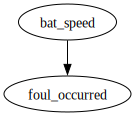

In [43]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

# Define the DAG
dag_bat_speed = CausalGraphicalModel(
    nodes=["bat_speed", "foul_occurred"],
    edges=[
        ("bat_speed", "foul_occurred")
    ]
)

# Plot the DAG
dag_bat_speed.draw()




Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta_speed]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 71 seconds.


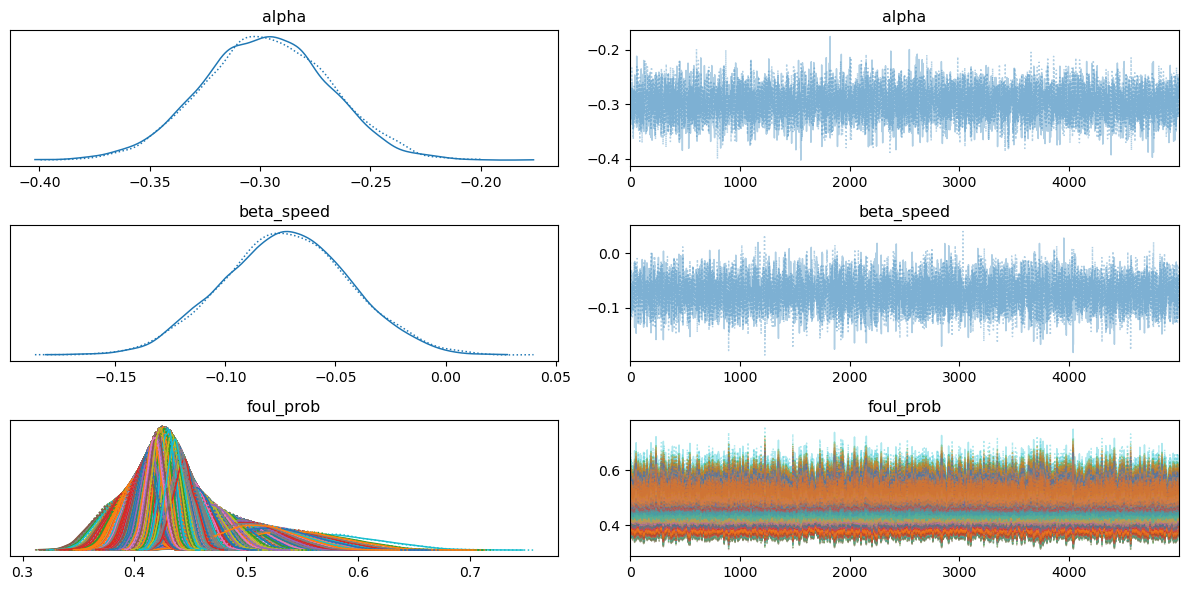

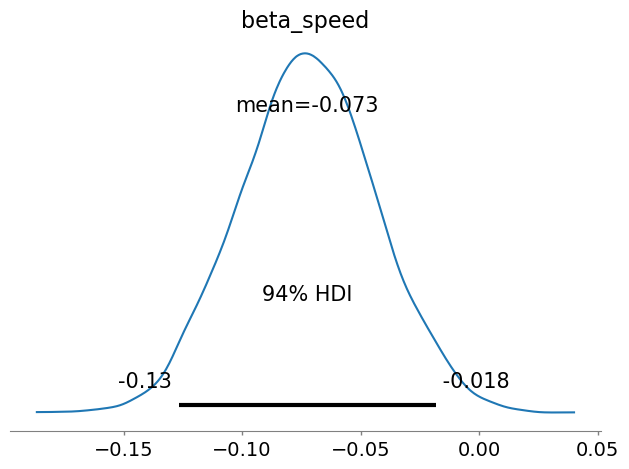

In [48]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az


# Define the Bayesian model
with pm.Model() as model_bat_speed:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=1)  # Intercept
    beta_speed = pm.Normal("beta_speed", mu=0, sigma=1)  # Effect of bat_speed

    # Logistic regression formula
    logits = alpha + beta_speed * data_subset['bat_speed']
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))

    # Likelihood (observed fouling)
    Y_obs = pm.Bernoulli("Y_obs", p=foul_prob, observed=data_subset['foul_occurred'])

    # Sampling
    trace_bat_speed = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# Diagnostic plots
# Plotting the trace
az.plot_trace(trace_bat_speed)
plt.tight_layout()
plt.show()


# # Autocorrelation
# az.plot_autocorr(trace_bat_speed)
# plt.tight_layout()
# plt.show()

# Visualization of Distributions
az.plot_posterior(trace_bat_speed, var_names=["beta_speed"])
plt.tight_layout()
plt.show()

# Summary statistics including R-hat and ESS
summary_stats = az.summary(trace_bat_speed, hdi_prob=0.95)  # 95% HDI
# summary_stats


           mean     sd  hdi_2.5%  hdi_97.5%
contrast -0.035  0.014    -0.062     -0.008


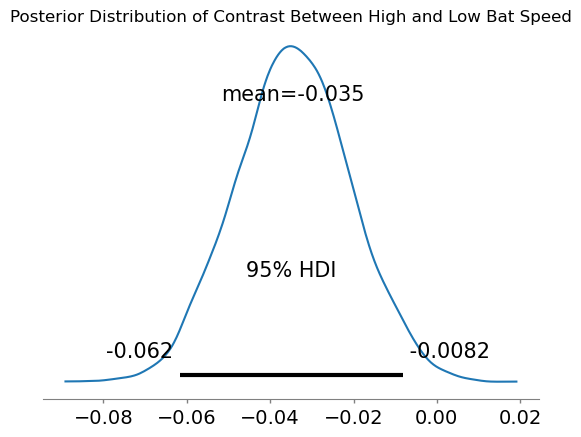

In [49]:
# # Calculate Posterior Predictive Probabilities for both conditions
# Extract posterior samples for the parameters
alpha_samples = trace_bat_speed.posterior['alpha'].values.ravel()
beta_speed_samples = trace_bat_speed.posterior['beta_speed'].values.ravel()

# Define bat_speed conditions for comparison
low_bat_speed = data_subset['bat_speed'].mean() - data_subset['bat_speed'].std()  # 1 SD below mean
high_bat_speed = data_subset['bat_speed'].mean() + data_subset['bat_speed'].std()  # 1 SD above mean

# Calculate predictive probabilities for both conditions
prob_low_bat_speed = pm.math.sigmoid(alpha_samples + beta_speed_samples * low_bat_speed).eval()
prob_high_bat_speed = pm.math.sigmoid(alpha_samples + beta_speed_samples * high_bat_speed).eval()

# Compute the difference in probabilities
contrast = prob_high_bat_speed - prob_low_bat_speed

# Convert contrast to InferenceData for ArviZ
contrast_idata = az.convert_to_inference_data({'contrast': contrast})

# Summarize the Contrast
contrast_summary = az.summary({'contrast': contrast}, kind='stats', hdi_prob=0.95)
print(contrast_summary)

# Plotting the contrast
az.plot_posterior({'contrast': contrast}, hdi_prob=0.95)
plt.title("Posterior Distribution of Contrast Between High and Low Bat Speed")
plt.show()


## Results and Posterior Distribution of Contrast Between High and Low Bat Speed

           mean     sd  hdi_2.5%  hdi_97.5%
contrast -0.035  0.014    -0.062     -0.008


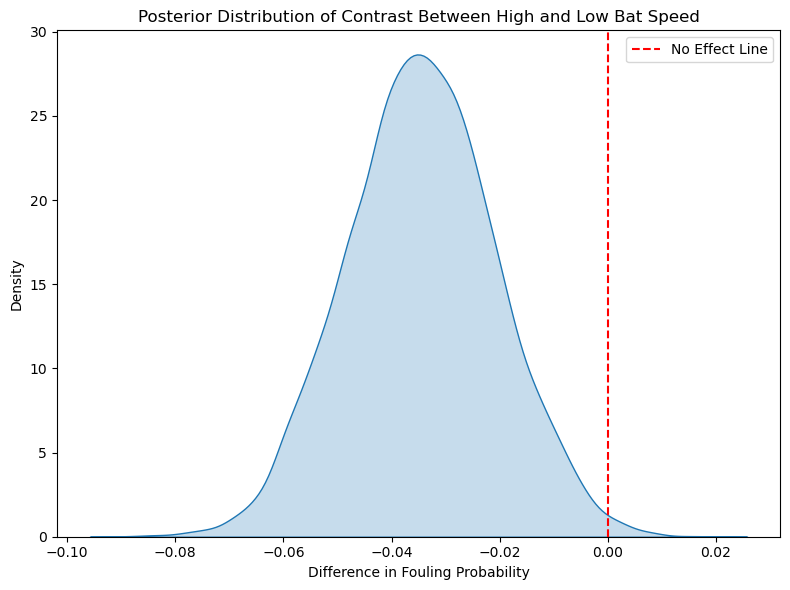

In [54]:
# Define bat_speed conditions for comparison
low_bat_speed = data_sub['bat_speed'].mean() - data_subset['bat_speed'].std()  # 1 SD below mean
high_bat_speed = data_subset['bat_speed'].mean() + data_subset['bat_speed'].std()  # 1 SD above mean

# Calculate fouling probabilities for low and high bat speed
foul_prob_low_bat_speed = pm.math.sigmoid(alpha_samples + beta_bat_speed_samples * low_bat_speed).eval()
foul_prob_high_bat_speed = pm.math.sigmoid(alpha_samples + beta_bat_speed_samples * high_bat_speed).eval()

# Calculate contrast
contrast = foul_prob_high_bat_speed - foul_prob_low_bat_speed

# Converting contrast to a NumPy array
contrast_np = np.array(contrast)

# Summary of contrast using ArviZ
contrast_summary = az.summary({'contrast': contrast_np}, kind='stats', hdi_prob=0.95)
print(contrast_summary)

# Plotting the contrast
plt.figure(figsize=(8, 6))
sns.kdeplot(contrast_np, fill=True)
plt.title("Posterior Distribution of Contrast Between High and Low Bat Speed")
plt.xlabel("Difference in Fouling Probability")
plt.ylabel("Density")
plt.axvline(x=0, color='red', linestyle='--', label='No Effect Line')
plt.legend()
plt.tight_layout()
plt.savefig('contrast_fouling_high_low_bat_speed.png')
plt.show()

## Probability Distributions by bat_speed

Low Bat Speed Foul Probability: Mean = 0.44, 95% CI = [0.42, 0.46]
High Bat Speed Foul Probability: Mean = 0.41, 95% CI = [0.39, 0.43]


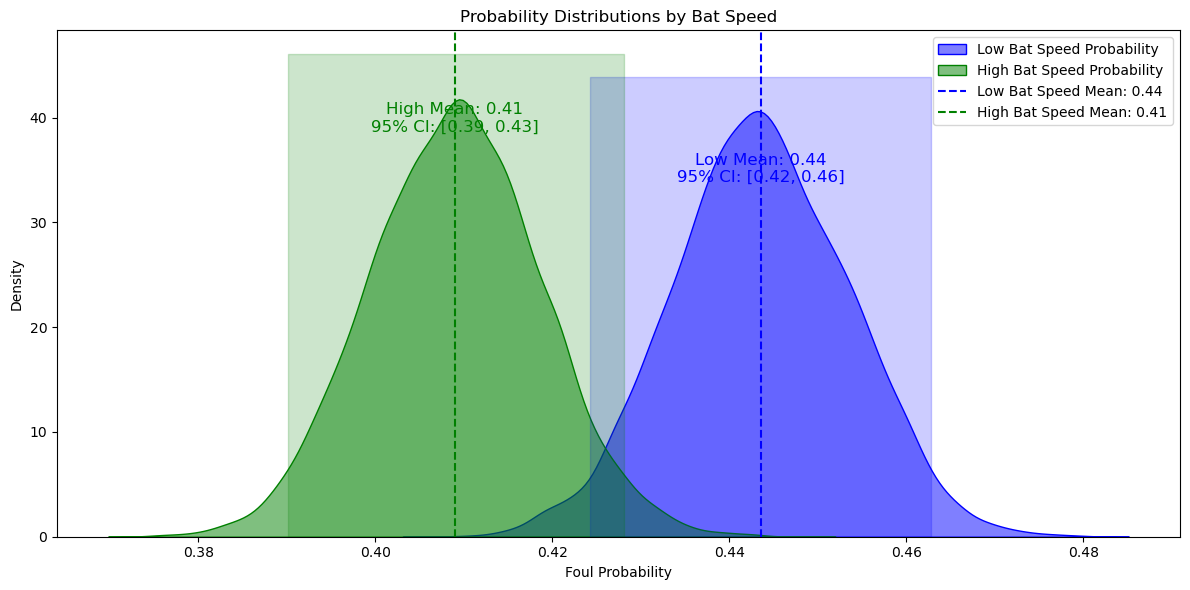

In [55]:

# Calculate and print credible intervals for foul probabilities
low_mean = np.mean(foul_prob_low_bat_speed)
high_mean = np.mean(foul_prob_high_bat_speed)
low_ci = np.percentile(foul_prob_low_bat_speed, [2.5, 97.5])
high_ci = np.percentile(foul_prob_high_bat_speed, [2.5, 97.5])

print(f"Low Bat Speed Foul Probability: Mean = {low_mean:.2f}, 95% CI = [{low_ci[0]:.2f}, {low_ci[1]:.2f}]")
print(f"High Bat Speed Foul Probability: Mean = {high_mean:.2f}, 95% CI = [{high_ci[0]:.2f}, {high_ci[1]:.2f}]")

# Visualize Probability Distributions for each condition
plt.figure(figsize=(8, 6))
sns.kdeplot(foul_prob_low_bat_speed, color='blue', label='Low Bat Speed Probability', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_bat_speed, color='green', label='High Bat Speed Probability', fill=True, alpha=0.5)
plt.title("Probability Distributions by Bat Speed")
plt.xlabel("Foul Probability")
plt.ylabel("Density")

# Annotate the means and credible intervals
plt.axvline(low_mean, color='blue', linestyle='--', label=f'Low Bat Speed Mean: {low_mean:.2f}')
plt.axvline(high_mean, color='green', linestyle='--', label=f'High Bat Speed Mean: {high_mean:.2f}')
plt.fill_betweenx([0, plt.ylim()[1]], low_ci[0], low_ci[1], color='blue', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], high_ci[0], high_ci[1], color='green', alpha=0.2)

# Adjust vertical positions to avoid overlap
plt.text(low_mean, plt.ylim()[1]*0.7, f'Low Mean: {low_mean:.2f}\n95% CI: [{low_ci[0]:.2f}, {low_ci[1]:.2f}]', color='blue', fontsize=12, ha='center')
plt.text(high_mean, plt.ylim()[1]*0.8, f'High Mean: {high_mean:.2f}\n95% CI: [{high_ci[0]:.2f}, {high_ci[1]:.2f}]', color='green', fontsize=12, ha='center')

plt.legend()
plt.tight_layout()
plt.savefig('probability_distributions_by_bat_speed.png')  # Save the plot as a PNG file
plt.show()


## Fouling Likelihood vs. Bat Speed Graph

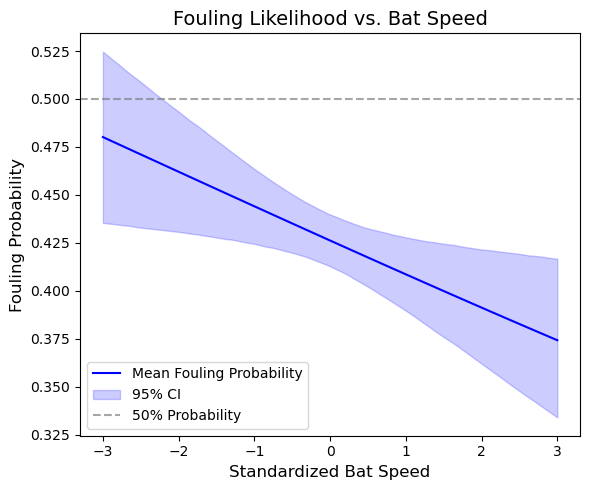

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

# Assuming alpha_samples and beta_bat_speed_samples are available and in NumPy format
alpha_samples = np.array(alpha_samples)
beta_bat_speed_samples = np.array(beta_bat_speed_samples)

# Generate a range of bat_speed values for plotting
bat_speed_range = np.linspace(-3, 3, 100)  # Standardized range (-3 to 3 SD)

# Calculate fouling probabilities for each bat_speed value
foul_probs = np.zeros((len(alpha_samples), len(bat_speed_range)))

for i, bat_speed in enumerate(bat_speed_range):
    foul_probs[:, i] = expit(alpha_samples + beta_bat_speed_samples * bat_speed)

# Calculate the mean and 95% CI for fouling probabilities
foul_probs_mean = foul_probs.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs, 97.5, axis=0)

# Plot the probability curve
plt.figure(figsize=(6, 5))
plt.plot(bat_speed_range, foul_probs_mean, label="Mean Fouling Probability", color='blue')
plt.fill_between(bat_speed_range, foul_probs_lower, foul_probs_upper, color='blue', alpha=0.2, label="95% CI")
plt.title("Fouling Likelihood vs. Bat Speed", fontsize=14)
plt.xlabel("Standardized Bat Speed", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label="50% Probability")
plt.legend()
plt.tight_layout()
plt.savefig('Fouling Likelihood vs. Bat Speed Graph.png')
plt.show()


# Question 2. Does swing lenght directly influence the likelihood of fouling off a pitch?

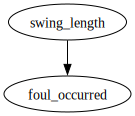

In [41]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

# Define the DAG
dag_swing_length = CausalGraphicalModel(
    nodes=["swing_length", "foul_occurred"],
    edges=[
        ("swing_length", "foul_occurred")
    ]
)

# Plot the DAG
dag_swing_length.draw()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta_swing]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 69 seconds.


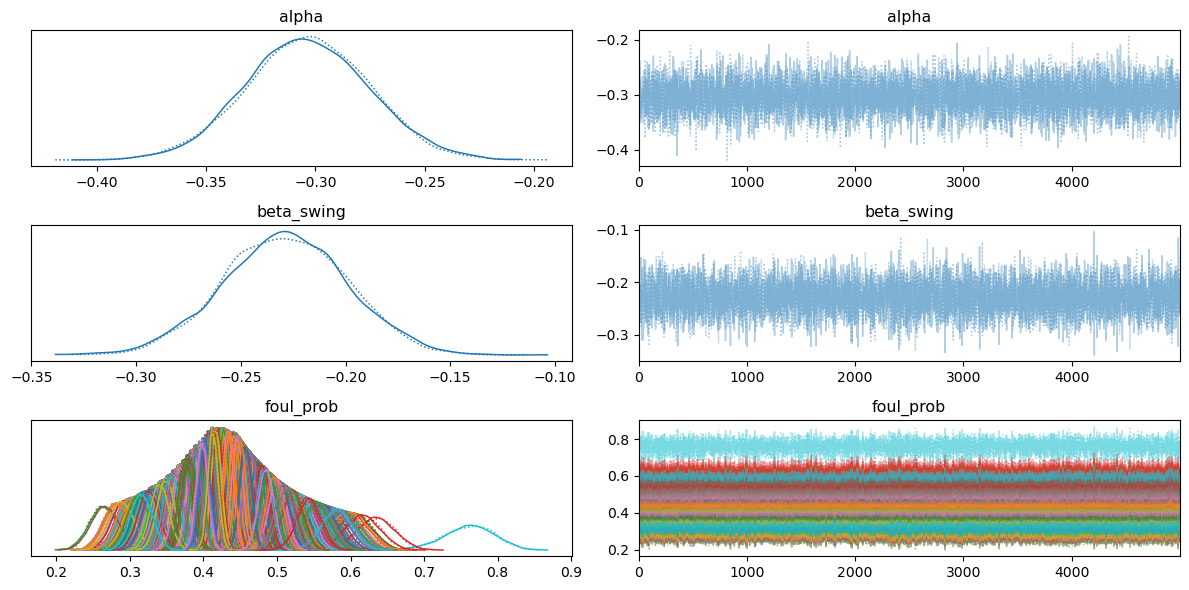

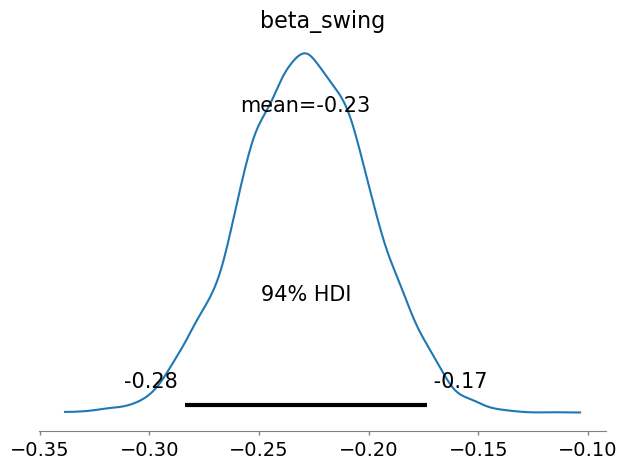

In [65]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from scipy.special import expit

# Define the Bayesian model for swing length
with pm.Model() as model_swing_length:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=1)  # Intercept
    beta_swing = pm.Normal("beta_swing", mu=0, sigma=1)  # Effect of swing_length

    # Logistic regression formula
    logits = alpha + beta_swing * data_subset['swing_length']
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))

    # Likelihood (observed fouling)
    Y_obs = pm.Bernoulli("Y_obs", p=foul_prob, observed=data_subset['foul_occurred'])

    # Sampling
    trace_swing_length = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# Diagnostic plots
# Plotting the trace
az.plot_trace(trace_swing_length)
plt.tight_layout()
plt.show()

# Posterior distributions
az.plot_posterior(trace_swing_length, var_names=["beta_swing"])
plt.tight_layout()
plt.show()

# Summary statistics including R-hat and ESS
summary_stats = az.summary(trace_swing_length, hdi_prob=0.95)  # 95% HDI
# print(summary_stats)



          mean     sd  hdi_2.5%  hdi_97.5%
contrast -0.11  0.014    -0.137     -0.082


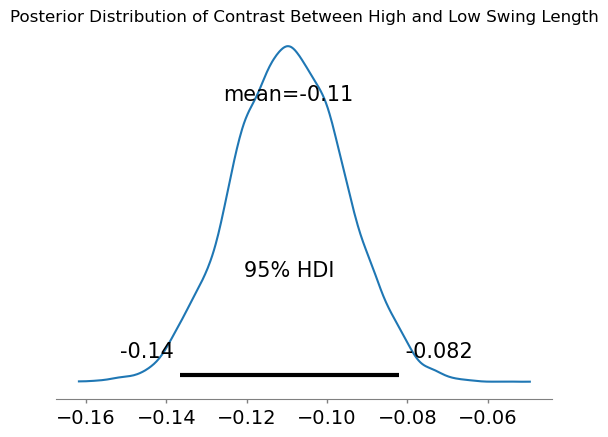

In [66]:
# Extract posterior samples for further analysis
alpha_samples = trace_swing_length.posterior['alpha'].values.ravel()
beta_swing_samples = trace_swing_length.posterior['beta_swing'].values.ravel()

# Define swing_length conditions for comparison
low_swing_length = data_subset['swing_length'].mean() - data_subset['swing_length'].std()  # 1 SD below mean
high_swing_length = data_subset['swing_length'].mean() + data_subset['swing_length'].std()  # 1 SD above mean

# Calculate predictive probabilities for both conditions
foul_prob_low_swing = pm.math.sigmoid(alpha_samples + beta_swing_samples * low_swing_length).eval()
foul_prob_high_swing = pm.math.sigmoid(alpha_samples + beta_swing_samples * high_swing_length).eval()

# Compute the difference in probabilities
contrast = foul_prob_high_swing - foul_prob_low_swing

# Convert contrast to InferenceData for ArviZ
contrast_idata = az.convert_to_inference_data({'contrast': contrast})

# Summarize the Contrast
contrast_summary = az.summary({'contrast': contrast}, kind='stats', hdi_prob=0.95)
print(contrast_summary)

# Plotting the contrast
az.plot_posterior({'contrast': contrast}, hdi_prob=0.95)
plt.title("Posterior Distribution of Contrast Between High and Low Swing Length")
plt.show()

Low Swing Length Foul Probability: Mean = 0.48, 95% CI = [0.46, 0.50]
High Swing Length Foul Probability: Mean = 0.37, 95% CI = [0.35, 0.39]


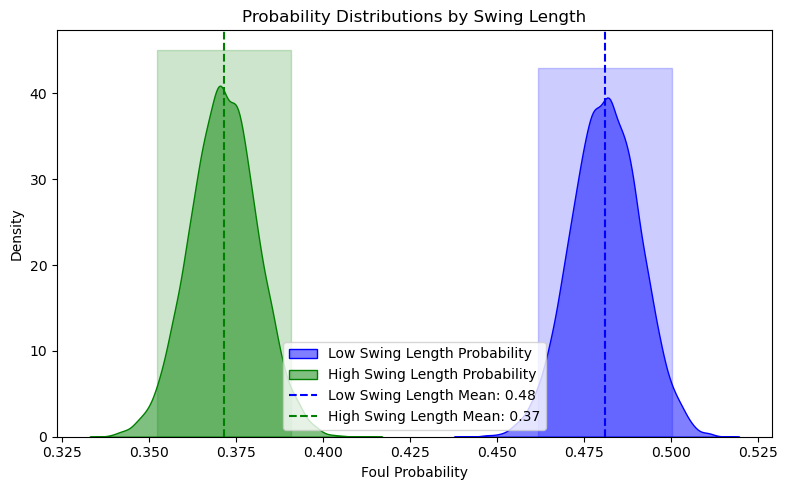

In [70]:
# Calculate and print credible intervals for foul probabilities
low_mean = np.mean(foul_prob_low_swing)
high_mean = np.mean(foul_prob_high_swing)
low_ci = np.percentile(foul_prob_low_swing, [2.5, 97.5])
high_ci = np.percentile(foul_prob_high_swing, [2.5, 97.5])

print(f"Low Swing Length Foul Probability: Mean = {low_mean:.2f}, 95% CI = [{low_ci[0]:.2f}, {low_ci[1]:.2f}]")
print(f"High Swing Length Foul Probability: Mean = {high_mean:.2f}, 95% CI = [{high_ci[0]:.2f}, {high_ci[1]:.2f}]")

# Visualize Probability Distributions for each condition
plt.figure(figsize=(8, 5))
sns.kdeplot(foul_prob_low_swing, color='blue', label='Low Swing Length Probability', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_swing, color='green', label='High Swing Length Probability', fill=True, alpha=0.5)
plt.title("Probability Distributions by Swing Length")
plt.xlabel("Foul Probability")
plt.ylabel("Density")

# Annotate the means and credible intervals
plt.axvline(low_mean, color='blue', linestyle='--', label=f'Low Swing Length Mean: {low_mean:.2f}')
plt.axvline(high_mean, color='green', linestyle='--', label=f'High Swing Length Mean: {high_mean:.2f}')
plt.fill_betweenx([0, plt.ylim()[1]], low_ci[0], low_ci[1], color='blue', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], high_ci[0], high_ci[1], color='green', alpha=0.2)

plt.legend()
plt.tight_layout()
plt.savefig('probability_distributions_by_swing_length.png')  # Save the plot as a PNG file
plt.show()



          mean     sd  hdi_2.5%  hdi_97.5%
contrast -0.11  0.014    -0.137     -0.082


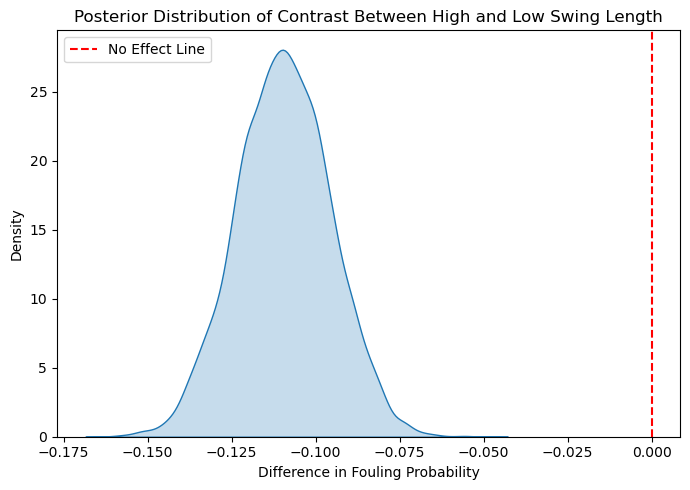

In [74]:
# Define swing_length conditions for comparison
low_swing_length = data_subset['swing_length'].mean() - data_subset['swing_length'].std()  # 1 SD below mean
high_swing_length = data_subset['swing_length'].mean() + data_subset['swing_length'].std()  # 1 SD above mean

# Calculate fouling probabilities for low and high swing length
foul_prob_low_swing_length = pm.math.sigmoid(alpha_samples + beta_swing_samples * low_swing_length).eval()
foul_prob_high_swing_length = pm.math.sigmoid(alpha_samples + beta_swing_samples * high_swing_length).eval()

# Calculate contrast
contrast = foul_prob_high_swing_length - foul_prob_low_swing_length

# Covert the contrast to a NumPy array
contrast_np = np.array(contrast)

# Summary of contrast using ArviZ
contrast_summary = az.summary({'contrast': contrast_np}, kind='stats', hdi_prob=0.95)
print(contrast_summary)

# Plotting the contrast
plt.figure(figsize=(7, 5))
sns.kdeplot(contrast_np, fill=True)
plt.title("Posterior Distribution of Contrast Between High and Low Swing Length")
plt.xlabel("Difference in Fouling Probability")
plt.ylabel("Density")
plt.axvline(x=0, color='red', linestyle='--', label='No Effect Line')
plt.legend()
plt.tight_layout()
plt.savefig('contrast_fouling_high_low_swing_length.png')  # Save the plot as a PNG file
plt.show()


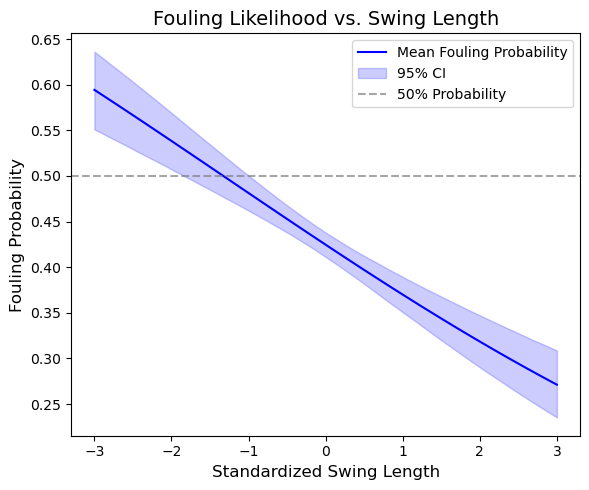

In [71]:
# Generate a range of swing_length values for plotting
swing_length_range = np.linspace(-3, 3, 100)  # Standardized range (-3 to 3 SD)

# Calculate fouling probabilities for each swing_length value
foul_probs = np.zeros((len(alpha_samples), len(swing_length_range)))

for i, swing_length in enumerate(swing_length_range):
    foul_probs[:, i] = expit(alpha_samples + beta_swing_samples * swing_length)

# Calculate the mean and 95% CI for fouling probabilities
foul_probs_mean = foul_probs.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs, 97.5, axis=0)

# Plot the probability curve
plt.figure(figsize=(6, 5))
plt.plot(swing_length_range, foul_probs_mean, label="Mean Fouling Probability", color='blue')
plt.fill_between(swing_length_range, foul_probs_lower, foul_probs_upper, color='blue', alpha=0.2, label="95% CI")
plt.title("Fouling Likelihood vs. Swing Length", fontsize=14)
plt.xlabel("Standardized Swing Length", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label="50% Probability")
plt.legend()
plt.tight_layout()
plt.savefig('Fouling Likelihood vs. Swing Length Graph.png')
plt.show()


## Does release speed directly influence the likelihood of fouling off a pitch?
I didn't put this question in my analysis but I decided to see effect of release speed separatly before using release speed as covariates variable

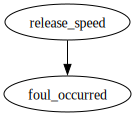

In [42]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

# Define the DAG
dag_release_speed = CausalGraphicalModel(
    nodes=["release_speed", "foul_occurred"],
    edges=[
        ("release_speed", "foul_occurred")
    ]
)

# Plot the DAG
dag_release_speed.draw()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta_release_speed]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 146 seconds.


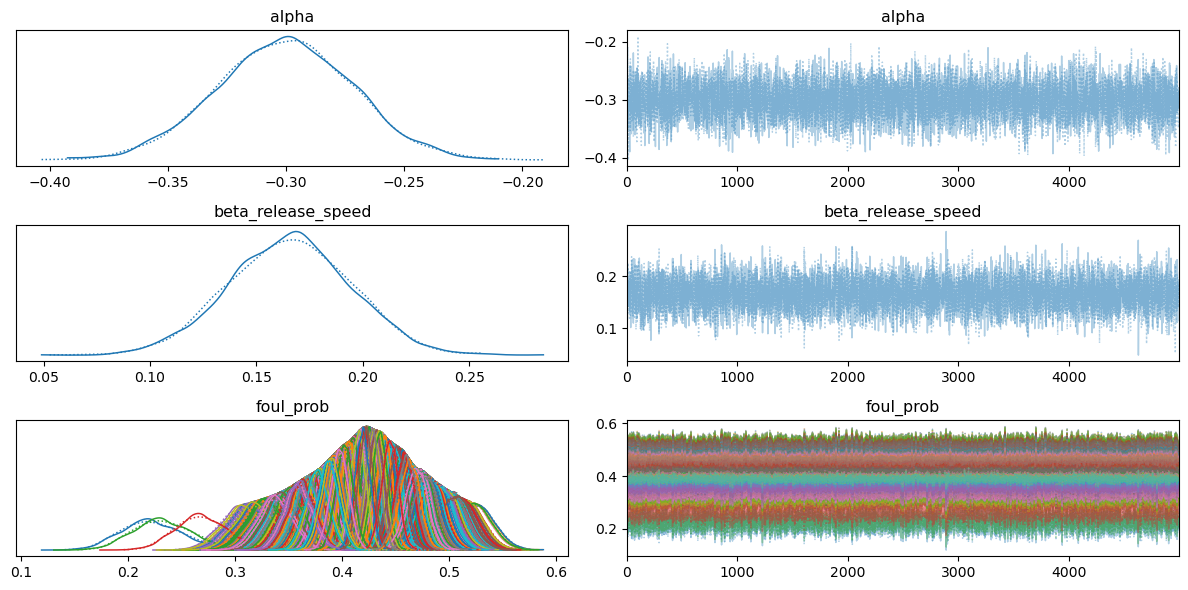

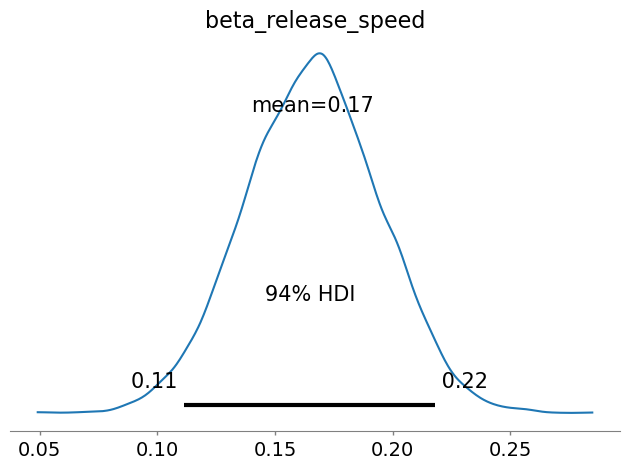

In [75]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from scipy.special import expit


# Define the Bayesian model
with pm.Model() as model_release_speed:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=1)  # Intercept
    beta_release_speed = pm.Normal("beta_release_speed", mu=0, sigma=1)  # Effect of release_speed

    # Logistic regression formula
    logits = alpha + beta_release_speed * data_subset['release_speed']
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))

    # Likelihood (observed fouling)
    Y_obs = pm.Bernoulli("Y_obs", p=foul_prob, observed=data_subset['foul_occurred'])

    # Sampling
    trace_release_speed = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# Diagnostic plots
# Plotting the trace
az.plot_trace(trace_release_speed)
plt.tight_layout()
plt.show()

# Visualization of posterior distribution
az.plot_posterior(trace_release_speed, var_names=["beta_release_speed"])
plt.tight_layout()
plt.show()

# Summary statistics including R-hat and ESS
summary_stats = az.summary(trace_release_speed, hdi_prob=0.95)  # 95% HDI
# print(summary_stats)



           mean     sd  hdi_2.5%  hdi_97.5%
contrast  0.081  0.014     0.054      0.108


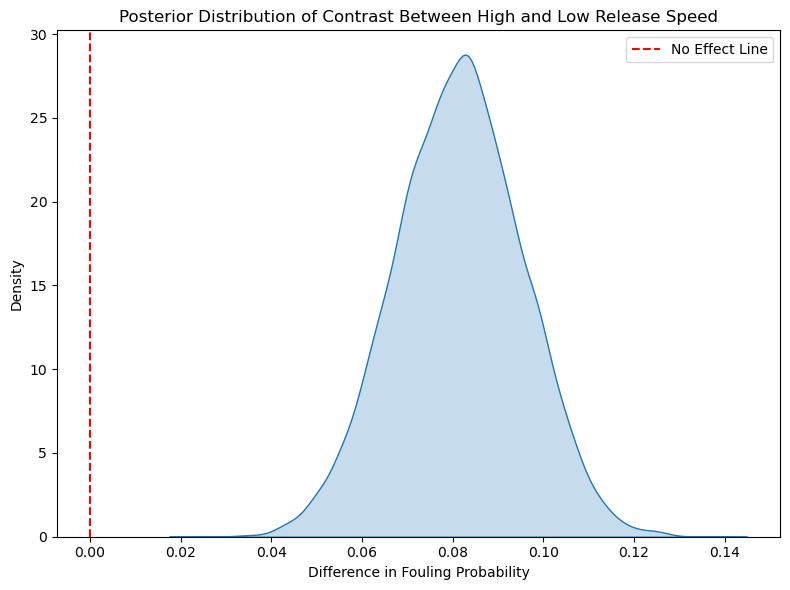

In [76]:
# Posterior Predictive Analysis for Low and High Release Speed
# Extract posterior samples for parameters
alpha_samples = trace_release_speed.posterior['alpha'].values.ravel()
beta_release_speed_samples = trace_release_speed.posterior['beta_release_speed'].values.ravel()

# Define release_speed conditions for comparison
low_release_speed = data_subset['release_speed'].mean() - data_subset['release_speed'].std()  # 1 SD below mean
high_release_speed = data_subset['release_speed'].mean() + data_subset['release_speed'].std()  # 1 SD above mean

# Calculate fouling probabilities for low and high release speed
foul_prob_low_release_speed = expit(alpha_samples + beta_release_speed_samples * low_release_speed)
foul_prob_high_release_speed = expit(alpha_samples + beta_release_speed_samples * high_release_speed)

# Calculate contrast
contrast = foul_prob_high_release_speed - foul_prob_low_release_speed

# Convert contrast to a NumPy array
contrast_np = np.array(contrast)

# Summary of contrast using ArviZ
contrast_summary = az.summary({'contrast': contrast_np}, kind='stats', hdi_prob=0.95)
print(contrast_summary)

# Plotting the contrast
plt.figure(figsize=(8, 6))
sns.kdeplot(contrast_np, fill=True)
plt.title("Posterior Distribution of Contrast Between High and Low Release Speed")
plt.xlabel("Difference in Fouling Probability")
plt.ylabel("Density")
plt.axvline(x=0, color='red', linestyle='--', label='No Effect Line')
plt.legend()
plt.tight_layout()
plt.savefig('contrast_fouling_high_low_release_speed.png')
plt.show()



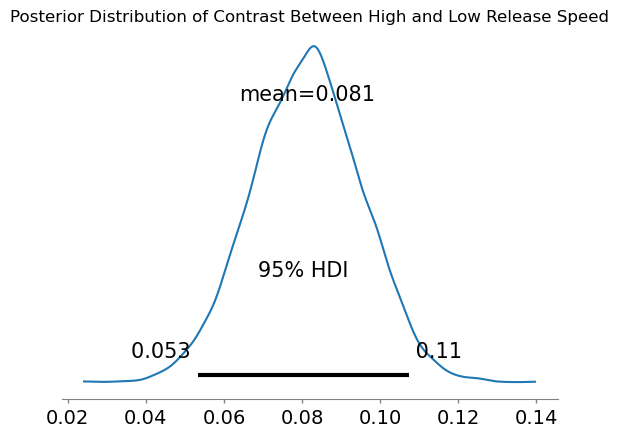

In [93]:
# Plotting the contrast
az.plot_posterior({'contrast': contrast}, hdi_prob=0.95)
plt.title("Posterior Distribution of Contrast Between High and Low Release Speed")
plt.show()

# Visualize Probability Distributions for each condition
low_mean = np.mean(foul_prob_low_release)
high_mean = np.mean(foul_prob_high_release)
low_ci = np.percentile(foul_prob_low_release, [2.5, 97.5])
high_ci = np.percentile(foul_prob_high_release, [2.5, 97.5])




Low Release Speed Foul Probability: Mean = 0.39, 95% CI = [0.37, 0.40]
High Release Speed Foul Probability: Mean = 0.47, 95% CI = [0.45, 0.49]


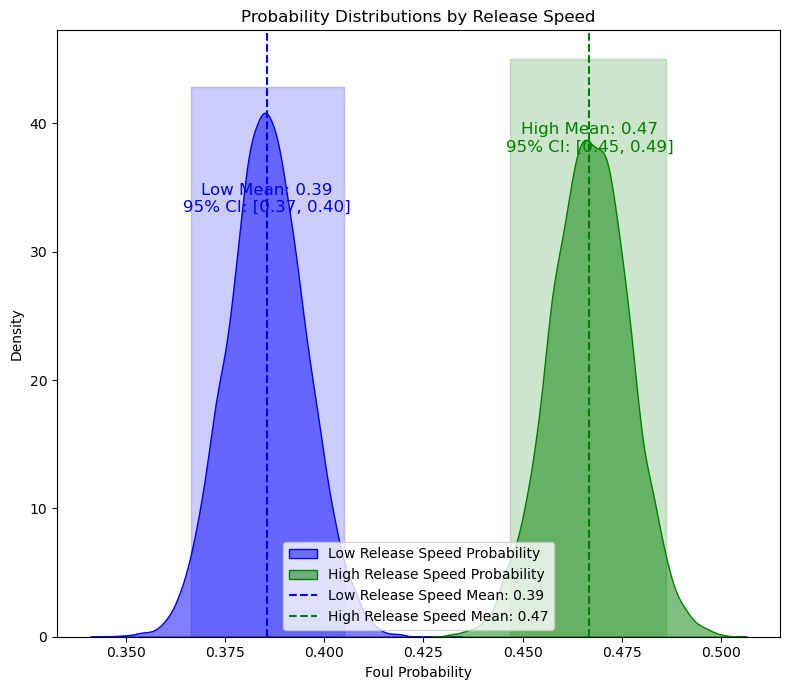

In [81]:
# Calculate and print credible intervals for fouling probabilities
low_mean = np.mean(foul_prob_low_release_speed)
high_mean = np.mean(foul_prob_high_release_speed)
low_ci = np.percentile(foul_prob_low_release_speed, [2.5, 97.5])
high_ci = np.percentile(foul_prob_high_release_speed, [2.5, 97.5])

print(f"Low Release Speed Foul Probability: Mean = {low_mean:.2f}, 95% CI = [{low_ci[0]:.2f}, {low_ci[1]:.2f}]")
print(f"High Release Speed Foul Probability: Mean = {high_mean:.2f}, 95% CI = [{high_ci[0]:.2f}, {high_ci[1]:.2f}]")

# Visualize Probability Distributions for each condition
plt.figure(figsize=(8, 7))
sns.kdeplot(foul_prob_low_release_speed, color='blue', label='Low Release Speed Probability', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_release_speed, color='green', label='High Release Speed Probability', fill=True, alpha=0.5)
plt.title("Probability Distributions by Release Speed")
plt.xlabel("Foul Probability")
plt.ylabel("Density")

# Annotate the means and credible intervals
plt.axvline(low_mean, color='blue', linestyle='--', label=f'Low Release Speed Mean: {low_mean:.2f}')
plt.axvline(high_mean, color='green', linestyle='--', label=f'High Release Speed Mean: {high_mean:.2f}')
plt.fill_betweenx([0, plt.ylim()[1]], low_ci[0], low_ci[1], color='blue', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], high_ci[0], high_ci[1], color='green', alpha=0.2)

# Adjust vertical positions to avoid overlap
plt.text(low_mean, plt.ylim()[1]*0.7, f'Low Mean: {low_mean:.2f}\n95% CI: [{low_ci[0]:.2f}, {low_ci[1]:.2f}]', color='blue', fontsize=12, ha='center')
plt.text(high_mean, plt.ylim()[1]*0.8, f'High Mean: {high_mean:.2f}\n95% CI: [{high_ci[0]:.2f}, {high_ci[1]:.2f}]', color='green', fontsize=12, ha='center')

plt.legend()
plt.tight_layout()
plt.savefig('probability_distributions_by_release_speed.png')  # Save the plot as a PNG file
plt.show()



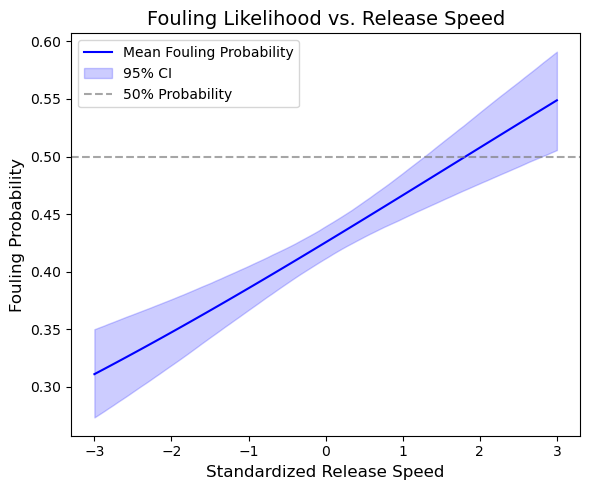

In [82]:
# Generate and plot probability curve for release speed
release_speed_range = np.linspace(-3, 3, 100)  # Standardized range (-3 to 3 SD)

# Calculate fouling probabilities for each release speed value
foul_probs = np.zeros((len(alpha_samples), len(release_speed_range)))

for i, release_speed in enumerate(release_speed_range):
    foul_probs[:, i] = expit(alpha_samples + beta_release_speed_samples * release_speed)

# Calculate the mean and 95% CI for fouling probabilities
foul_probs_mean = foul_probs.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs, 97.5, axis=0)

# Plot the probability curve
plt.figure(figsize=(6, 5))
plt.plot(release_speed_range, foul_probs_mean, label="Mean Fouling Probability", color='blue')
plt.fill_between(release_speed_range, foul_probs_lower, foul_probs_upper, color='blue', alpha=0.2, label="95% CI")
plt.title("Fouling Likelihood vs. Release Speed", fontsize=14)
plt.xlabel("Standardized Release Speed", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label="50% Probability")
plt.legend()
plt.tight_layout()
plt.savefig('fouling_likelihood_vs_release_speed.png')
plt.show()


# Interaction Effects Swing Length and Bat Speed

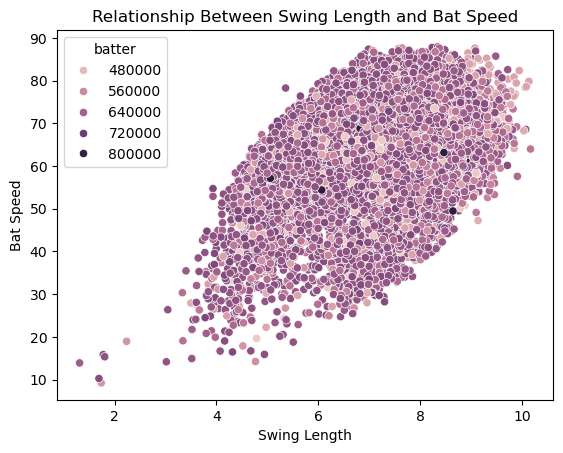

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='swing_length', y='bat_speed', hue='batter', data=filtered_data)  
plt.title('Relationship Between Swing Length and Bat Speed')
plt.xlabel('Swing Length')
plt.ylabel('Bat Speed')
plt.show()


# Question 3. How do bat speed, swing length, and their interaction influence the likelihood of fouling off a pitch?

## Interaction Effects Swing Length and Bat Speed

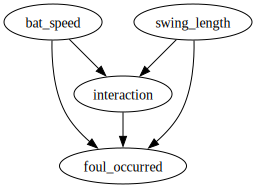

In [43]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

# Define the DAG
dag_interaction = CausalGraphicalModel(
    nodes=["bat_speed", "swing_length", "interaction", "foul_occurred"],
    edges=[
        # Direct effects
        ("bat_speed", "foul_occurred"),
        ("swing_length", "foul_occurred"),
        
        # Interaction effect
        ("bat_speed", "interaction"),
        ("swing_length", "interaction"),
        ("interaction", "foul_occurred")
    ]
)

Plot the DAG
dag_interaction.draw()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta_bat_speed, beta_swing_length, beta_interaction]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 331 seconds.


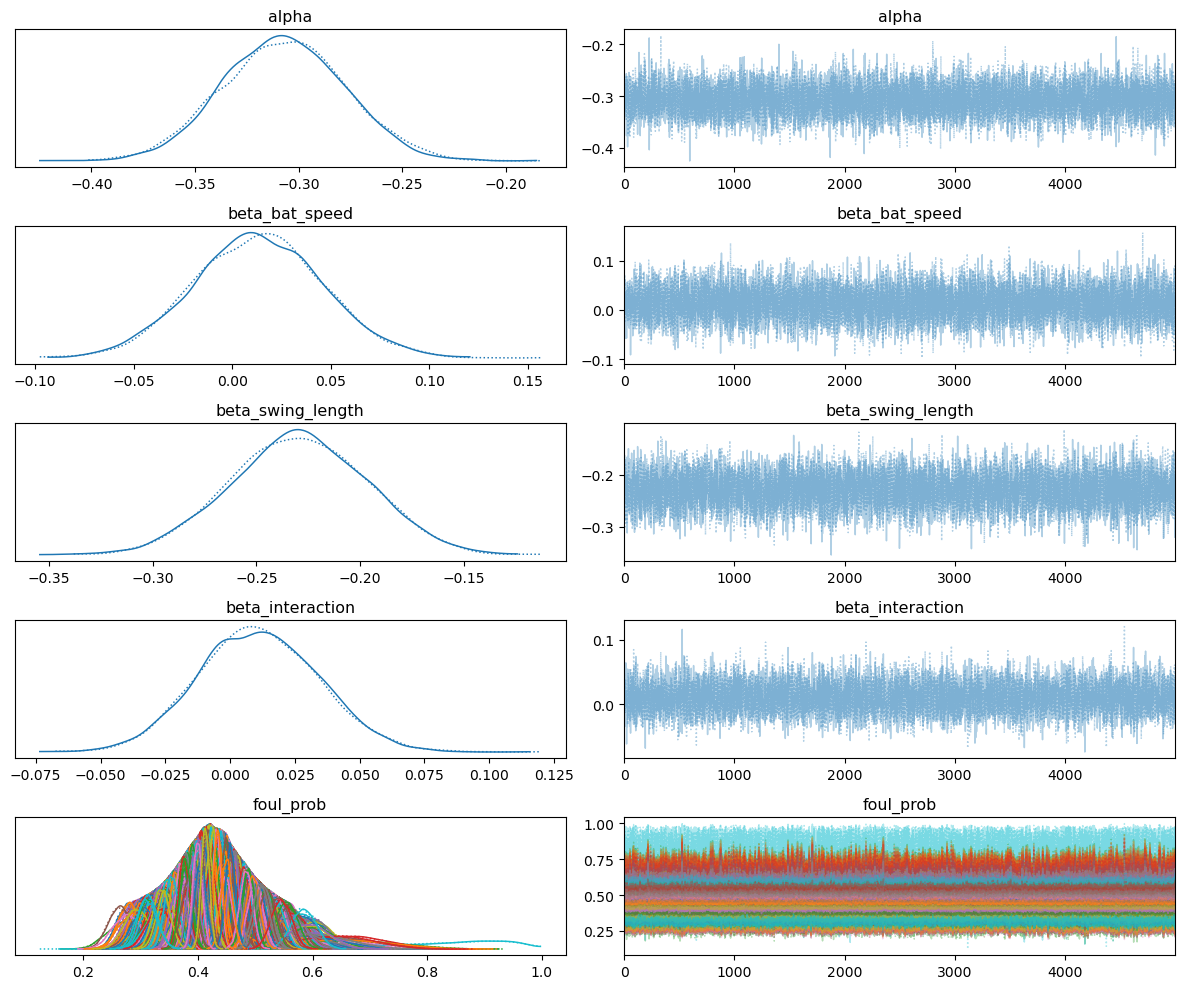

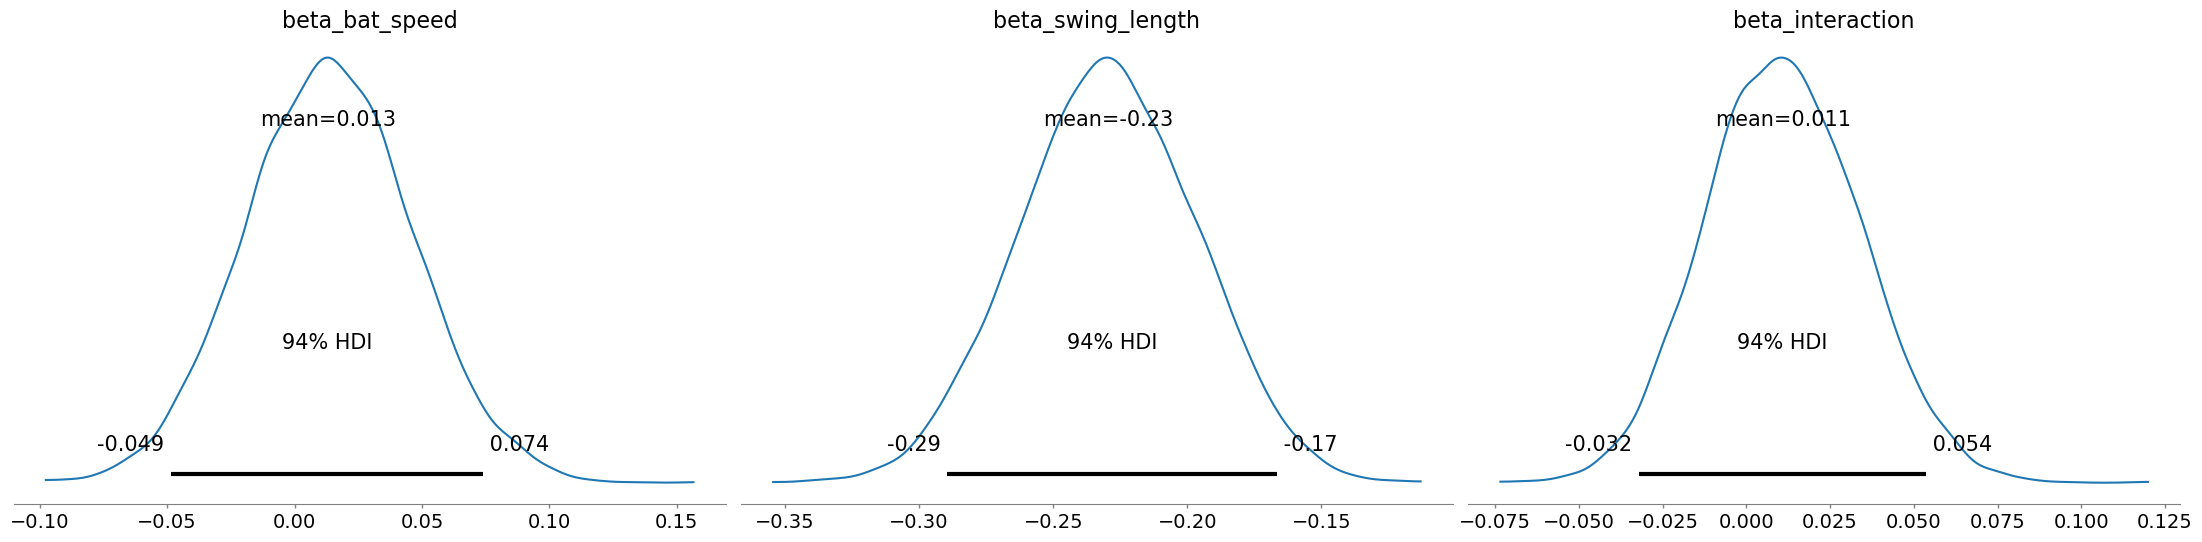

In [85]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
from scipy.special import expit

# Create an interaction term for bat_speed and swing_length
data_subset['interaction'] = data_subset['bat_speed'] * data_subset['swing_length']

# Define the Bayesian model
with pm.Model() as model_interaction:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=1)  # Intercept
    beta_bat_speed = pm.Normal("beta_bat_speed", mu=0, sigma=1)  # Effect of bat_speed
    beta_swing_length = pm.Normal("beta_swing_length", mu=0, sigma=1)  # Effect of swing_length
    beta_interaction = pm.Normal("beta_interaction", mu=0, sigma=1)  # Effect of interaction

    # Logistic regression formula
    logits = (alpha + 
              beta_bat_speed * data_subset['bat_speed'] + 
              beta_swing_length * data_subset['swing_length'] +
              beta_interaction * data_subset['interaction'])
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))

    # Likelihood (observed fouling)
    Y_obs = pm.Bernoulli("Y_obs", p=foul_prob, observed=data_subset['foul_occurred'])

    # Sampling
    trace_interaction = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# Diagnostic plots
# Plotting the trace
az.plot_trace(trace_interaction)
plt.tight_layout()
plt.show()

# Visualization of posterior distribution for parameters
az.plot_posterior(trace_interaction, var_names=["beta_bat_speed", "beta_swing_length", "beta_interaction"])
plt.tight_layout()
plt.show()

# Summary statistics including R-hat and ESS
summary_stats = az.summary(trace_interaction, hdi_prob=0.95)  # 95% HDI
# print(summary_stats)



In [101]:
# Posterior Predictive Analysis for Interaction
# Extract posterior samples for parameters
alpha_samples = trace_interaction.posterior['alpha'].values.ravel()
beta_bat_speed_samples = trace_interaction.posterior['beta_bat_speed'].values.ravel()
beta_swing_length_samples = trace_interaction.posterior['beta_swing_length'].values.ravel()
beta_interaction_samples = trace_interaction.posterior['beta_interaction'].values.ravel()
# Calculate fouling probabilities for combinations of bat speed and swing length
foul_prob_low_low = pm.math.sigmoid(
    alpha_samples +
    beta_bat_speed_samples * low_bat_speed +
    beta_swing_length_samples * low_swing_length +
    beta_interaction_samples * (low_bat_speed * low_swing_length)
).eval()

foul_prob_low_high = pm.math.sigmoid(
    alpha_samples +
    beta_bat_speed_samples * low_bat_speed +
    beta_swing_length_samples * high_swing_length +
    beta_interaction_samples * (low_bat_speed * high_swing_length)
).eval()

foul_prob_high_low = pm.math.sigmoid(
    alpha_samples +
    beta_bat_speed_samples * high_bat_speed +
    beta_swing_length_samples * low_swing_length +
    beta_interaction_samples * (high_bat_speed * low_swing_length)
).eval()

foul_prob_high_high = pm.math.sigmoid(
    alpha_samples +
    beta_bat_speed_samples * high_bat_speed +
    beta_swing_length_samples * high_swing_length +
    beta_interaction_samples * (high_bat_speed * high_swing_length)
).eval()


High vs. Low Contrast:            mean     sd  hdi_2.5%  hdi_97.5%
contrast -0.105  0.021    -0.145     -0.063
Low vs. High Contrast:            mean     sd  hdi_2.5%  hdi_97.5%
contrast -0.115  0.016    -0.146     -0.083


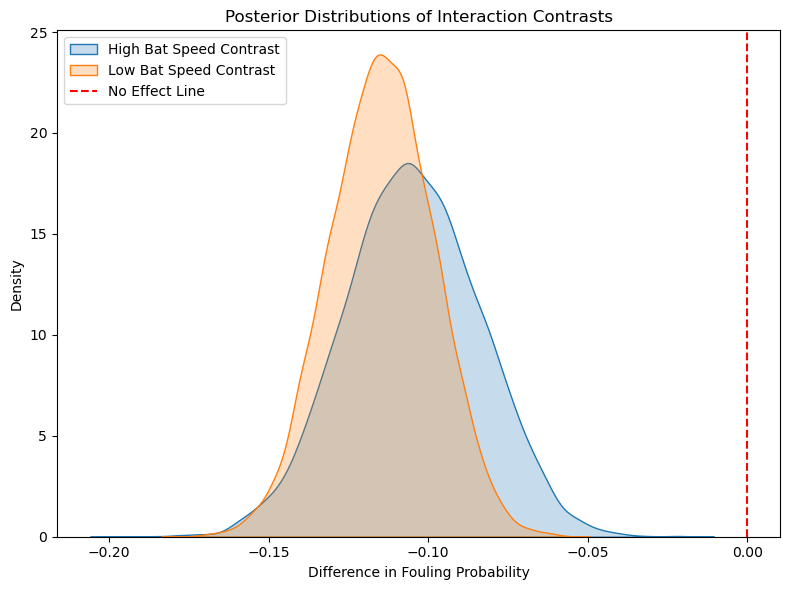

In [96]:
# Calculate contrasts for interactions
contrast_high_low = foul_prob_high_high - foul_prob_high_low
contrast_low_high = foul_prob_low_high - foul_prob_low_low

# Summarize the contrasts
contrast_summary_high_low = az.summary({'contrast': contrast_high_low}, kind='stats', hdi_prob=0.95)
contrast_summary_low_high = az.summary({'contrast': contrast_low_high}, kind='stats', hdi_prob=0.95)
print("High vs. Low Contrast:", contrast_summary_high_low)
print("Low vs. High Contrast:", contrast_summary_low_high)

# Plotting contrasts
plt.figure(figsize=(8, 6))
sns.kdeplot(contrast_high_low, fill=True, label='High Bat Speed Contrast')
sns.kdeplot(contrast_low_high, fill=True, label='Low Bat Speed Contrast')
plt.title("Posterior Distributions of Interaction Contrasts")
plt.xlabel("Difference in Fouling Probability")
plt.ylabel("Density")
plt.axvline(x=0, color='red', linestyle='--', label='No Effect Line')
plt.legend()
plt.tight_layout()
plt.savefig('Posterior Distributions of Interaction Contrasts.png')
plt.show()

# Visualize Probability Distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(foul_prob_low_low, color='blue', label='Low Bat Speed, Low Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_low_high, color='green', label='Low Bat Speed, High Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_low, color='purple', label='High Bat Speed, Low Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_high, color='orange', label='High Bat Speed, High Swing Length', fill=True, alpha=0.5)
plt.title("Fouling Probabilities for Bat Speed and Swing Length Interaction")
plt.xlabel("Fouling Probability")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Visualize Probability Distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(foul_prob_low_low, color='blue', label='Low Bat Speed, Low Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_low_high, color='green', label='Low Bat Speed, High Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_low, color='purple', label='High Bat Speed, Low Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_high, color='orange', label='High Bat Speed, High Swing Length', fill=True, alpha=0.5)
plt.title("Fouling Probabilities for Bat Speed and Swing Length Interaction")
plt.xlabel("Fouling Probability")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig('Fouling Probabilities for Bat Speed and Swing Length Interaction.png')
plt.show()

Foul Probabilities:
High-High: [0.36853945 0.39226584 0.36930191 0.37279326 0.38136633]
High-Low: [0.50014118 0.49969743 0.49426059 0.49461038 0.49254649]
Low-High: [0.37986107 0.370056   0.35449119 0.37114074 0.35435661]
Low-Low: [0.50392855 0.47081894 0.49750759 0.4667653  0.459981  ]
Contrasts:
High-Low Contrast: [-0.13160173 -0.10743159 -0.12495869 -0.12181713 -0.11118016]
Low-High Contrast: [-0.12406748 -0.10076295 -0.1430164  -0.09562456 -0.10562439]
Summary Statistics:
High-Low Mean: -0.1050450438966961, 95% CI: [-0.14635542 -0.06411691]
Low-High Mean: -0.11463964683672694, 95% CI: [-0.14651506 -0.08326227]


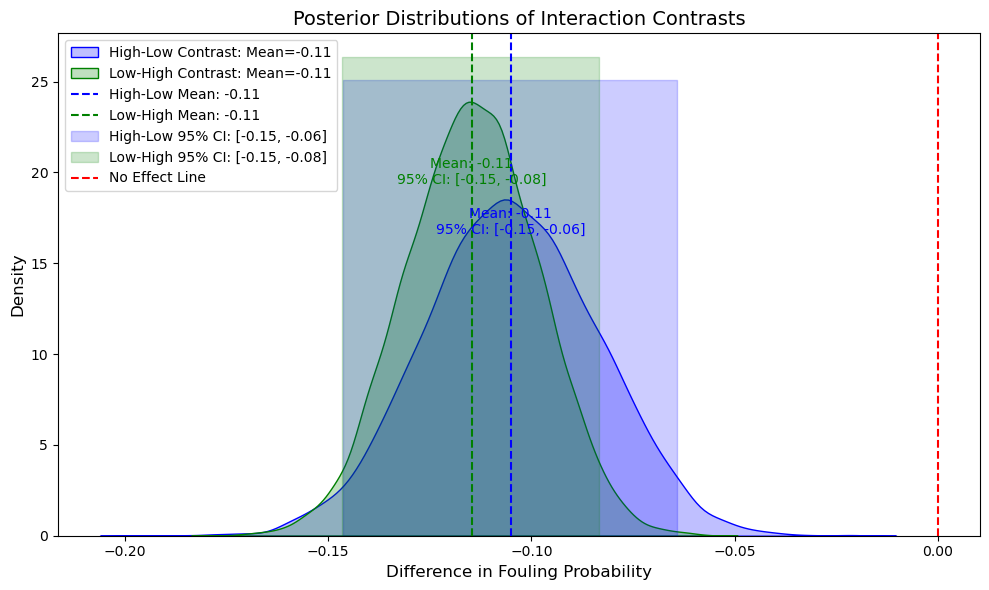

In [109]:
# Print foul probabilities
print("Foul Probabilities:")
print(f"High-High: {foul_prob_high_high[:5]}")
print(f"High-Low: {foul_prob_high_low[:5]}")
print(f"Low-High: {foul_prob_low_high[:5]}")
print(f"Low-Low: {foul_prob_low_low[:5]}")

# Print contrasts
print("Contrasts:")
print(f"High-Low Contrast: {contrast_high_low[:5]}")
print(f"Low-High Contrast: {contrast_low_high[:5]}")

# Calculate means and CIs
high_low_mean = np.mean(contrast_high_low)
high_low_ci = np.percentile(contrast_high_low, [2.5, 97.5])
low_high_mean = np.mean(contrast_low_high)
low_high_ci = np.percentile(contrast_low_high, [2.5, 97.5])

print("Summary Statistics:")
print(f"High-Low Mean: {high_low_mean}, 95% CI: {high_low_ci}")
print(f"Low-High Mean: {low_high_mean}, 95% CI: {low_high_ci}")

# Plotting contrasts with annotations
plt.figure(figsize=(10, 6))
sns.kdeplot(contrast_high_low, fill=True, label=f'High-Low Contrast: Mean={high_low_mean:.2f}', color='blue')
sns.kdeplot(contrast_low_high, fill=True, label=f'Low-High Contrast: Mean={low_high_mean:.2f}', color='green')

# Add vertical lines and shaded regions for means and CIs
plt.axvline(high_low_mean, color='blue', linestyle='--', label=f'High-Low Mean: {high_low_mean:.2f}')
plt.axvline(low_high_mean, color='green', linestyle='--', label=f'Low-High Mean: {low_high_mean:.2f}')

plt.fill_betweenx([0, plt.ylim()[1]], high_low_ci[0], high_low_ci[1], color='blue', alpha=0.2, label=f'High-Low 95% CI: [{high_low_ci[0]:.2f}, {high_low_ci[1]:.2f}]')
plt.fill_betweenx([0, plt.ylim()[1]], low_high_ci[0], low_high_ci[1], color='green', alpha=0.2, label=f'Low-High 95% CI: [{low_high_ci[0]:.2f}, {low_high_ci[1]:.2f}]')

# Add annotations
plt.text(high_low_mean, plt.ylim()[1] * 0.6, f'Mean: {high_low_mean:.2f}\n95% CI: [{high_low_ci[0]:.2f}, {high_low_ci[1]:.2f}]', color='blue', ha='center')
plt.text(low_high_mean, plt.ylim()[1] * 0.7, f'Mean: {low_high_mean:.2f}\n95% CI: [{low_high_ci[0]:.2f}, {low_high_ci[1]:.2f}]', color='green', ha='center')

plt.title("Posterior Distributions of Interaction Contrasts", fontsize=14)
plt.xlabel("Difference in Fouling Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', label='No Effect Line')
plt.legend()
plt.tight_layout()
plt.savefig('Posterior Distributions of Interaction Contrasts Bat Speed and Swing Lenght.png')
plt.show()


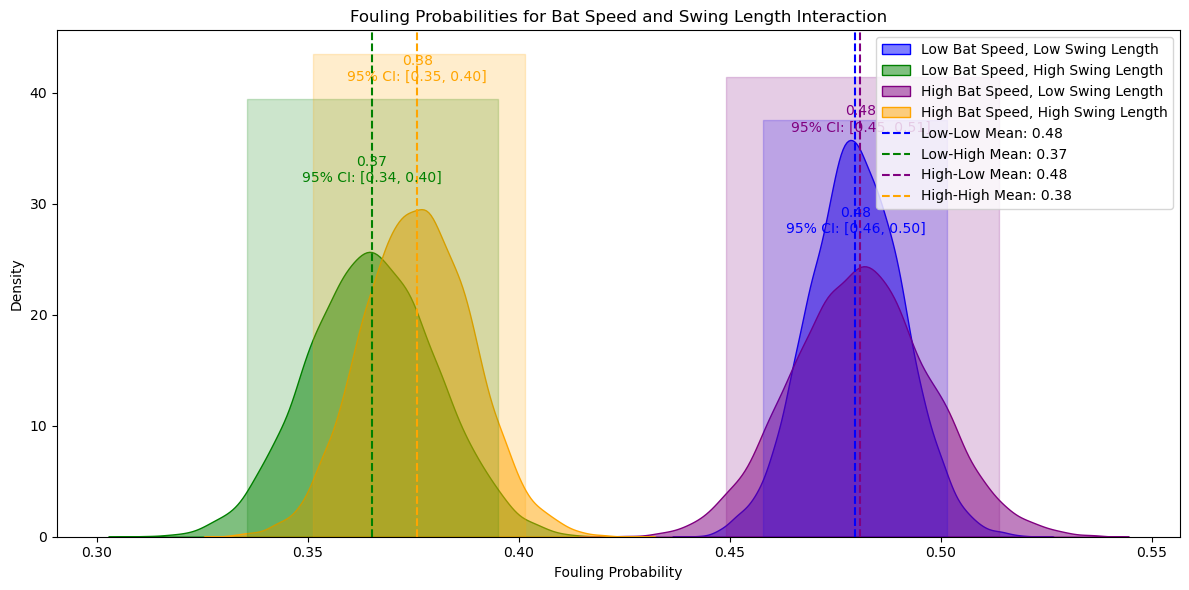

In [100]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Calculate and print credible intervals for fouling probabilities
# Calculate the means and 95% CIs for fouling probabilities
low_low_mean = np.mean(foul_prob_low_low)
low_low_ci = np.percentile(foul_prob_low_low, [2.5, 97.5])
low_high_mean = np.mean(foul_prob_low_high)
low_high_ci = np.percentile(foul_prob_low_high, [2.5, 97.5])
high_low_mean = np.mean(foul_prob_high_low)
high_low_ci = np.percentile(foul_prob_high_low, [2.5, 97.5])
high_high_mean = np.mean(foul_prob_high_high)
high_high_ci = np.percentile(foul_prob_high_high, [2.5, 97.5])

# Plot fouling probabilities for each condition
plt.figure(figsize=(12, 6))
sns.kdeplot(foul_prob_low_low, color='blue', label='Low Bat Speed, Low Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_low_high, color='green', label='Low Bat Speed, High Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_low, color='purple', label='High Bat Speed, Low Swing Length', fill=True, alpha=0.5)
sns.kdeplot(foul_prob_high_high, color='orange', label='High Bat Speed, High Swing Length', fill=True, alpha=0.5)
plt.title("Fouling Probabilities for Bat Speed and Swing Length Interaction")
plt.xlabel("Fouling Probability")
plt.ylabel("Density")

# Annotate the means and 95% CIs for each condition
plt.axvline(low_low_mean, color='blue', linestyle='--', label=f'Low-Low Mean: {low_low_mean:.2f}')
plt.axvline(low_high_mean, color='green', linestyle='--', label=f'Low-High Mean: {low_high_mean:.2f}')
plt.axvline(high_low_mean, color='purple', linestyle='--', label=f'High-Low Mean: {high_low_mean:.2f}')
plt.axvline(high_high_mean, color='orange', linestyle='--', label=f'High-High Mean: {high_high_mean:.2f}')
plt.fill_betweenx([0, plt.ylim()[1]], low_low_ci[0], low_low_ci[1], color='blue', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], low_high_ci[0], low_high_ci[1], color='green', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], high_low_ci[0], high_low_ci[1], color='purple', alpha=0.2)
plt.fill_betweenx([0, plt.ylim()[1]], high_high_ci[0], high_high_ci[1], color='orange', alpha=0.2)

# Add text annotations for each mean and CI
plt.text(low_low_mean, plt.ylim()[1] * 0.6, f'{low_low_mean:.2f}\n95% CI: [{low_low_ci[0]:.2f}, {low_low_ci[1]:.2f}]', color='blue', ha='center')
plt.text(low_high_mean, plt.ylim()[1] * 0.7, f'{low_high_mean:.2f}\n95% CI: [{low_high_ci[0]:.2f}, {low_high_ci[1]:.2f}]', color='green', ha='center')
plt.text(high_low_mean, plt.ylim()[1] * 0.8, f'{high_low_mean:.2f}\n95% CI: [{high_low_ci[0]:.2f}, {high_low_ci[1]:.2f}]', color='purple', ha='center')
plt.text(high_high_mean, plt.ylim()[1] * 0.9, f'{high_high_mean:.2f}\n95% CI: [{high_high_ci[0]:.2f}, {high_high_ci[1]:.2f}]', color='orange', ha='center')

plt.legend()
plt.tight_layout()
plt.savefig('Fouling Probabilities for Bat Speed and Swing Length Interaction with Label.png')
plt.show()


In [116]:
# Print the results
print(f"Low Bat Speed & Low Swing Length Foul Probability: Mean = {low_low_mean:.2f}, 95% CI = [{low_low_ci[0]:.2f}, {low_low_ci[1]:.2f}]")
print(f"Low Bat Speed & High Swing Length Foul Probability: Mean = {low_high_mean:.2f}, 95% CI = [{low_high_ci[0]:.2f}, {low_high_ci[1]:.2f}]")
print(f"High Bat Speed & Low Swing Length Foul Probability: Mean = {high_low_mean:.2f}, 95% CI = [{high_low_ci[0]:.2f}, {high_low_ci[1]:.2f}]")
print(f"High Bat Speed & High Swing Length Foul Probability: Mean = {high_high_mean:.2f}, 95% CI = [{high_high_ci[0]:.2f}, {high_high_ci[1]:.2f}]")

Low Bat Speed & Low Swing Length Foul Probability: Mean = 0.48, 95% CI = [0.46, 0.50]
Low Bat Speed & High Swing Length Foul Probability: Mean = -0.11, 95% CI = [-0.15, -0.08]
High Bat Speed & Low Swing Length Foul Probability: Mean = -0.11, 95% CI = [-0.15, -0.06]
High Bat Speed & High Swing Length Foul Probability: Mean = 0.38, 95% CI = [0.35, 0.40]


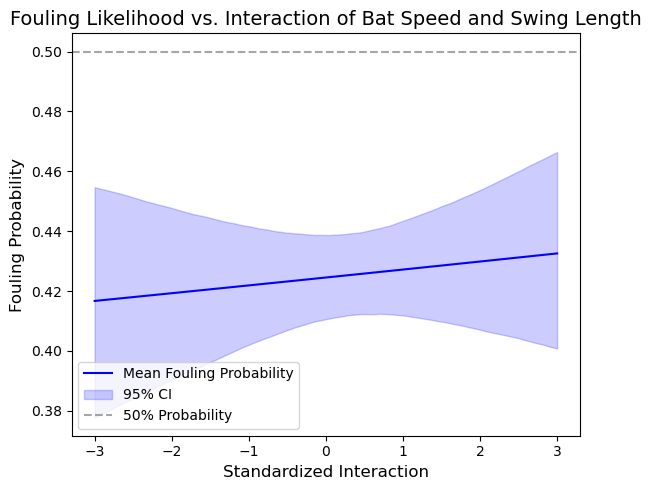

In [88]:
# Generate and plot probability curve for interaction
interaction_range = np.linspace(-3, 3, 100)  # Standardized range (-3 to 3 SD)

# Calculate fouling probabilities for each interaction value
foul_probs = np.zeros((len(alpha_samples), len(interaction_range)))

for i, interaction in enumerate(interaction_range):
    foul_probs[:, i] = expit(alpha_samples +
                             beta_bat_speed_samples * data_subset['bat_speed'].mean() +
                             beta_swing_length_samples * data_subset['swing_length'].mean() +
                             beta_interaction_samples * interaction)

# Calculate the mean and 95% CI for fouling probabilities
foul_probs_mean = foul_probs.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs, 97.5, axis=0)

# Plot the probability curve
plt.figure(figsize=(6, 5))
plt.plot(interaction_range, foul_probs_mean, label="Mean Fouling Probability", color='blue')
plt.fill_between(interaction_range, foul_probs_lower, foul_probs_upper, color='blue', alpha=0.2, label="95% CI")
plt.title("Fouling Likelihood vs. Interaction of Bat Speed and Swing Length", fontsize=14)
plt.xlabel("Standardized Interaction", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label="50% Probability")
plt.legend()
plt.tight_layout()
plt.savefig('fouling_likelihood_vs_interaction.png')
plt.show()



## Question 4: How do batter mechanics (bat speed, swing length) influence pitch movement (pfx_x, pfx_z), and how do these movements impact the likelihood of fouling off a pitch?

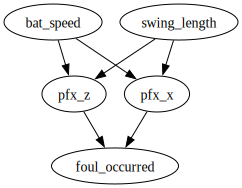

In [51]:
dag_interaction_pitch_movement = CausalGraphicalModel(
    nodes=["bat_speed", "swing_length", "pfx_x", "pfx_z", "foul_occurred"],
    edges=[
        ("bat_speed", "pfx_x"),
        ("bat_speed", "pfx_z"),
        ("swing_length", "pfx_x"),
        ("swing_length", "pfx_z"),
        ("pfx_x", "foul_occurred"),
        ("pfx_z", "foul_occurred")
    ]
)
dag_interaction_pitch_movement.draw()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [alpha, beta_bat_speed, beta_swing_length, beta_pfx_x, beta_pfx_z, beta_interaction]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 164 seconds.


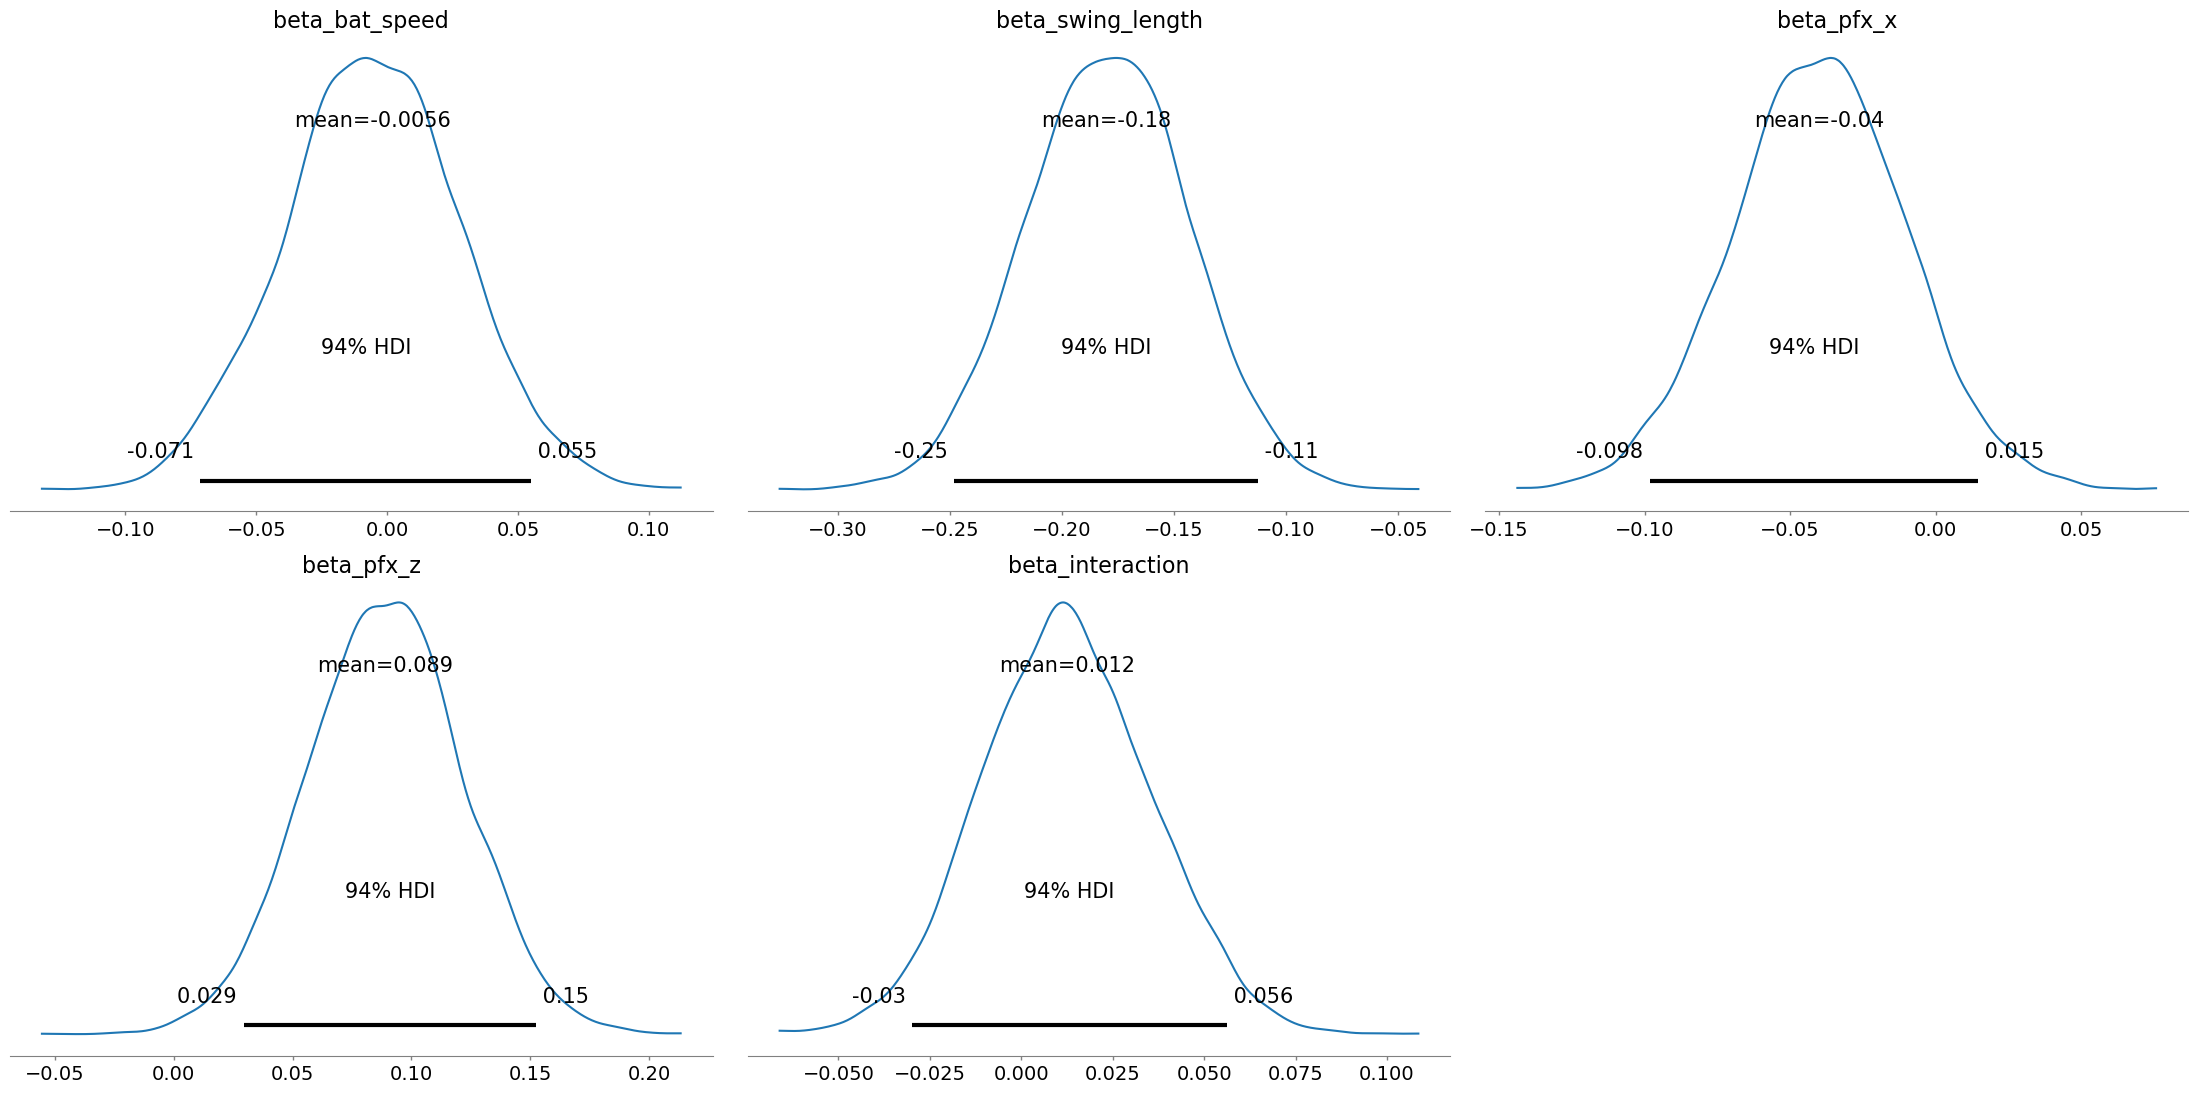

In [121]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit
import arviz as az



# Calculate low and high values for each variable (1 SD below and above mean)
low_bat_speed = data_subset['bat_speed'].mean() - data_subset['bat_speed'].std()
high_bat_speed = data_subset['bat_speed'].mean() + data_subset['bat_speed'].std()

low_swing_length = data_subset['swing_length'].mean() - data_subset['swing_length'].std()
high_swing_length = data_subset['swing_length'].mean() + data_subset['swing_length'].std()

low_pfx_x = data_subset['pfx_x'].mean() - data_subset['pfx_x'].std()
high_pfx_x = data_subset['pfx_x'].mean() + data_subset['pfx_x'].std()

low_pfx_z = data_subset['pfx_z'].mean() - data_subset['pfx_z'].std()
high_pfx_z = data_subset['pfx_z'].mean() + data_subset['pfx_z'].std()

# Define the Bayesian model
with pm.Model() as model_interaction_pitch_movement:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=1)
    beta_bat_speed = pm.Normal("beta_bat_speed", mu=0, sigma=1)
    beta_swing_length = pm.Normal("beta_swing_length", mu=0, sigma=1)
    beta_pfx_x = pm.Normal("beta_pfx_x", mu=0, sigma=1)
    beta_pfx_z = pm.Normal("beta_pfx_z", mu=0, sigma=1)
    beta_interaction = pm.Normal("beta_interaction", mu=0, sigma=1)

    # Logistic regression formula
    logits = (
        alpha +
        beta_bat_speed * data_subset['bat_speed'] +
        beta_swing_length * data_subset['swing_length'] +
        beta_pfx_x * data_subset['pfx_x'] +
        beta_pfx_z * data_subset['pfx_z'] +
        beta_interaction * data_subset['interaction']
    )
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))

    # Likelihood (observed fouling)
    Y_obs = pm.Bernoulli("Y_obs", p=foul_prob, observed=data_subset['foul_occurred'])

    # Sampling
    trace = pm.sample(5000, chains=2, cores=1, return_inferencedata=True)

# # Diagnostic plots
# az.plot_trace(trace_interaction)
# plt.tight_layout()
# plt.savefig("trace_plot_interaction.png")  # Save the trace plot
# plt.show()

## Posterior analysis
az.plot_posterior(
    trace,
    var_names=[
        "beta_bat_speed", "beta_swing_length",
        "beta_pfx_x", "beta_pfx_z", "beta_interaction"
    ]
)
plt.tight_layout()
plt.savefig("posterior_plot_interaction_batspeed_swinglength_and_pitch_movement.png")  # Save the posterior plot
plt.show()


# Summary statistics including R-hat and ESS
summary_stats = az.summary(trace, hdi_prob=0.95)  # 95% HD


# print(summary_stats)

Combination 1: Mean = 0.46, 95% CI = [0.43, 0.50]
Combination 2: Mean = 0.41, 95% CI = [0.37, 0.45]
Combination 3: Mean = 0.43, 95% CI = [0.39, 0.48]
Combination 4: Mean = 0.39, 95% CI = [0.36, 0.43]


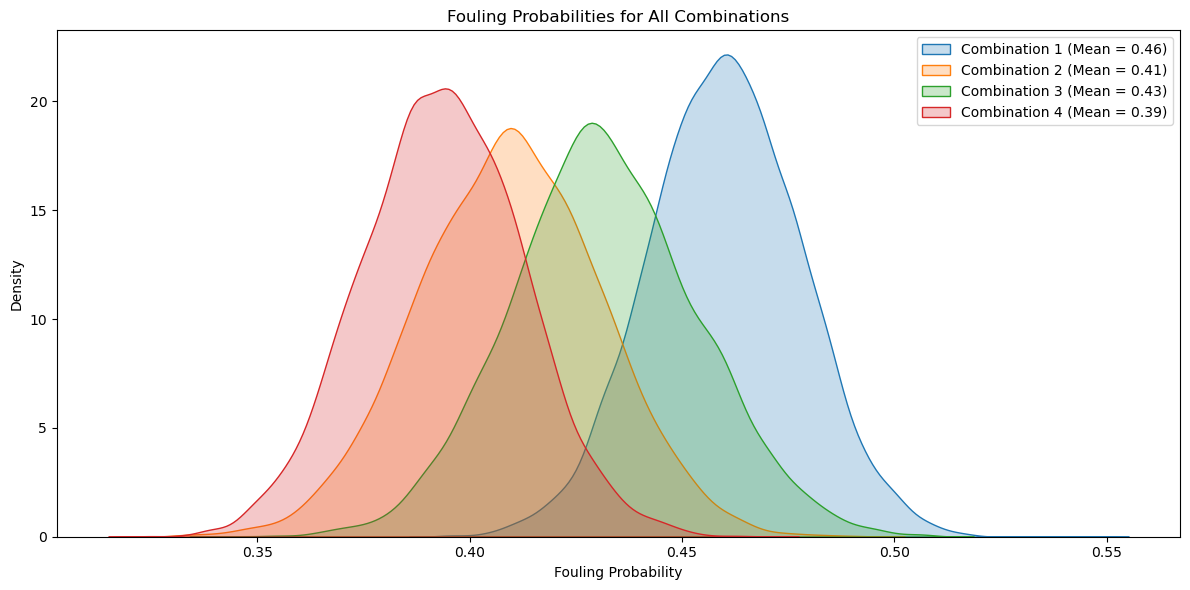

In [122]:
# Extract posterior samples
alpha_samples = trace.posterior['alpha'].values.ravel()
beta_bat_speed_samples = trace.posterior['beta_bat_speed'].values.ravel()
beta_swing_length_samples = trace.posterior['beta_swing_length'].values.ravel()
beta_pfx_x_samples = trace.posterior['beta_pfx_x'].values.ravel()
beta_pfx_z_samples = trace.posterior['beta_pfx_z'].values.ravel()
beta_interaction_samples = trace.posterior['beta_interaction'].values.ravel()


# Define low and high conditions for standardized variables
low_bat_speed = -1  # Approx 1 SD below mean for standardized variables
high_bat_speed = 1  # Approx 1 SD above mean
low_swing_length = -1
high_swing_length = 1
low_pfx_x = -1
high_pfx_x = 1
low_pfx_z = -1
high_pfx_z = 1


# Define combinations
combinations = [
    (low_bat_speed, low_swing_length, low_pfx_x, low_pfx_z),
    (low_bat_speed, high_swing_length, low_pfx_x, high_pfx_z),
    (high_bat_speed, low_swing_length, high_pfx_x, low_pfx_z),
    (high_bat_speed, high_swing_length, high_pfx_x, high_pfx_z)
]

# Calculate fouling probabilities for combinations
foul_probs = {}
for i, (bs, sl, px, pz) in enumerate(combinations):
    prob = expit(
        alpha_samples +
        beta_bat_speed_samples * bs +
        beta_swing_length_samples * sl +
        beta_pfx_x_samples * px +
        beta_pfx_z_samples * pz +
        beta_interaction_samples * (bs * sl)
    )
    mean_prob = np.mean(prob)
    ci = np.percentile(prob, [2.5, 97.5])
    foul_probs[f"Combination {i+1}"] = {"mean": mean_prob, "95% CI": ci}

# Print fouling probabilities
for comb, values in foul_probs.items():
    print(f"{comb}: Mean = {values['mean']:.2f}, 95% CI = [{values['95% CI'][0]:.2f}, {values['95% CI'][1]:.2f}]")

# Visualize fouling probabilities
plt.figure(figsize=(12, 6))
colors = sns.color_palette("tab10", len(foul_probs))
for idx, (comb, values) in enumerate(foul_probs.items()):
    sns.kdeplot(
        expit(
            alpha_samples +
            beta_bat_speed_samples * combinations[idx][0] +
            beta_swing_length_samples * combinations[idx][1] +
            beta_pfx_x_samples * combinations[idx][2] +
            beta_pfx_z_samples * combinations[idx][3] +
            beta_interaction_samples * (combinations[idx][0] * combinations[idx][1])
        ),
        label=f"{comb} (Mean = {values['mean']:.2f})",
        color=colors[idx],
        fill=True
    )
plt.title("Fouling Probabilities for All Combinations")
plt.xlabel("Fouling Probability")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.savefig("fouling_probabilities_combinations.png")
plt.show()



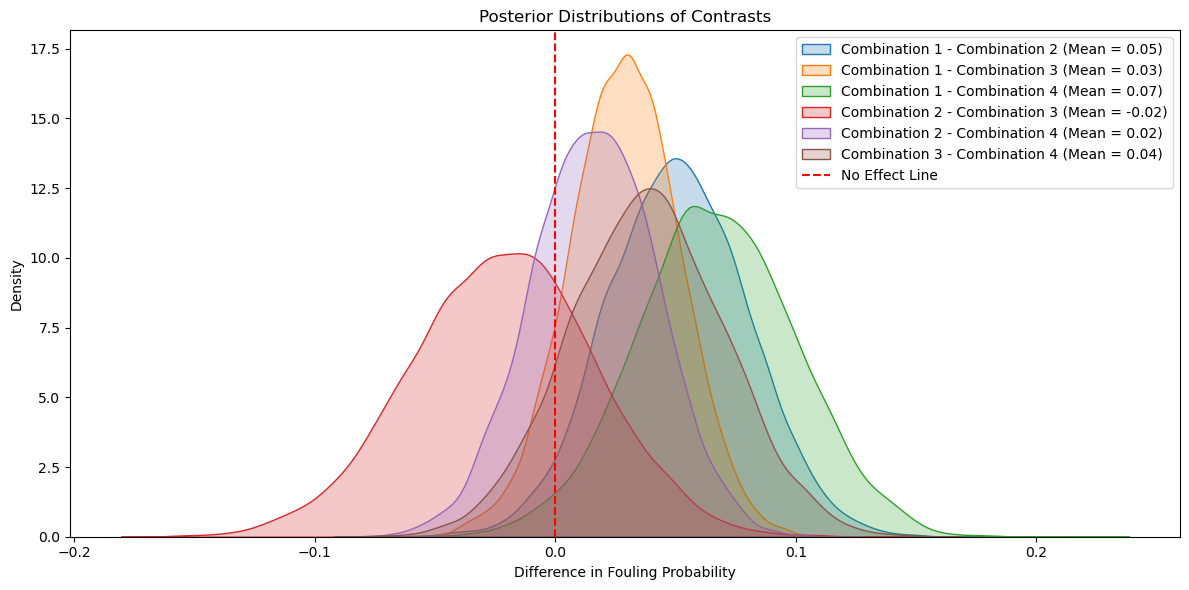

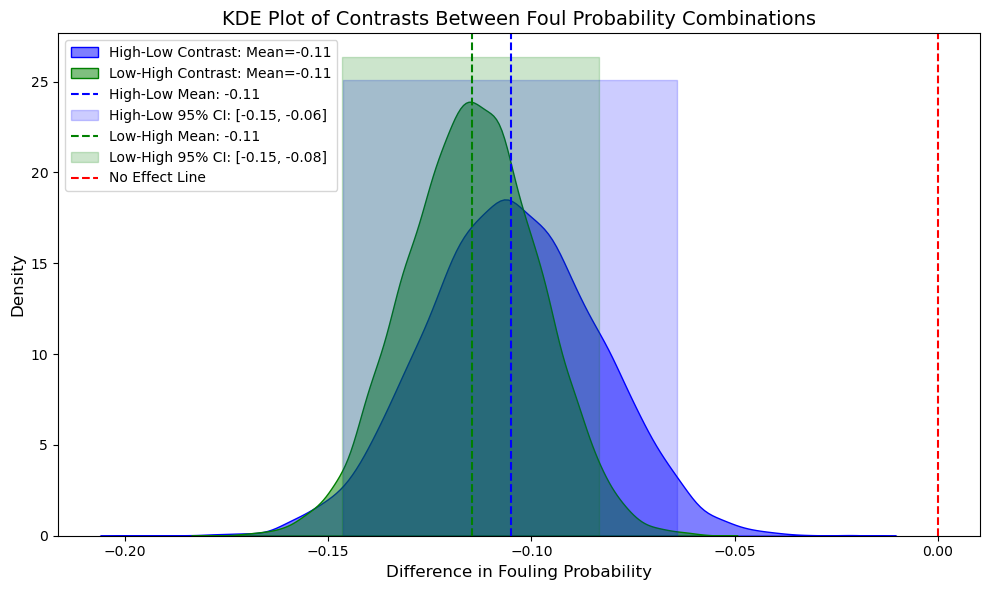

In [123]:
# Contrast Calculation
contrasts = {}
for i, comb1 in enumerate(combinations):
    for j, comb2 in enumerate(combinations):
        if i < j:
            contrast = expit(
                alpha_samples +
                beta_bat_speed_samples * comb1[0] +
                beta_swing_length_samples * comb1[1] +
                beta_pfx_x_samples * comb1[2] +
                beta_pfx_z_samples * comb1[3] +
                beta_interaction_samples * (comb1[0] * comb1[1])
            ) - expit(
                alpha_samples +
                beta_bat_speed_samples * comb2[0] +
                beta_swing_length_samples * comb2[1] +
                beta_pfx_x_samples * comb2[2] +
                beta_pfx_z_samples * comb2[3] +
                beta_interaction_samples * (comb2[0] * comb2[1])
            )
            contrasts[f"Combination {i+1} - Combination {j+1}"] = contrast

# Plot Dynamic Contrasts
plt.figure(figsize=(12, 6))
for contrast_name, contrast_values in contrasts.items():
    sns.kdeplot(contrast_values, label=f"{contrast_name} (Mean = {np.mean(contrast_values):.2f})", fill=True)
plt.title("Posterior Distributions of Contrasts")
plt.xlabel("Difference in Fouling Probability")
plt.ylabel("Density")
plt.axvline(0, color="red", linestyle="--", label="No Effect Line")
plt.legend()
plt.tight_layout()
plt.savefig("posterior_distributions_of_dynamic_contrasts.png")
plt.show()

# Static Contrast Calculation
contrast_high_low_mean = np.mean(contrast_high_low)
contrast_high_low_ci = np.percentile(contrast_high_low, [2.5, 97.5])
contrast_low_high_mean = np.mean(contrast_low_high)
contrast_low_high_ci = np.percentile(contrast_low_high, [2.5, 97.5])

# KDE Plot for Static Contrasts
plt.figure(figsize=(10, 6))
sns.kdeplot(contrast_high_low, fill=True, color="blue", alpha=0.5, label=f"High-Low Contrast: Mean={contrast_high_low_mean:.2f}")
sns.kdeplot(contrast_low_high, fill=True, color="green", alpha=0.5, label=f"Low-High Contrast: Mean={contrast_low_high_mean:.2f}")

# Annotations for Mean and CI
plt.axvline(contrast_high_low_mean, color="blue", linestyle="--", label=f"High-Low Mean: {contrast_high_low_mean:.2f}")
plt.fill_betweenx(
    [0, plt.ylim()[1]],
    contrast_high_low_ci[0], contrast_high_low_ci[1],
    color="blue", alpha=0.2, label=f"High-Low 95% CI: [{contrast_high_low_ci[0]:.2f}, {contrast_high_low_ci[1]:.2f}]"
)

plt.axvline(contrast_low_high_mean, color="green", linestyle="--", label=f"Low-High Mean: {contrast_low_high_mean:.2f}")
plt.fill_betweenx(
    [0, plt.ylim()[1]],
    contrast_low_high_ci[0], contrast_low_high_ci[1],
    color="green", alpha=0.2, label=f"Low-High 95% CI: [{contrast_low_high_ci[0]:.2f}, {contrast_low_high_ci[1]:.2f}]"
)

# Plot Formatting
plt.title("KDE Plot of Contrasts Between Foul Probability Combinations", fontsize=14)
plt.xlabel("Difference in Fouling Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.axvline(0, color='red', linestyle='--', label="No Effect Line")
plt.legend()
plt.tight_layout()
plt.savefig("contrast_kde_plot.png")  # Save as PNG
plt.show()


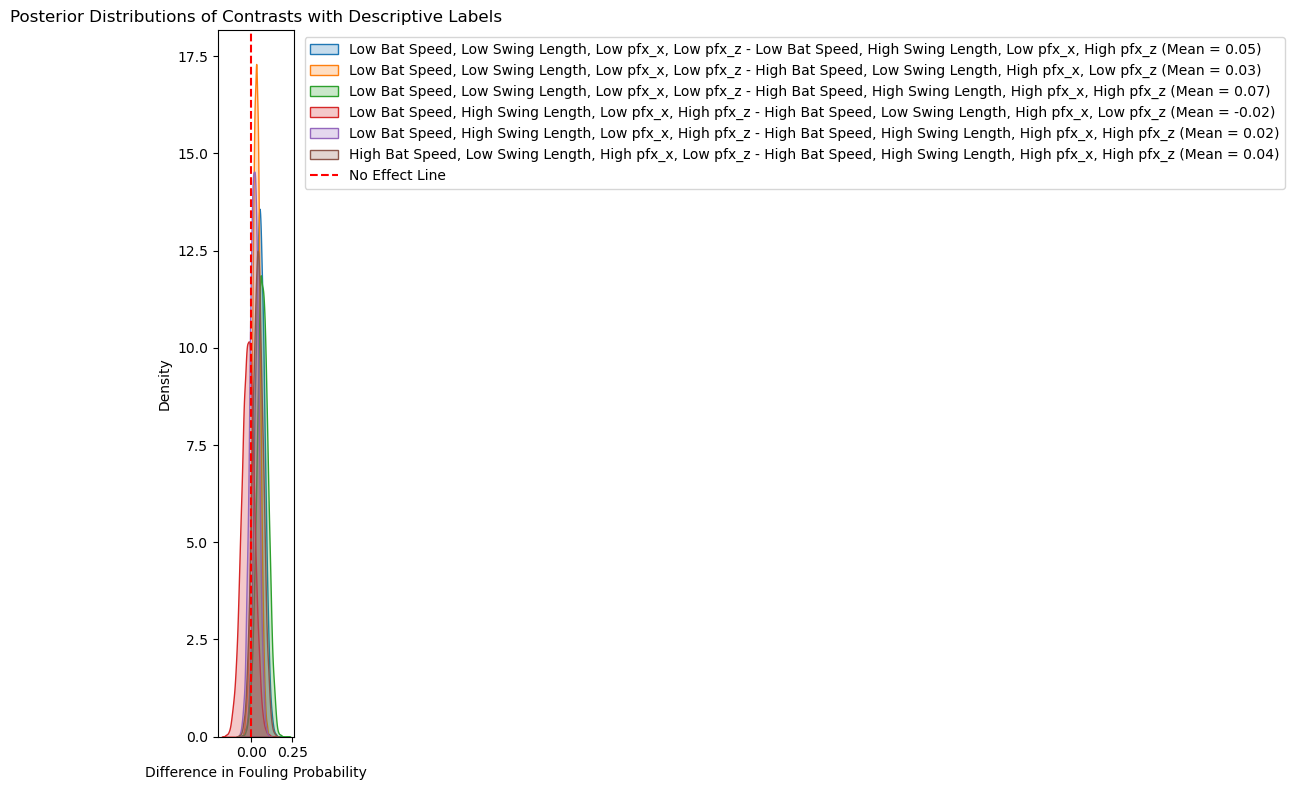

Contrast Summaries:
Low Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z - Low Bat Speed, High Swing Length, Low pfx_x, High pfx_z: Mean = 0.05, 95% CI = [-0.01, 0.11]
Low Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z - High Bat Speed, Low Swing Length, High pfx_x, Low pfx_z: Mean = 0.03, 95% CI = [-0.02, 0.07]
Low Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z - High Bat Speed, High Swing Length, High pfx_x, High pfx_z: Mean = 0.07, 95% CI = [0.00, 0.13]
Low Bat Speed, High Swing Length, Low pfx_x, High pfx_z - High Bat Speed, Low Swing Length, High pfx_x, Low pfx_z: Mean = -0.02, 95% CI = [-0.10, 0.05]
Low Bat Speed, High Swing Length, Low pfx_x, High pfx_z - High Bat Speed, High Swing Length, High pfx_x, High pfx_z: Mean = 0.02, 95% CI = [-0.04, 0.07]
High Bat Speed, Low Swing Length, High pfx_x, Low pfx_z - High Bat Speed, High Swing Length, High pfx_x, High pfx_z: Mean = 0.04, 95% CI = [-0.02, 0.10]


In [124]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit
import arviz as az


# Define descriptive labels for each combination
combination_labels = [
    "Low Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z",
    "Low Bat Speed, High Swing Length, Low pfx_x, High pfx_z",
    "High Bat Speed, Low Swing Length, High pfx_x, Low pfx_z",
    "High Bat Speed, High Swing Length, High pfx_x, High pfx_z"
]

# Dynamic Contrast Calculation
contrasts = {}
for i, (comb1_label, comb1_values) in enumerate(zip(combination_labels, combinations)):
    for j, (comb2_label, comb2_values) in enumerate(zip(combination_labels, combinations)):
        if i < j:
            contrast = expit(
                alpha_samples +
                beta_bat_speed_samples * comb1_values[0] +
                beta_swing_length_samples * comb1_values[1] +
                beta_pfx_x_samples * comb1_values[2] +
                beta_pfx_z_samples * comb1_values[3] +
                beta_interaction_samples * (comb1_values[0] * comb1_values[1])
            ) - expit(
                alpha_samples +
                beta_bat_speed_samples * comb2_values[0] +
                beta_swing_length_samples * comb2_values[1] +
                beta_pfx_x_samples * comb2_values[2] +
                beta_pfx_z_samples * comb2_values[3] +
                beta_interaction_samples * (comb2_values[0] * comb2_values[1])
            )
            contrast_label = f"{comb1_label} - {comb2_label}"
            contrasts[contrast_label] = contrast

# Plot Dynamic Contrasts with Descriptive Labels
plt.figure(figsize=(12, 8))
for contrast_name, contrast_values in contrasts.items():
    sns.kdeplot(contrast_values, label=f"{contrast_name} (Mean = {np.mean(contrast_values):.2f})", fill=True)
plt.title("Posterior Distributions of Contrasts with Descriptive Labels")
plt.xlabel("Difference in Fouling Probability")
plt.ylabel("Density")
plt.axvline(0, color="red", linestyle="--", label="No Effect Line")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig("posterior_distributions_with_labels.png")
plt.show()

# Display descriptive summaries for contrasts
print("Contrast Summaries:")
for contrast_name, contrast_values in contrasts.items():
    contrast_mean = np.mean(contrast_values)
    contrast_ci = np.percentile(contrast_values, [2.5, 97.5])
    print(f"{contrast_name}: Mean = {contrast_mean:.2f}, 95% CI = [{contrast_ci[0]:.2f}, {contrast_ci[1]:.2f}]")


In [125]:
# Extract posterior samples
alpha_samples = trace.posterior['alpha'].values.ravel()
beta_bat_speed_samples = trace.posterior['beta_bat_speed'].values.ravel()
beta_swing_length_samples = trace.posterior['beta_swing_length'].values.ravel()
beta_pfx_x_samples = trace.posterior['beta_pfx_x'].values.ravel()
beta_pfx_z_samples = trace.posterior['beta_pfx_z'].values.ravel()
beta_interaction_samples = trace.posterior['beta_interaction'].values.ravel()

# Define low and high conditions for standardized variables
low_bat_speed = -1  # Approx 1 SD below mean for standardized variables
high_bat_speed = 1  # Approx 1 SD above mean
low_swing_length = -1
high_swing_length = 1
low_pfx_x = -1
high_pfx_x = 1
low_pfx_z = -1
high_pfx_z = 1

# Define descriptive labels and combinations
combination_labels = [
    "Low Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z",
    "Low Bat Speed, Low Swing Length, Low pfx_x, High pfx_z",
    "Low Bat Speed, Low Swing Length, High pfx_x, Low pfx_z",
    "Low Bat Speed, Low Swing Length, High pfx_x, High pfx_z",
    "Low Bat Speed, High Swing Length, Low pfx_x, Low pfx_z",
    "Low Bat Speed, High Swing Length, Low pfx_x, High pfx_z",
    "Low Bat Speed, High Swing Length, High pfx_x, Low pfx_z",
    "Low Bat Speed, High Swing Length, High pfx_x, High pfx_z",
    "High Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z",
    "High Bat Speed, Low Swing Length, Low pfx_x, High pfx_z",
    "High Bat Speed, Low Swing Length, High pfx_x, Low pfx_z",
    "High Bat Speed, Low Swing Length, High pfx_x, High pfx_z",
    "High Bat Speed, High Swing Length, Low pfx_x, Low pfx_z",
    "High Bat Speed, High Swing Length, Low pfx_x, High pfx_z",
    "High Bat Speed, High Swing Length, High pfx_x, Low pfx_z",
    "High Bat Speed, High Swing Length, High pfx_x, High pfx_z"
]

combinations = [
    (low_bat_speed, low_swing_length, low_pfx_x, low_pfx_z),
    (low_bat_speed, low_swing_length, low_pfx_x, high_pfx_z),
    (low_bat_speed, low_swing_length, high_pfx_x, low_pfx_z),
    (low_bat_speed, low_swing_length, high_pfx_x, high_pfx_z),
    (low_bat_speed, high_swing_length, low_pfx_x, low_pfx_z),
    (low_bat_speed, high_swing_length, low_pfx_x, high_pfx_z),
    (low_bat_speed, high_swing_length, high_pfx_x, low_pfx_z),
    (low_bat_speed, high_swing_length, high_pfx_x, high_pfx_z),
    (high_bat_speed, low_swing_length, low_pfx_x, low_pfx_z),
    (high_bat_speed, low_swing_length, low_pfx_x, high_pfx_z),
    (high_bat_speed, low_swing_length, high_pfx_x, low_pfx_z),
    (high_bat_speed, low_swing_length, high_pfx_x, high_pfx_z),
    (high_bat_speed, high_swing_length, low_pfx_x, low_pfx_z),
    (high_bat_speed, high_swing_length, low_pfx_x, high_pfx_z),
    (high_bat_speed, high_swing_length, high_pfx_x, low_pfx_z),
    (high_bat_speed, high_swing_length, high_pfx_x, high_pfx_z)
]

# Calculate fouling probabilities for each combination
foul_probs = {}
for label, (bs, sl, px, pz) in zip(combination_labels, combinations):
    prob = expit(
        alpha_samples +
        beta_bat_speed_samples * bs +
        beta_swing_length_samples * sl +
        beta_pfx_x_samples * px +
        beta_pfx_z_samples * pz +
        beta_interaction_samples * (bs * sl)
    )
    mean_prob = np.mean(prob)
    ci = np.percentile(prob, [2.5, 97.5])
    foul_probs[label] = {"mean": mean_prob, "95% CI": ci}

# Print the fouling probabilities with their credible intervals
print("Fouling Probabilities:")
for label, values in foul_probs.items():
    print(f"{label}: Mean = {values['mean']:.2f}, 95% CI = [{values['95% CI'][0]:.2f}, {values['95% CI'][1]:.2f}]")


Fouling Probabilities:
Low Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z: Mean = 0.46, 95% CI = [0.43, 0.50]
Low Bat Speed, Low Swing Length, Low pfx_x, High pfx_z: Mean = 0.50, 95% CI = [0.48, 0.53]
Low Bat Speed, Low Swing Length, High pfx_x, Low pfx_z: Mean = 0.44, 95% CI = [0.41, 0.47]
Low Bat Speed, Low Swing Length, High pfx_x, High pfx_z: Mean = 0.48, 95% CI = [0.45, 0.52]
Low Bat Speed, High Swing Length, Low pfx_x, Low pfx_z: Mean = 0.37, 95% CI = [0.33, 0.40]
Low Bat Speed, High Swing Length, Low pfx_x, High pfx_z: Mean = 0.41, 95% CI = [0.37, 0.45]
Low Bat Speed, High Swing Length, High pfx_x, Low pfx_z: Mean = 0.35, 95% CI = [0.32, 0.38]
Low Bat Speed, High Swing Length, High pfx_x, High pfx_z: Mean = 0.39, 95% CI = [0.35, 0.43]
High Bat Speed, Low Swing Length, Low pfx_x, Low pfx_z: Mean = 0.45, 95% CI = [0.41, 0.50]
High Bat Speed, Low Swing Length, Low pfx_x, High pfx_z: Mean = 0.50, 95% CI = [0.46, 0.53]
High Bat Speed, Low Swing Length, High pfx_x, Low pfx_z: Mean 

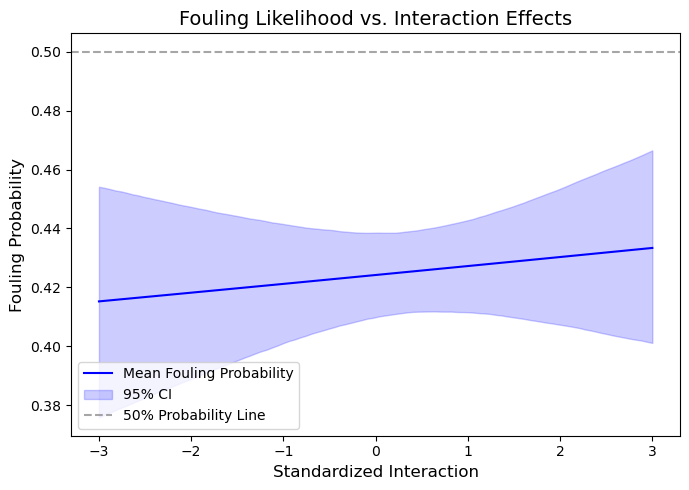

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# Generate a range for interaction (standardized range -3 to 3 SD)
interaction_range = np.linspace(-3, 3, 100)

# Calculate fouling probabilities for each interaction value
foul_probs = np.zeros((len(alpha_samples), len(interaction_range)))

# Loop through the interaction range
for i, interaction in enumerate(interaction_range):
    foul_probs[:, i] = expit(
        alpha_samples +
        beta_bat_speed_samples * data_subset['bat_speed'].mean() +
        beta_swing_length_samples * data_subset['swing_length'].mean() +
        beta_pfx_x_samples * data_subset['pfx_x'].mean() +
        beta_pfx_z_samples * data_subset['pfx_z'].mean() +
        beta_interaction_samples * interaction
    )

# Calculate the mean and 95% CI for fouling probabilities
foul_probs_mean = foul_probs.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs, 97.5, axis=0)

# Plot the probability curve
plt.figure(figsize=(7, 5))
plt.plot(interaction_range, foul_probs_mean, label="Mean Fouling Probability", color='blue')
plt.fill_between(interaction_range, foul_probs_lower, foul_probs_upper, color='blue', alpha=0.2, label="95% CI")
plt.title("Fouling Likelihood vs. Interaction Effects", fontsize=14)
plt.xlabel("Standardized Interaction", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label="50% Probability Line")
plt.legend()
plt.tight_layout()
plt.savefig('fouling_likelihood_vs_interaction_effects.png')  # Save the plot as a PNG
plt.show()



## Question 5: How do batter stance (stand) and pitcher throwing hand (p_throws) mediate the relationship between batter mechanics (bat_speed, swing_length) and the likelihood of fouling off a pitch

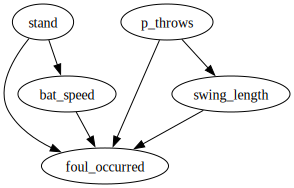

In [52]:
dag_mediation_game_situation = CausalGraphicalModel(
    nodes=["bat_speed", "swing_length", "stand", "p_throws", "foul_occurred"],
    edges=[
        ("bat_speed", "foul_occurred"),
        ("swing_length", "foul_occurred"),
        ("stand", "foul_occurred"),
        ("p_throws", "foul_occurred"),
        ("stand", "bat_speed"),
        ("p_throws", "swing_length")
    ]
)
dag_mediation_game_situation.draw()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [alpha, beta_bat_speed, beta_swing_length, beta_stand, beta_p_throws, beta_stand_bat_speed, beta_p_throws_swing_length]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 101 seconds.


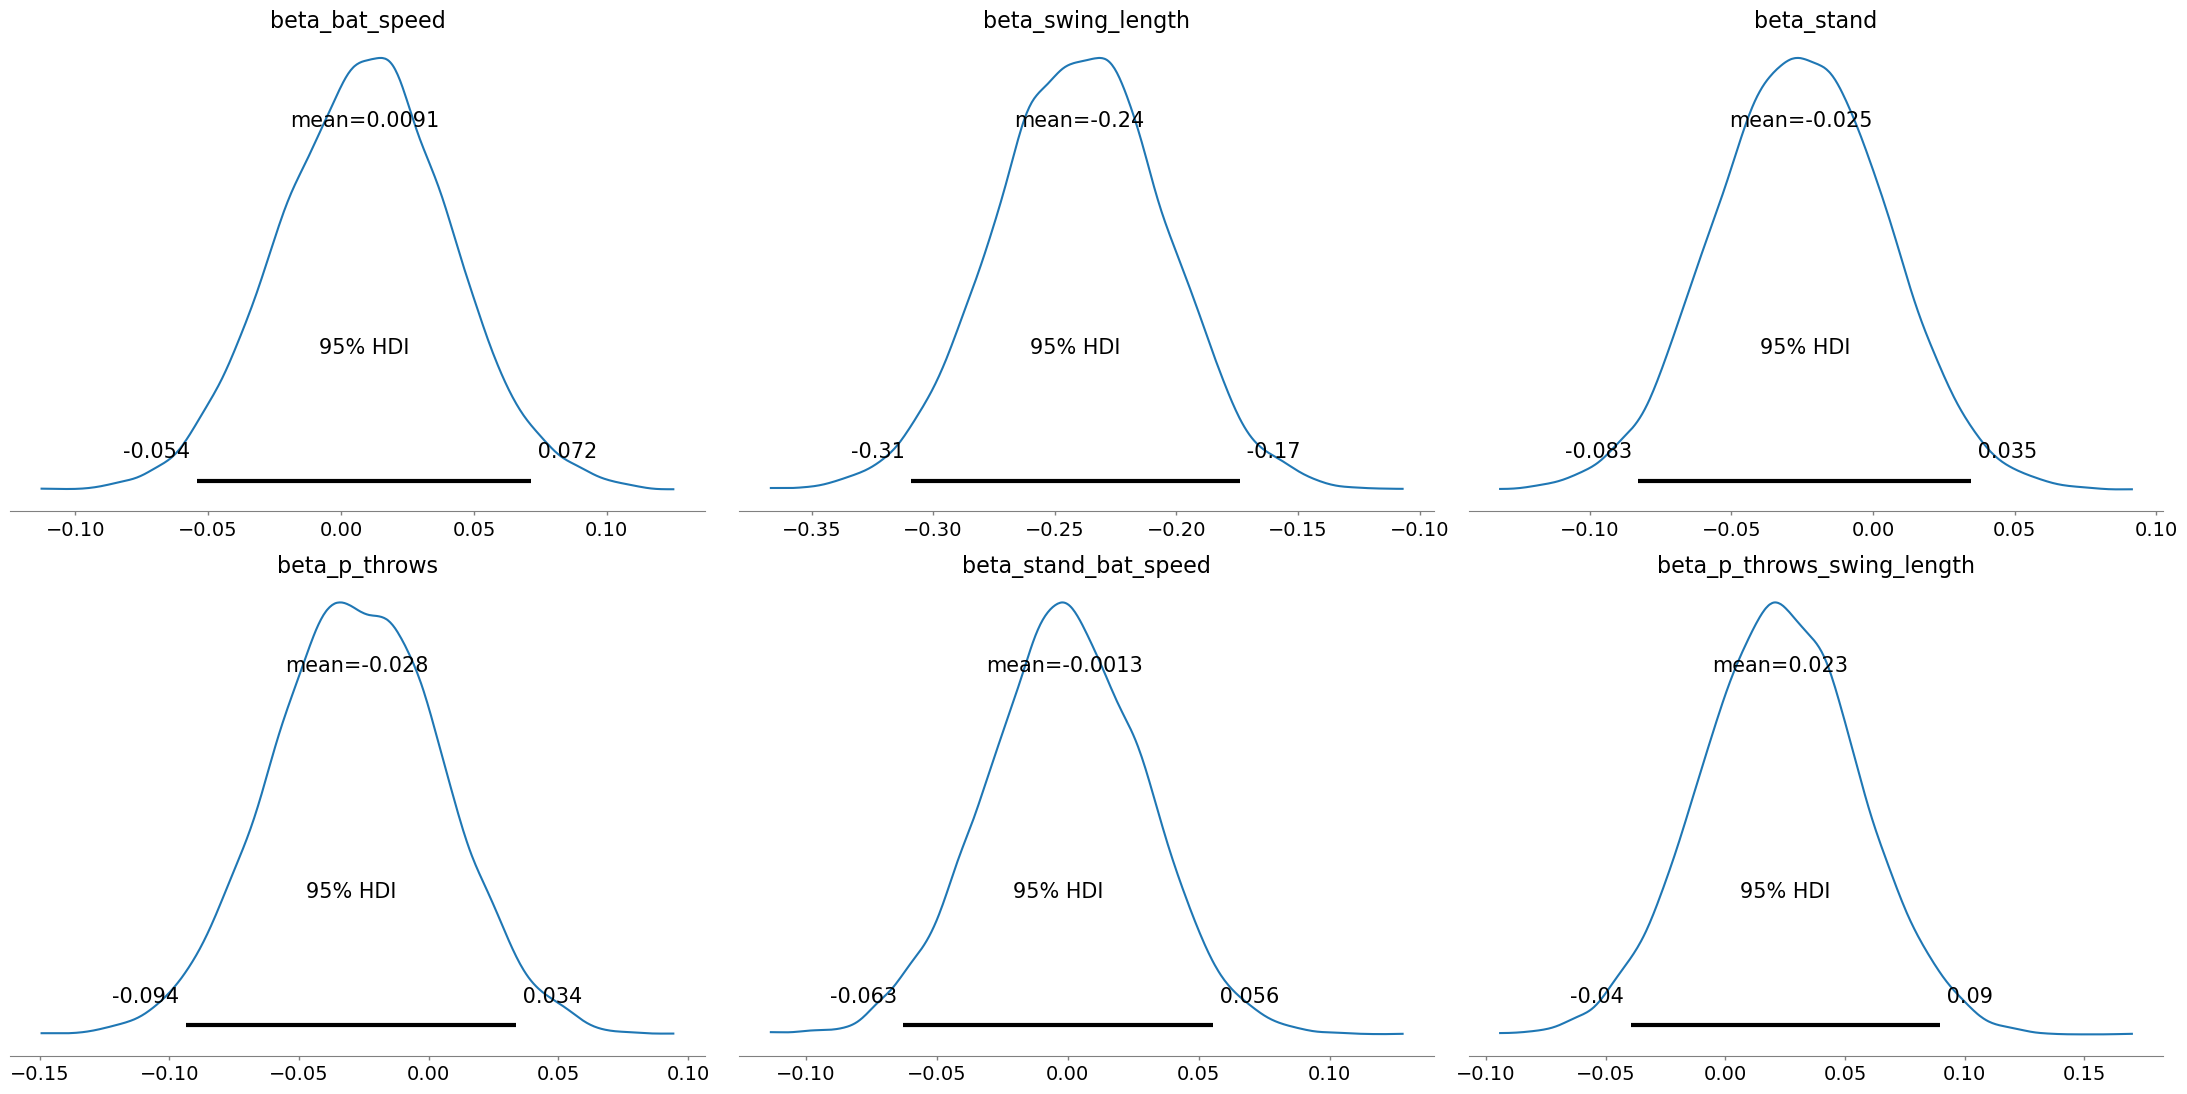

In [130]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit



# Define the Bayesian model
with pm.Model() as mediation_model:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=1)  # Intercept
    beta_bat_speed = pm.Normal("beta_bat_speed", mu=0, sigma=1)  # Bat Speed Effect
    beta_swing_length = pm.Normal("beta_swing_length", mu=0, sigma=1)  # Swing Length Effect
    beta_stand = pm.Normal("beta_stand", mu=0, sigma=1)  # Stand Effect
    beta_p_throws = pm.Normal("beta_p_throws", mu=0, sigma=1)  # P_throws Effect
    beta_stand_bat_speed = pm.Normal("beta_stand_bat_speed", mu=0, sigma=1)  # Mediation of Stand on Bat Speed
    beta_p_throws_swing_length = pm.Normal("beta_p_throws_swing_length", mu=0, sigma=1)  # Mediation of P_throws on Swing Length

    # Logistic regression formula
    logits = (
        alpha +
        beta_bat_speed * data_subset['bat_speed'] +
        beta_swing_length * data_subset['swing_length'] +
        beta_stand * data_subset['stand'] +
        beta_p_throws * data_subset['p_throws'] +
        beta_stand_bat_speed * (data_subset['stand'] * data_subset['bat_speed']) +
        beta_p_throws_swing_length * (data_subset['p_throws'] * data_subset['swing_length'])
    )
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))

    # Likelihood
    Y_obs = pm.Bernoulli("Y_obs", p=foul_prob, observed=data_subset['foul_occurred'])

    # Sampling
    trace = pm.sample(5000, chains=2, return_inferencedata=True)

# Summarize results
summary_stats = az.summary(trace, hdi_prob=0.95)
# print(summary_stats)

# Posterior analysis of direct and mediation effects
az.plot_posterior(trace, var_names=[
    "beta_bat_speed", "beta_swing_length", "beta_stand", "beta_p_throws",
    "beta_stand_bat_speed", "beta_p_throws_swing_length"
], hdi_prob=0.95)
plt.tight_layout()
plt.savefig("posterior_plot_mediation_model.png")
plt.show()


In [131]:
# Extract posterior samples
alpha_samples = trace.posterior['alpha'].values.ravel()
beta_bat_speed_samples = trace.posterior['beta_bat_speed'].values.ravel()
beta_swing_length_samples = trace.posterior['beta_swing_length'].values.ravel()
beta_stand_samples = trace.posterior['beta_stand'].values.ravel()
beta_p_throws_samples = trace.posterior['beta_p_throws'].values.ravel()
beta_stand_bat_speed_samples = trace.posterior['beta_stand_bat_speed'].values.ravel()
beta_p_throws_swing_length_samples = trace.posterior['beta_p_throws_swing_length'].values.ravel()


# Define standardized values for conditions
low_bat_speed = -1  # 1 SD below mean
high_bat_speed = 1  # 1 SD above mean
low_swing_length = -1
high_swing_length = 1

# Define all combinations of conditions
conditions = {
    "Low Bat Speed, Left Stand": (low_bat_speed, -1),
    "Low Bat Speed, Right Stand": (low_bat_speed, 1),
    "High Bat Speed, Left Stand": (high_bat_speed, -1),
    "High Bat Speed, Right Stand": (high_bat_speed, 1),
    "Low Swing Length, Left P_throws": (low_swing_length, -1),
    "Low Swing Length, Right P_throws": (low_swing_length, 1),
    "High Swing Length, Left P_throws": (high_swing_length, -1),
    "High Swing Length, Right P_throws": (high_swing_length, 1)
}


# Compute fouling probabilities for all conditions
foul_probs = {}
for condition, (value, indicator) in conditions.items():
    if "Bat Speed" in condition:
        prob = expit(
            alpha_samples +
            beta_bat_speed_samples * value +
            beta_stand_samples * indicator +
            beta_stand_bat_speed_samples * (value * indicator)
        )
    elif "Swing Length" in condition:
        prob = expit(
            alpha_samples +
            beta_swing_length_samples * value +
            beta_p_throws_samples * indicator +
            beta_p_throws_swing_length_samples * (value * indicator)
        )
    mean_prob = np.mean(prob)
    ci = np.percentile(prob, [2.5, 97.5])
    foul_probs[condition] = {"mean": mean_prob, "95% CI": ci}



In [132]:
# Print fouling probabilities
print("Fouling Probabilities Across Conditions:")
for condition, stats in foul_probs.items():
    print(f"{condition}: Mean = {stats['mean']:.2f}, 95% CI = [{stats['95% CI'][0]:.2f}, {stats['95% CI'][1]:.2f}]")



Fouling Probabilities Across Conditions:
Low Bat Speed, Left Stand: Mean = 0.43, 95% CI = [0.40, 0.47]
Low Bat Speed, Right Stand: Mean = 0.42, 95% CI = [0.39, 0.45]
High Bat Speed, Left Stand: Mean = 0.44, 95% CI = [0.40, 0.47]
High Bat Speed, Right Stand: Mean = 0.42, 95% CI = [0.40, 0.45]
Low Swing Length, Left P_throws: Mean = 0.50, 95% CI = [0.46, 0.54]
Low Swing Length, Right P_throws: Mean = 0.48, 95% CI = [0.45, 0.50]
High Swing Length, Left P_throws: Mean = 0.37, 95% CI = [0.33, 0.41]
High Swing Length, Right P_throws: Mean = 0.37, 95% CI = [0.35, 0.39]


In [134]:
# Compute contrasts between conditions
contrasts = {}
conditions_list = list(conditions.keys())
for i in range(len(conditions_list)):
    for j in range(i + 1, len(conditions_list)):
        cond1 = conditions_list[i]
        cond2 = conditions_list[j]
        prob_diff = (
            expit(alpha_samples + beta_bat_speed_samples * conditions[cond1][0] + beta_stand_samples * conditions[cond1][1]) -
            expit(alpha_samples + beta_bat_speed_samples * conditions[cond2][0] + beta_stand_samples * conditions[cond2][1])
        )
        mean_diff = np.mean(prob_diff)
        ci_diff = np.percentile(prob_diff, [2.5, 97.5])
        contrasts[f"{cond1} - {cond2}"] = {"mean_diff": mean_diff, "95% CI": ci_diff}

# Print contrasts
print("\nContrasts Between Conditions:")
for contrast, stats in contrasts.items():
    print(f"{contrast}: Mean Difference = {stats['mean_diff']:.2f}, 95% CI = [{stats['95% CI'][0]:.2f}, {stats['95% CI'][1]:.2f}]")


Contrasts Between Conditions:
Low Bat Speed, Left Stand - Low Bat Speed, Right Stand: Mean Difference = 0.01, 95% CI = [-0.02, 0.04]
Low Bat Speed, Left Stand - High Bat Speed, Left Stand: Mean Difference = -0.00, 95% CI = [-0.04, 0.03]
Low Bat Speed, Left Stand - High Bat Speed, Right Stand: Mean Difference = 0.01, 95% CI = [-0.03, 0.05]
Low Bat Speed, Left Stand - Low Swing Length, Left P_throws: Mean Difference = 0.00, 95% CI = [0.00, 0.00]
Low Bat Speed, Left Stand - Low Swing Length, Right P_throws: Mean Difference = 0.01, 95% CI = [-0.02, 0.04]
Low Bat Speed, Left Stand - High Swing Length, Left P_throws: Mean Difference = -0.00, 95% CI = [-0.04, 0.03]
Low Bat Speed, Left Stand - High Swing Length, Right P_throws: Mean Difference = 0.01, 95% CI = [-0.03, 0.05]
Low Bat Speed, Right Stand - High Bat Speed, Left Stand: Mean Difference = -0.02, 95% CI = [-0.06, 0.03]
Low Bat Speed, Right Stand - High Bat Speed, Right Stand: Mean Difference = -0.00, 95% CI = [-0.04, 0.03]
Low Bat Spe

                           Condition  Mean Probability  95% CI Lower  \
0          Low Bat Speed, Left Stand          0.432700      0.404520   
1         Low Bat Speed, Right Stand          0.420321      0.395596   
2         High Bat Speed, Left Stand          0.437155      0.409348   
3        High Bat Speed, Right Stand          0.424744      0.400817   
4    Low Swing Length, Left P_throws          0.495116      0.463827   
5   Low Swing Length, Right P_throws          0.481212      0.458149   
6   High Swing Length, Left P_throws          0.377826      0.346504   
7  High Swing Length, Right P_throws          0.364769      0.343132   

   95% CI Upper  
0      0.461705  
1      0.445575  
2      0.465124  
3      0.448897  
4      0.526423  
5      0.504730  
6      0.410393  
7      0.386818  


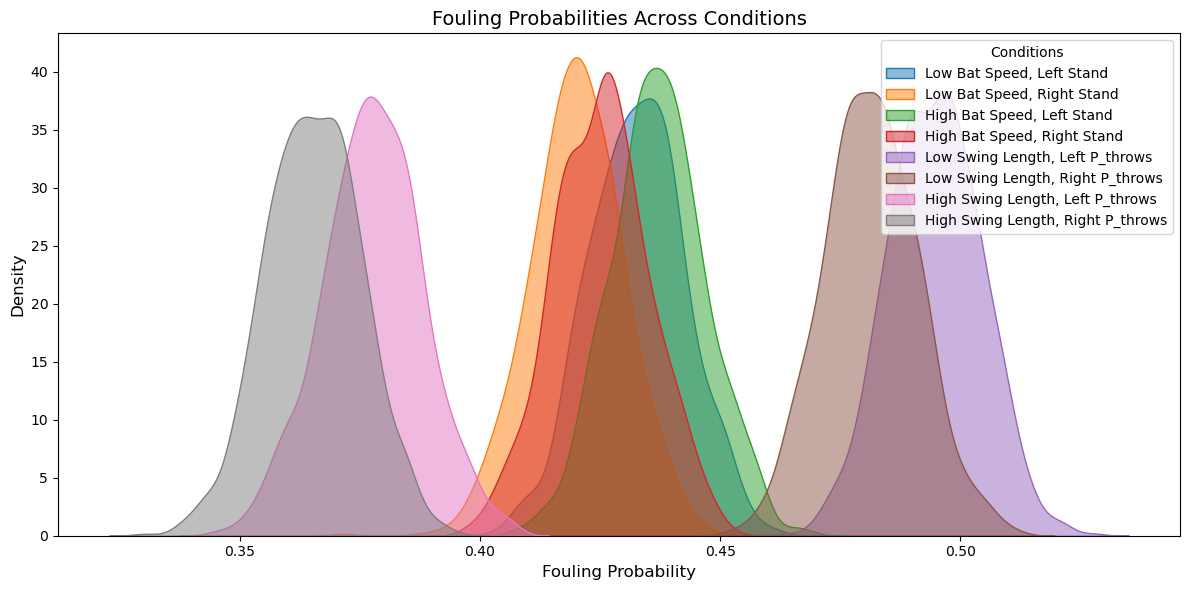

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import expit


low_bat_speed = -1
high_bat_speed = 1
low_swing_length = -1
high_swing_length = 1

# Define conditions
conditions = {
    "Low Bat Speed, Left Stand": (low_bat_speed, -1),
    "Low Bat Speed, Right Stand": (low_bat_speed, 1),
    "High Bat Speed, Left Stand": (high_bat_speed, -1),
    "High Bat Speed, Right Stand": (high_bat_speed, 1),
    "Low Swing Length, Left P_throws": (low_swing_length, -1),
    "Low Swing Length, Right P_throws": (low_swing_length, 1),
    "High Swing Length, Left P_throws": (high_swing_length, -1),
    "High Swing Length, Right P_throws": (high_swing_length, 1)
}

# Calculate fouling probabilities for each condition
results = []
for condition, (mechanic, factor) in conditions.items():
    # For bat speed and stand
    if "Bat Speed" in condition:
        probs = expit(alpha_samples + beta_bat_speed_samples * mechanic + beta_stand_samples * factor)
    # For swing length and p_throws
    elif "Swing Length" in condition:
        probs = expit(alpha_samples + beta_swing_length_samples * mechanic + beta_p_throws_samples * factor)
    else:
        continue
    
    # Calculate mean and credible intervals
    mean_prob = np.mean(probs)
    ci_lower, ci_upper = np.percentile(probs, [2.5, 97.5])
    results.append({"Condition": condition, "Mean Probability": mean_prob, "95% CI Lower": ci_lower, "95% CI Upper": ci_upper})

# Convert results to a DataFrame for tabular presentation
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

# Save the results table to a CSV file 
results_df.to_csv("fouling_probabilities_conditions.csv", index=False)

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the DataFrame `results_df` exists and has the required data
if not results_df.empty:
    plt.figure(figsize=(12, 6))

    # Iterate over each condition to plot its distribution
    for _, row in results_df.iterrows():
        sns.kdeplot(
            np.random.normal(row["Mean Probability"], 0.01, 1000),  # Simulate a distribution for visualization
            label=row["Condition"],
            fill=True,
            alpha=0.5
        )

    # Add title, labels, and legend
    plt.title("Fouling Probabilities Across Conditions", fontsize=14)
    plt.xlabel("Fouling Probability", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(loc="upper right", title="Conditions", fontsize=10)
    plt.tight_layout()

    # Save and show the plot
    plt.savefig("fouling_probabilities_conditions_corrected.png")
    plt.show()
else:
    print("No data available to plot!")


Low Bat Speed, Left Stand: Mean = 0.43, 95% CI = [0.40, 0.46]
Low Bat Speed, Right Stand: Mean = 0.42, 95% CI = [0.40, 0.45]
High Bat Speed, Left Stand: Mean = 0.44, 95% CI = [0.41, 0.47]
High Bat Speed, Right Stand: Mean = 0.42, 95% CI = [0.40, 0.45]
Low Swing Length, Left P_throws: Mean = 0.50, 95% CI = [0.46, 0.53]
Low Swing Length, Right P_throws: Mean = 0.48, 95% CI = [0.46, 0.50]
High Swing Length, Left P_throws: Mean = 0.38, 95% CI = [0.35, 0.41]
High Swing Length, Right P_throws: Mean = 0.36, 95% CI = [0.34, 0.39]


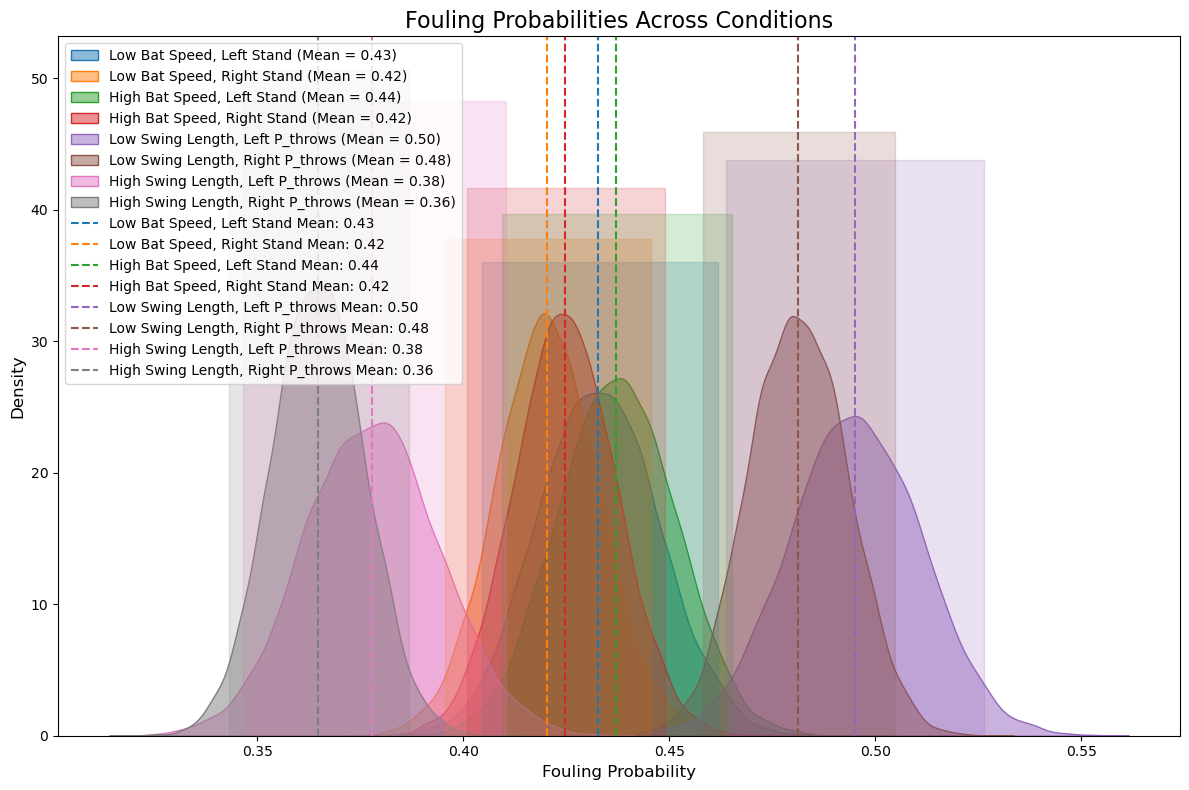

In [145]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.special import expit


# Define conditions for fouling probabilities
conditions = {
    "Low Bat Speed, Left Stand": (-1, -1, None, None),
    "Low Bat Speed, Right Stand": (-1, 1, None, None),
    "High Bat Speed, Left Stand": (1, -1, None, None),
    "High Bat Speed, Right Stand": (1, 1, None, None),
    "Low Swing Length, Left P_throws": (None, None, -1, -1),
    "Low Swing Length, Right P_throws": (None, None, -1, 1),
    "High Swing Length, Left P_throws": (None, None, 1, -1),
    "High Swing Length, Right P_throws": (None, None, 1, 1),
}

foul_probs = {}
for condition, (bat_speed, stand, swing_length, p_throws) in conditions.items():
    foul_probs[condition] = expit(
        alpha_samples
        + (beta_bat_speed_samples * bat_speed if bat_speed is not None else 0)
        + (beta_stand_samples * stand if stand is not None else 0)
        + (beta_swing_length_samples * swing_length if swing_length is not None else 0)
        + (beta_p_throws_samples * p_throws if p_throws is not None else 0)
    )

# Calculate means and credible intervals for each condition
results = {}
for condition, probs in foul_probs.items():
    mean_prob = np.mean(probs)
    ci_lower, ci_upper = np.percentile(probs, [2.5, 97.5])
    results[condition] = (mean_prob, ci_lower, ci_upper)

# Print results
for condition, (mean_prob, ci_lower, ci_upper) in results.items():
    print(f"{condition}: Mean = {mean_prob:.2f}, 95% CI = [{ci_lower:.2f}, {ci_upper:.2f}]")

# Plot fouling probabilities for each condition
plt.figure(figsize=(12, 8))
colors = sns.color_palette("tab10", len(conditions))

for i, (condition, probs) in enumerate(foul_probs.items()):
    sns.kdeplot(probs, color=colors[i], label=f"{condition} (Mean = {np.mean(probs):.2f})", fill=True, alpha=0.5)

plt.title("Fouling Probabilities Across Conditions", fontsize=16)
plt.xlabel("Fouling Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)

# Annotate mean and CI
for i, (condition, (mean_prob, ci_lower, ci_upper)) in enumerate(results.items()):
    plt.axvline(mean_prob, color=colors[i], linestyle="--", label=f"{condition} Mean: {mean_prob:.2f}")
    plt.fill_betweenx(
        [0, plt.ylim()[1]],
        ci_lower,
        ci_upper,
        color=colors[i],
        alpha=0.2,
    )

plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.savefig("Fouling_Probabilities_Across_Conditions.png")
plt.show()


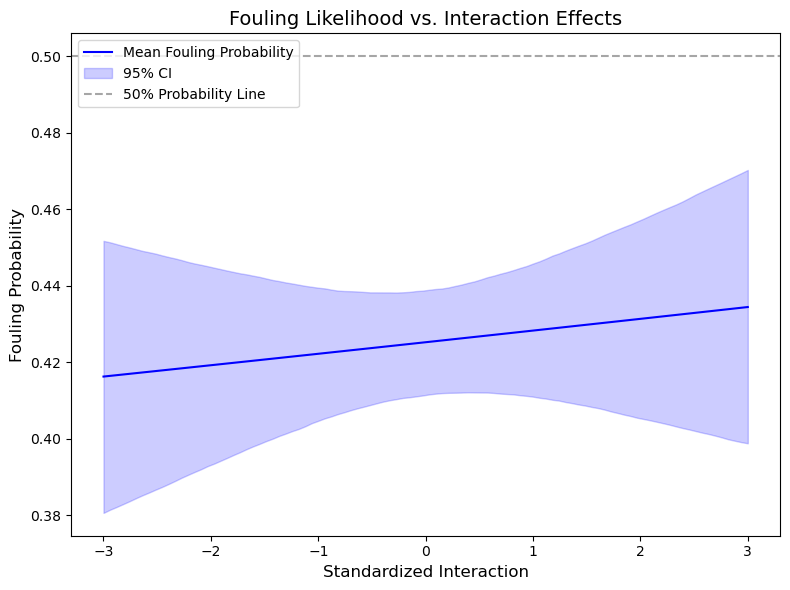

Interaction Range Summary:
Interaction: -3.00, Mean Probability: 0.42, 95% CI: [0.38, 0.45]
Interaction: -2.39, Mean Probability: 0.42, 95% CI: [0.38, 0.45]
Interaction: -1.79, Mean Probability: 0.42, 95% CI: [0.38, 0.45]
Interaction: -1.18, Mean Probability: 0.42, 95% CI: [0.38, 0.45]
Interaction: -0.58, Mean Probability: 0.42, 95% CI: [0.38, 0.45]
Interaction: 0.03, Mean Probability: 0.42, 95% CI: [0.38, 0.45]
Interaction: 0.64, Mean Probability: 0.42, 95% CI: [0.39, 0.45]
Interaction: 1.24, Mean Probability: 0.42, 95% CI: [0.39, 0.45]
Interaction: 1.85, Mean Probability: 0.42, 95% CI: [0.39, 0.45]
Interaction: 2.45, Mean Probability: 0.42, 95% CI: [0.39, 0.45]


In [149]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit

# Define the range for interactions (standardized range from -3 to 3 SD)
interaction_range = np.linspace(-3, 3, 100)


# Initialize array for storing fouling probabilities across the interaction range
foul_probs = np.zeros((len(alpha_samples), len(interaction_range)))

# Iterate through the interaction range to calculate fouling probabilities
for i, interaction in enumerate(interaction_range):
    foul_probs[:, i] = expit(
        alpha_samples
        + beta_bat_speed_samples * data_subset['bat_speed'].mean()
        + beta_swing_length_samples * data_subset['swing_length'].mean()
        + beta_stand_samples * data_subset['stand'].mean()  # Average stand effect
        + beta_p_throws_samples * data_subset['p_throws'].mean()  # Average p_throws effect
        + beta_interaction_samples * interaction  # Interaction effect
    )

# Calculate mean and 95% credible intervals for fouling probabilities
foul_probs_mean = foul_probs.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs, 97.5, axis=0)

# Plot the fouling likelihood curve across the interaction range
plt.figure(figsize=(8, 6))
plt.plot(interaction_range, foul_probs_mean, label="Mean Fouling Probability", color='blue')
plt.fill_between(interaction_range, foul_probs_lower, foul_probs_upper, color='blue', alpha=0.2, label="95% CI")
plt.title("Fouling Likelihood vs. Interaction Effects", fontsize=14)
plt.xlabel("Standardized Interaction", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7, label="50% Probability Line")
plt.legend(loc='upper left', fontsize=10)
plt.tight_layout()
plt.savefig('fouling_likelihood_vs_interaction.png')
plt.show()

# Summary of results
print("Interaction Range Summary:")
for i, interaction in enumerate(interaction_range[::10]):  # Print every 10th interaction value
    print(f"Interaction: {interaction:.2f}, Mean Probability: {foul_probs_mean[i]:.2f}, "
          f"95% CI: [{foul_probs_lower[i]:.2f}, {foul_probs_upper[i]:.2f}]")


## Question 6: Do pitch characteristics (e.g., release speed, movement, and location) mediate the relationship between batter mechanics and the likelihood of fouling off a pitch?

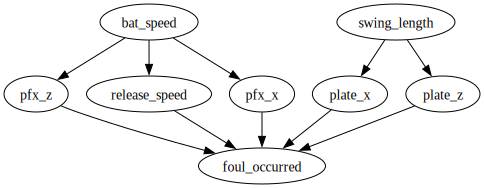

In [57]:
dag_mediated_by_pitch = CausalGraphicalModel(
    nodes=["bat_speed", "swing_length", "release_speed", "pfx_x", "pfx_z", "plate_x", "plate_z", "foul_occurred"],
    edges=[
        # Batter mechanics to pitch characteristics
        ("bat_speed", "release_speed"),
        ("bat_speed", "pfx_x"),
        ("bat_speed", "pfx_z"),
        ("swing_length", "plate_x"),
        ("swing_length", "plate_z"),
        
        # Pitch characteristics to outcome
        ("release_speed", "foul_occurred"),
        ("pfx_x", "foul_occurred"),
        ("pfx_z", "foul_occurred"),
        ("plate_x", "foul_occurred"),
        ("plate_z", "foul_occurred")
    ]
)
dag_mediated_by_pitch.draw()


This DAG explores how bat speed and swing length influence fouling through the mediating effects of pitch velocity, movement, and location.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_bat_speed, beta_swing_length, beta_release_speed, beta_pfx_x, beta_pfx_z, beta_plate_x, beta_plate_z, alpha_release_speed, alpha_pfx_x, alpha_pfx_z, alpha_plate_x, alpha_plate_z]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 208 seconds.


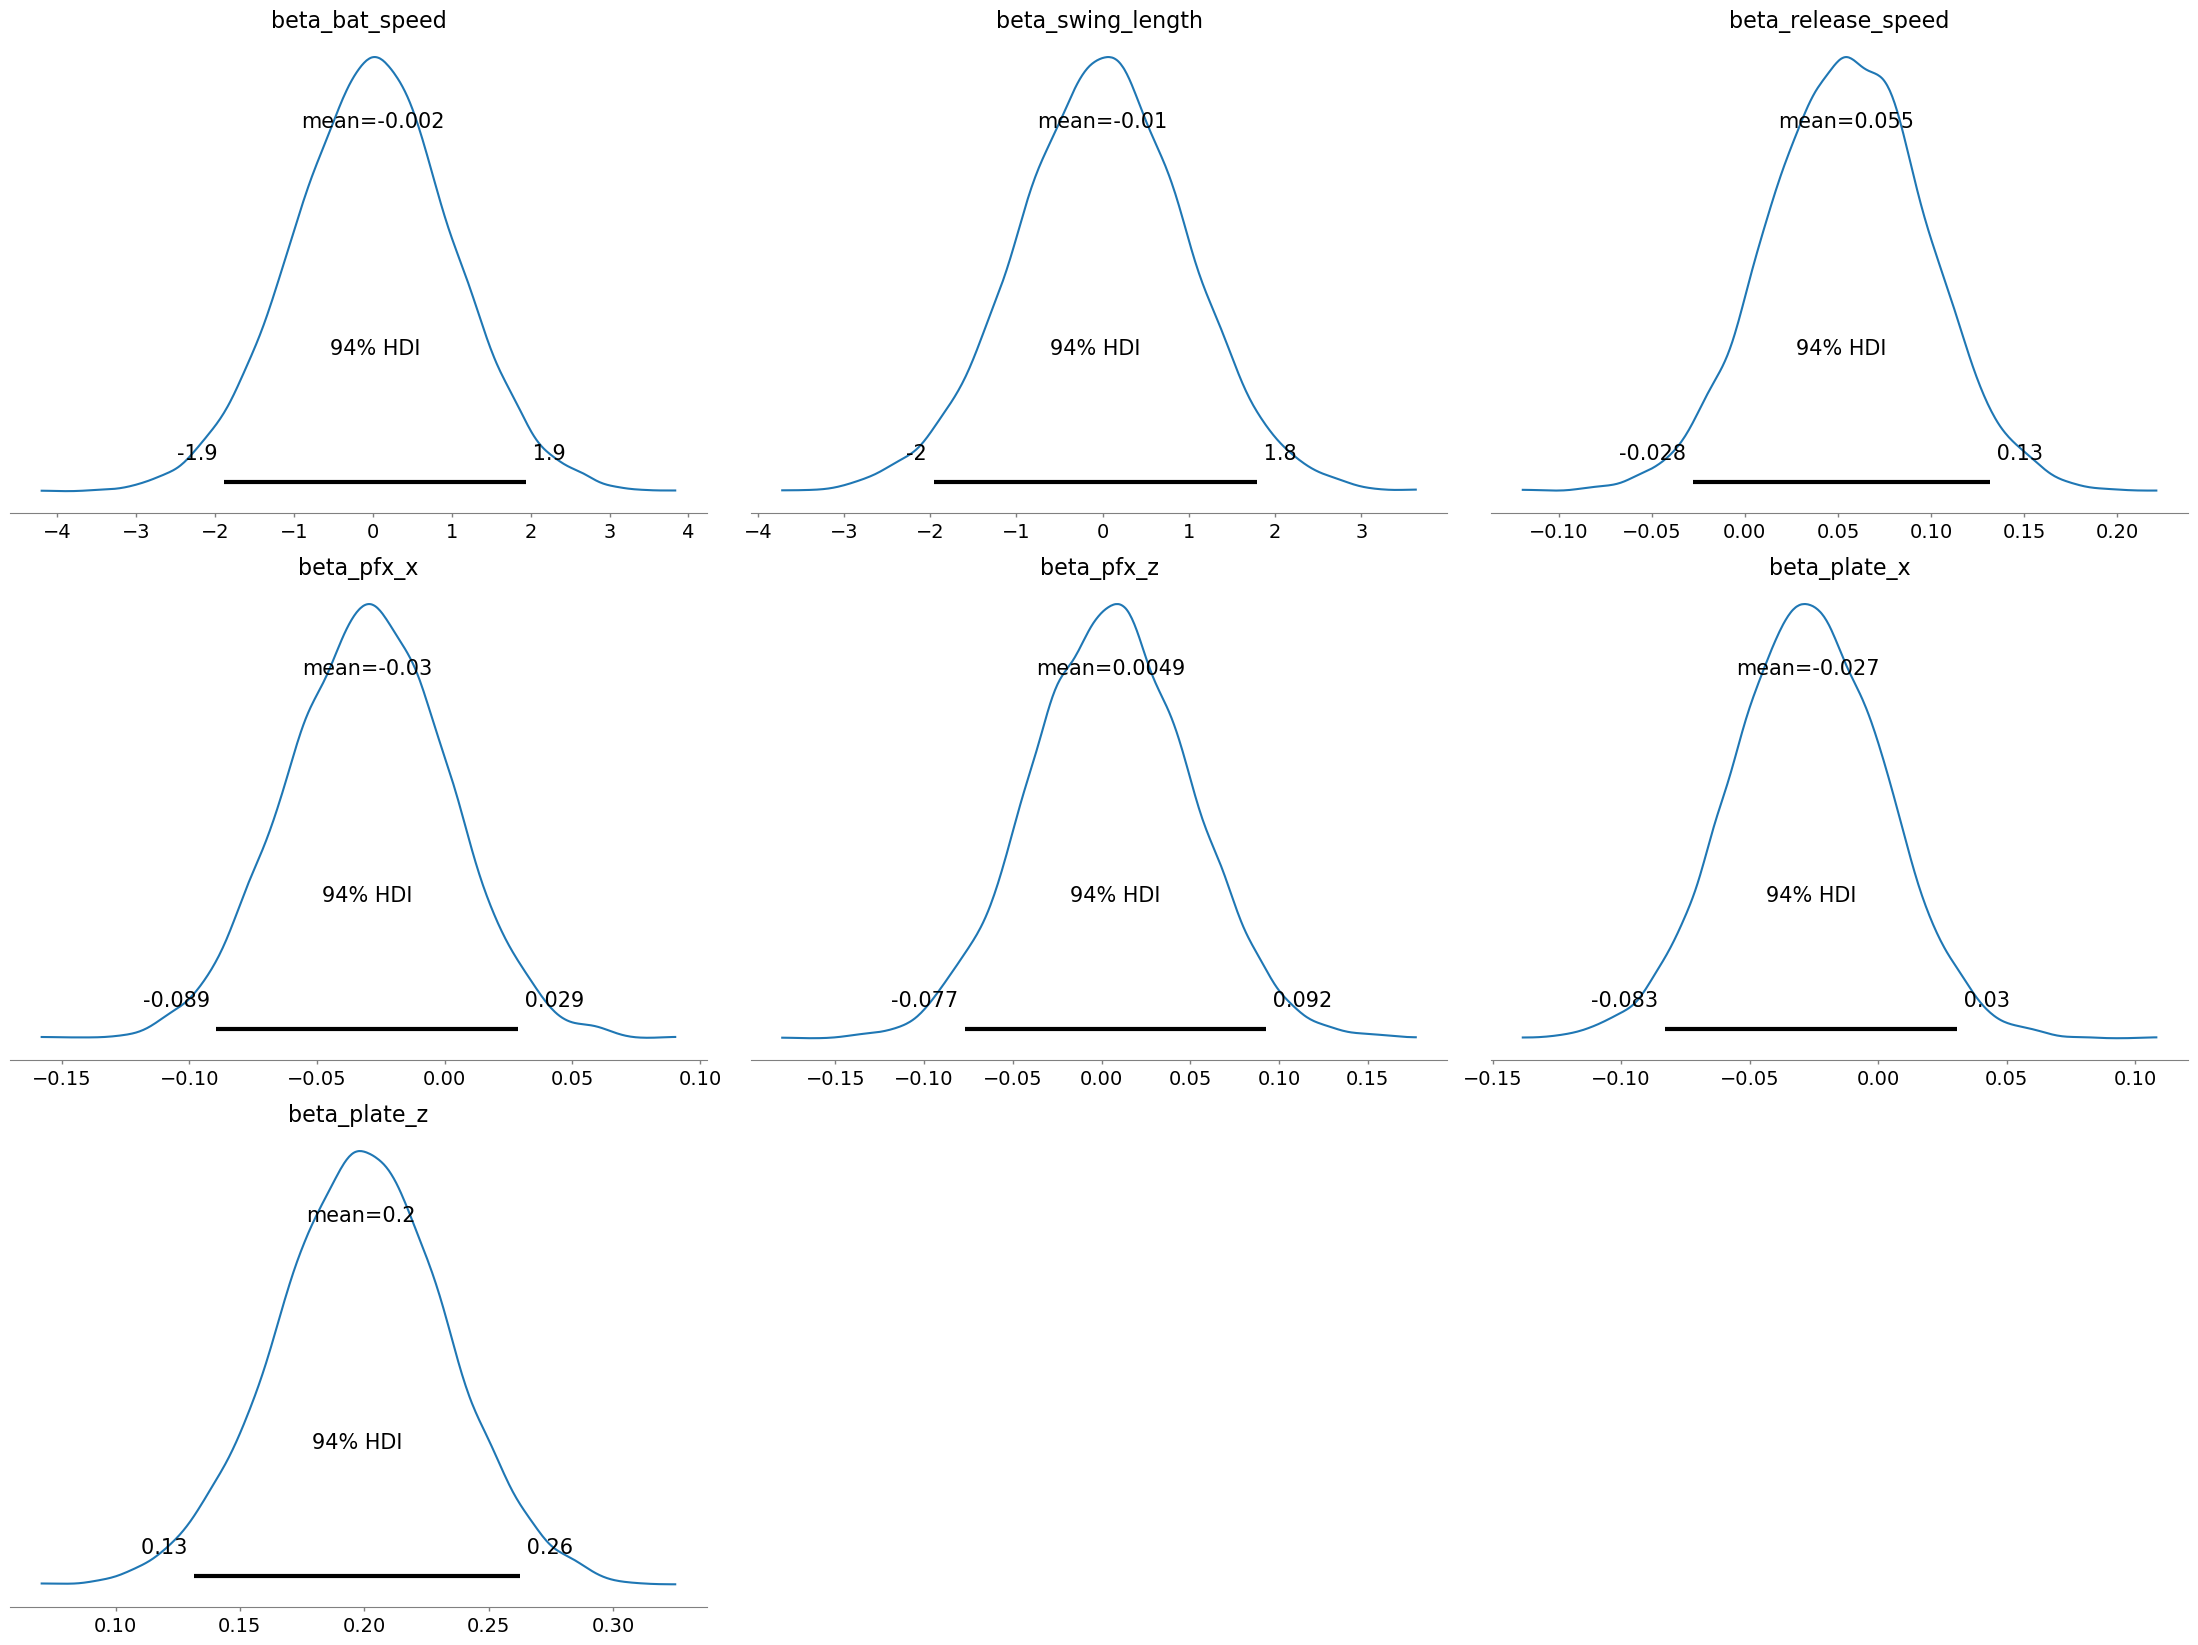

In [153]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit


# Bayesian Mediation Model
with pm.Model() as mediation_model:
    # Priors for batter mechanics effects
    beta_bat_speed = pm.Normal("beta_bat_speed", mu=0, sigma=1)
    beta_swing_length = pm.Normal("beta_swing_length", mu=0, sigma=1)
    
    # Priors for pitch characteristics (mediators)
    beta_release_speed = pm.Normal("beta_release_speed", mu=0, sigma=1)
    beta_pfx_x = pm.Normal("beta_pfx_x", mu=0, sigma=1)
    beta_pfx_z = pm.Normal("beta_pfx_z", mu=0, sigma=1)
    beta_plate_x = pm.Normal("beta_plate_x", mu=0, sigma=1)
    beta_plate_z = pm.Normal("beta_plate_z", mu=0, sigma=1)
    
    # Priors for mediators influenced by batter mechanics
    alpha_release_speed = pm.Normal("alpha_release_speed", mu=0, sigma=1)
    alpha_pfx_x = pm.Normal("alpha_pfx_x", mu=0, sigma=1)
    alpha_pfx_z = pm.Normal("alpha_pfx_z", mu=0, sigma=1)
    alpha_plate_x = pm.Normal("alpha_plate_x", mu=0, sigma=1)
    alpha_plate_z = pm.Normal("alpha_plate_z", mu=0, sigma=1)
    
    # Mediation paths
    release_speed = pm.Normal(
        "release_speed",
        mu=alpha_release_speed * data_subset['bat_speed'],
        sigma=0.5,
        observed=data_subset["release_speed"],
    )
    pfx_x = pm.Normal(
        "pfx_x",
        mu=alpha_pfx_x * data_subset['bat_speed'],
        sigma=0.5,
        observed=data_subset["pfx_x"],
    )
    pfx_z = pm.Normal(
        "pfx_z",
        mu=alpha_pfx_z * data_subset['swing_length'],
        sigma=0.5,
        observed=data_subset["pfx_z"],
    )
    plate_x = pm.Normal(
        "plate_x",
        mu=alpha_plate_x * data_subset['swing_length'],
        sigma=0.5,
        observed=data_subset["plate_x"],
    )
    plate_z = pm.Normal(
        "plate_z",
        mu=alpha_plate_z * data_subset['swing_length'],
        sigma=0.5,
        observed=data_subset["plate_z"],
    )
    
    # Foul occurrence likelihood
    logits = (
        beta_release_speed * release_speed
        + beta_pfx_x * pfx_x
        + beta_pfx_z * pfx_z
        + beta_plate_x * plate_x
        + beta_plate_z * plate_z
    )
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))
    foul_occurred = pm.Bernoulli("foul_occurred", p=foul_prob, observed=data_subset["foul_occurred"])
    
    # Sampling
    trace = pm.sample(5000, tune=1000, cores=2, return_inferencedata=True)

# Summarize Results
summary = az.summary(trace, hdi_prob=0.95)
# print(summary)

# Plot Posterior Distributions
az.plot_posterior(trace, var_names=[
    "beta_bat_speed", "beta_swing_length",
    "beta_release_speed", "beta_pfx_x", "beta_pfx_z", "beta_plate_x", "beta_plate_z"
])
plt.tight_layout()
plt.savefig('Posterior Bayesian Mediation Model.png')
plt.show()



In [154]:
# Mediation Effects
mediation_effects = {
    "Release Speed": trace.posterior["beta_release_speed"].mean().item(),
    "Pfx_x": trace.posterior["beta_pfx_x"].mean().item(),
    "Pfx_z": trace.posterior["beta_pfx_z"].mean().item(),
    "Plate_x": trace.posterior["beta_plate_x"].mean().item(),
    "Plate_z": trace.posterior["beta_plate_z"].mean().item(),
}
print("Mediation Effects:", mediation_effects)


Mediation Effects: {'Release Speed': 0.05454160940761266, 'Pfx_x': -0.030443323809180203, 'Pfx_z': 0.004912287854653217, 'Plate_x': -0.027465754146772416, 'Plate_z': 0.1987127927374327}


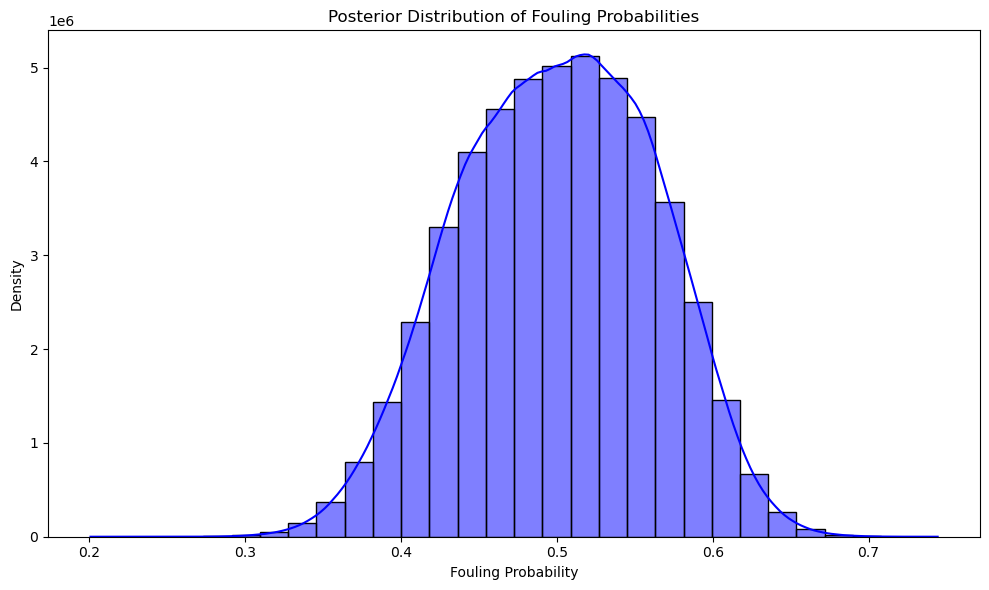

In [155]:
#  Fouling Probabilities
foul_probs = trace.posterior["foul_prob"].values.flatten()

# Plot fouling probabilities
plt.figure(figsize=(10, 6))
sns.histplot(foul_probs, kde=True, bins=30, color="blue")
plt.title("Posterior Distribution of Fouling Probabilities")
plt.xlabel("Fouling Probability")
plt.ylabel("Density")
plt.tight_layout()
plt.savefig("posterior_fouling_probabilities.png")
plt.show()



Contrasts Between Conditions:
Low Bat Speed - High Bat Speed: Mean Difference = -0.02, 95% CI = [-0.08, 0.03]
Low Bat Speed - Low Swing Length: Mean Difference = -0.10, 95% CI = [-0.14, -0.06]
Low Bat Speed - High Swing Length: Mean Difference = 0.08, 95% CI = [0.05, 0.10]
High Bat Speed - Low Swing Length: Mean Difference = -0.08, 95% CI = [-0.10, -0.05]
High Bat Speed - High Swing Length: Mean Difference = 0.10, 95% CI = [0.06, 0.14]
Low Swing Length - High Swing Length: Mean Difference = 0.18, 95% CI = [0.13, 0.22]


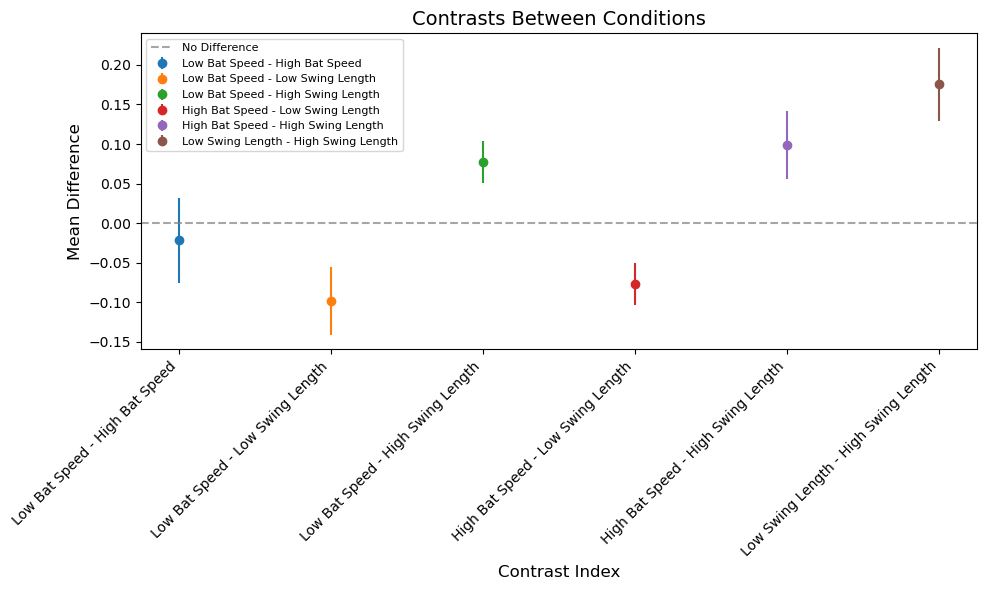

In [159]:
# extract posterior samples from the mediation model
alpha_release_speed_samples = trace.posterior["alpha_release_speed"].values.flatten()
alpha_pfx_x_samples = trace.posterior["alpha_pfx_x"].values.flatten()
alpha_pfx_z_samples = trace.posterior["alpha_pfx_z"].values.flatten()
alpha_plate_x_samples = trace.posterior["alpha_plate_x"].values.flatten()
alpha_plate_z_samples = trace.posterior["alpha_plate_z"].values.flatten()

beta_release_speed_samples = trace.posterior["beta_release_speed"].values.flatten()
beta_pfx_x_samples = trace.posterior["beta_pfx_x"].values.flatten()
beta_pfx_z_samples = trace.posterior["beta_pfx_z"].values.flatten()
beta_plate_x_samples = trace.posterior["beta_plate_x"].values.flatten()
beta_plate_z_samples = trace.posterior["beta_plate_z"].values.flatten()

# Define conditions for contrasts
conditions = {
    "Low Bat Speed": -1,
    "High Bat Speed": 1,
    "Low Swing Length": -1,
    "High Swing Length": 1
}

# Calculate fouling probabilities for each condition
foul_probs = {}
for condition, value in conditions.items():
    if "Bat Speed" in condition:
        probs = expit(
            alpha_release_speed_samples * value
            + beta_release_speed_samples * value
            + beta_pfx_x_samples * value
            + beta_pfx_z_samples * value
        )
    elif "Swing Length" in condition:
        probs = expit(
            alpha_plate_x_samples * value
            + alpha_plate_z_samples * value
            + beta_plate_x_samples * value
            + beta_plate_z_samples * value
        )
    foul_probs[condition] = probs

# Compute contrasts between conditions
contrasts = {}
condition_list = list(foul_probs.keys())
for i in range(len(condition_list)):
    for j in range(i + 1, len(condition_list)):
        cond1 = condition_list[i]
        cond2 = condition_list[j]
        prob_diff = foul_probs[cond1] - foul_probs[cond2]
        mean_diff = np.mean(prob_diff)
        ci_diff = np.percentile(prob_diff, [2.5, 97.5])
        contrasts[f"{cond1} - {cond2}"] = {"mean_diff": mean_diff, "95% CI": ci_diff}

# Print contrasts
print("\nContrasts Between Conditions:")
for contrast, stats in contrasts.items():
    print(f"{contrast}: Mean Difference = {stats['mean_diff']:.2f}, 95% CI = [{stats['95% CI'][0]:.2f}, {stats['95% CI'][1]:.2f}]")

# Plot contrasts
plt.figure(figsize=(10, 6))
for i, (contrast, stats) in enumerate(contrasts.items()):
    plt.errorbar(
        i, stats["mean_diff"],
        yerr=[[stats["mean_diff"] - stats["95% CI"][0]], [stats["95% CI"][1] - stats["mean_diff"]]],
        fmt="o", label=contrast
    )
plt.axhline(0, color="gray", linestyle="--", alpha=0.7, label="No Difference")
plt.title("Contrasts Between Conditions", fontsize=14)
plt.xlabel("Contrast Index", fontsize=12)
plt.ylabel("Mean Difference", fontsize=12)
plt.xticks(range(len(contrasts)), labels=contrasts.keys(), rotation=45, ha="right", fontsize=10)
plt.legend(loc="best", fontsize=8)
plt.tight_layout()
plt.savefig("contrasts_between_conditions_mediation.png")
plt.show()



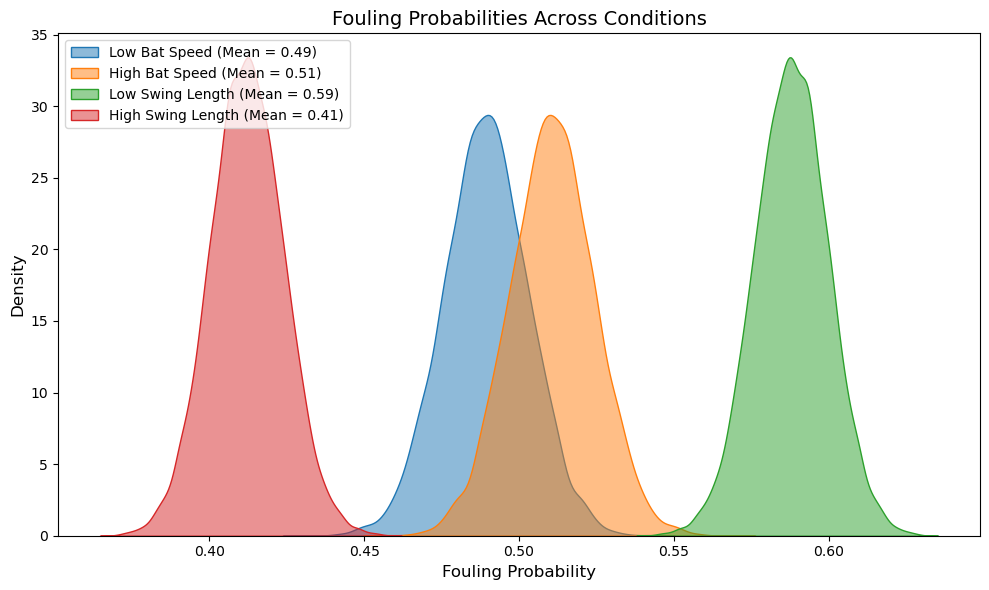

In [160]:
# Plot fouling probabilities for each condition
plt.figure(figsize=(7, 5))
colors = sns.color_palette("tab10", len(foul_probs))

for i, (condition, probs) in enumerate(foul_probs.items()):
    sns.kdeplot(
        probs, color=colors[i], label=f"{condition} (Mean = {np.mean(probs):.2f})", fill=True, alpha=0.5
    )

plt.title("Fouling Probabilities Across Conditions", fontsize=14)
plt.xlabel("Fouling Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.savefig("fouling_probabilities_conditions_mediation.png")
plt.show()



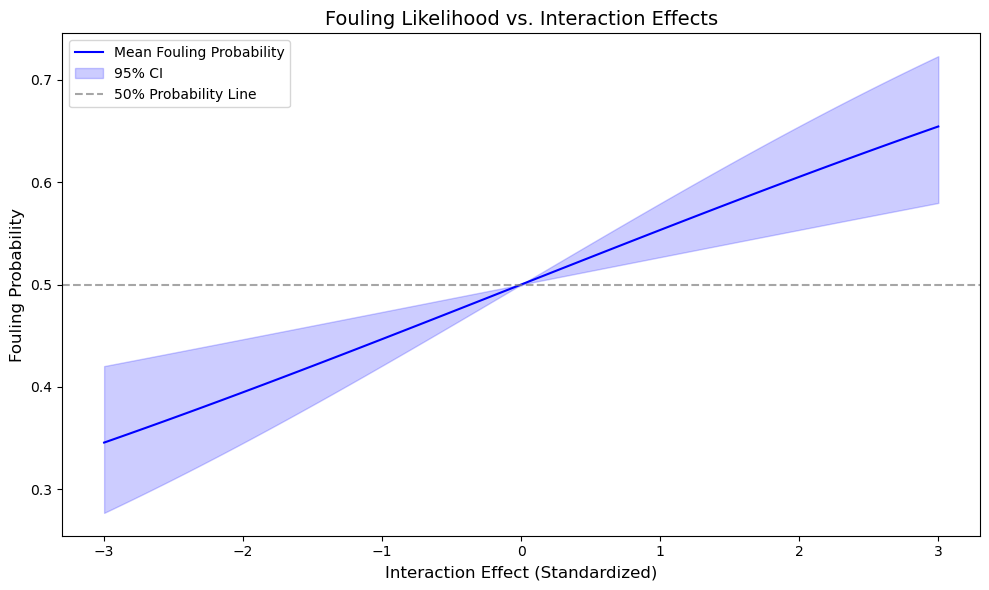

Interaction Range Summary:
Interaction: -3.00, Mean Probability: 0.35, 95% CI: [0.28, 0.42]
Interaction: -2.39, Mean Probability: 0.35, 95% CI: [0.28, 0.42]
Interaction: -1.79, Mean Probability: 0.35, 95% CI: [0.28, 0.42]
Interaction: -1.18, Mean Probability: 0.35, 95% CI: [0.29, 0.43]
Interaction: -0.58, Mean Probability: 0.36, 95% CI: [0.29, 0.43]
Interaction: 0.03, Mean Probability: 0.36, 95% CI: [0.30, 0.43]
Interaction: 0.64, Mean Probability: 0.36, 95% CI: [0.30, 0.43]
Interaction: 1.24, Mean Probability: 0.37, 95% CI: [0.30, 0.43]
Interaction: 1.85, Mean Probability: 0.37, 95% CI: [0.31, 0.43]
Interaction: 2.45, Mean Probability: 0.37, 95% CI: [0.31, 0.43]


In [161]:
# Generate and plot interaction effects
interaction_range = np.linspace(-3, 3, 100)
foul_probs_interaction = np.zeros((len(alpha_release_speed_samples), len(interaction_range)))

for i, interaction in enumerate(interaction_range):
    foul_probs_interaction[:, i] = expit(
        alpha_release_speed_samples * interaction
        + beta_release_speed_samples * interaction
        + beta_pfx_x_samples * interaction
        + beta_pfx_z_samples * interaction
        + beta_plate_x_samples * interaction
        + beta_plate_z_samples * interaction
    )

# Calculate mean and credible intervals
foul_probs_mean = foul_probs_interaction.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs_interaction, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs_interaction, 97.5, axis=0)

# Plot interaction effects
plt.figure(figsize=(10, 6))
plt.plot(interaction_range, foul_probs_mean, label="Mean Fouling Probability", color="blue")
plt.fill_between(interaction_range, foul_probs_lower, foul_probs_upper, color="blue", alpha=0.2, label="95% CI")
plt.title("Fouling Likelihood vs. Interaction Effects", fontsize=14)
plt.xlabel("Interaction Effect (Standardized)", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.axhline(0.5, color="gray", linestyle="--", alpha=0.7, label="50% Probability Line")
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()
plt.savefig("fouling_likelihood_vs_interaction_mediation.png")
plt.show()

# Summary of results
print("Interaction Range Summary:")
for i, interaction in enumerate(interaction_range[::10]):  # Print every 10th interaction value
    print(f"Interaction: {interaction:.2f}, Mean Probability: {foul_probs_mean[i]:.2f}, "
          f"95% CI: [{foul_probs_lower[i]:.2f}, {foul_probs_upper[i]:.2f}]")


## Question 7: How do game context variables (inning, outs, balls) interact with batter mechanics and pitch characteristics to influence the likelihood of fouling off a pitch

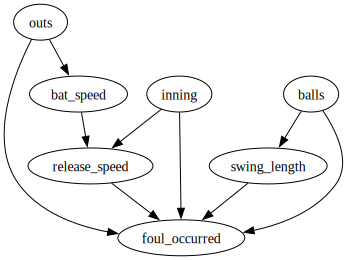

In [165]:
dag_mediators_game_context = CausalGraphicalModel(
    nodes=["bat_speed", "swing_length", "release_speed", "inning", "outs", "balls", "foul_occurred"],
    edges=[
        ("bat_speed", "release_speed"),
        ("release_speed", "foul_occurred"),
        ("inning", "foul_occurred"),
        ("outs", "foul_occurred"),
        ("balls", "foul_occurred"),
        ("inning", "release_speed"),
        ("outs", "bat_speed"),
        ("swing_length", "foul_occurred"),
        ("balls", "swing_length")
    ]
)
dag_mediators_game_context.draw()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_bat_speed, beta_swing_length, beta_release_speed, beta_inning, beta_outs_when_up, beta_balls, beta_inning_bat_speed, beta_outs_release_speed, beta_balls_swing_length, alpha_release_speed, alpha_bat_speed, alpha_swing_length]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 234 seconds.


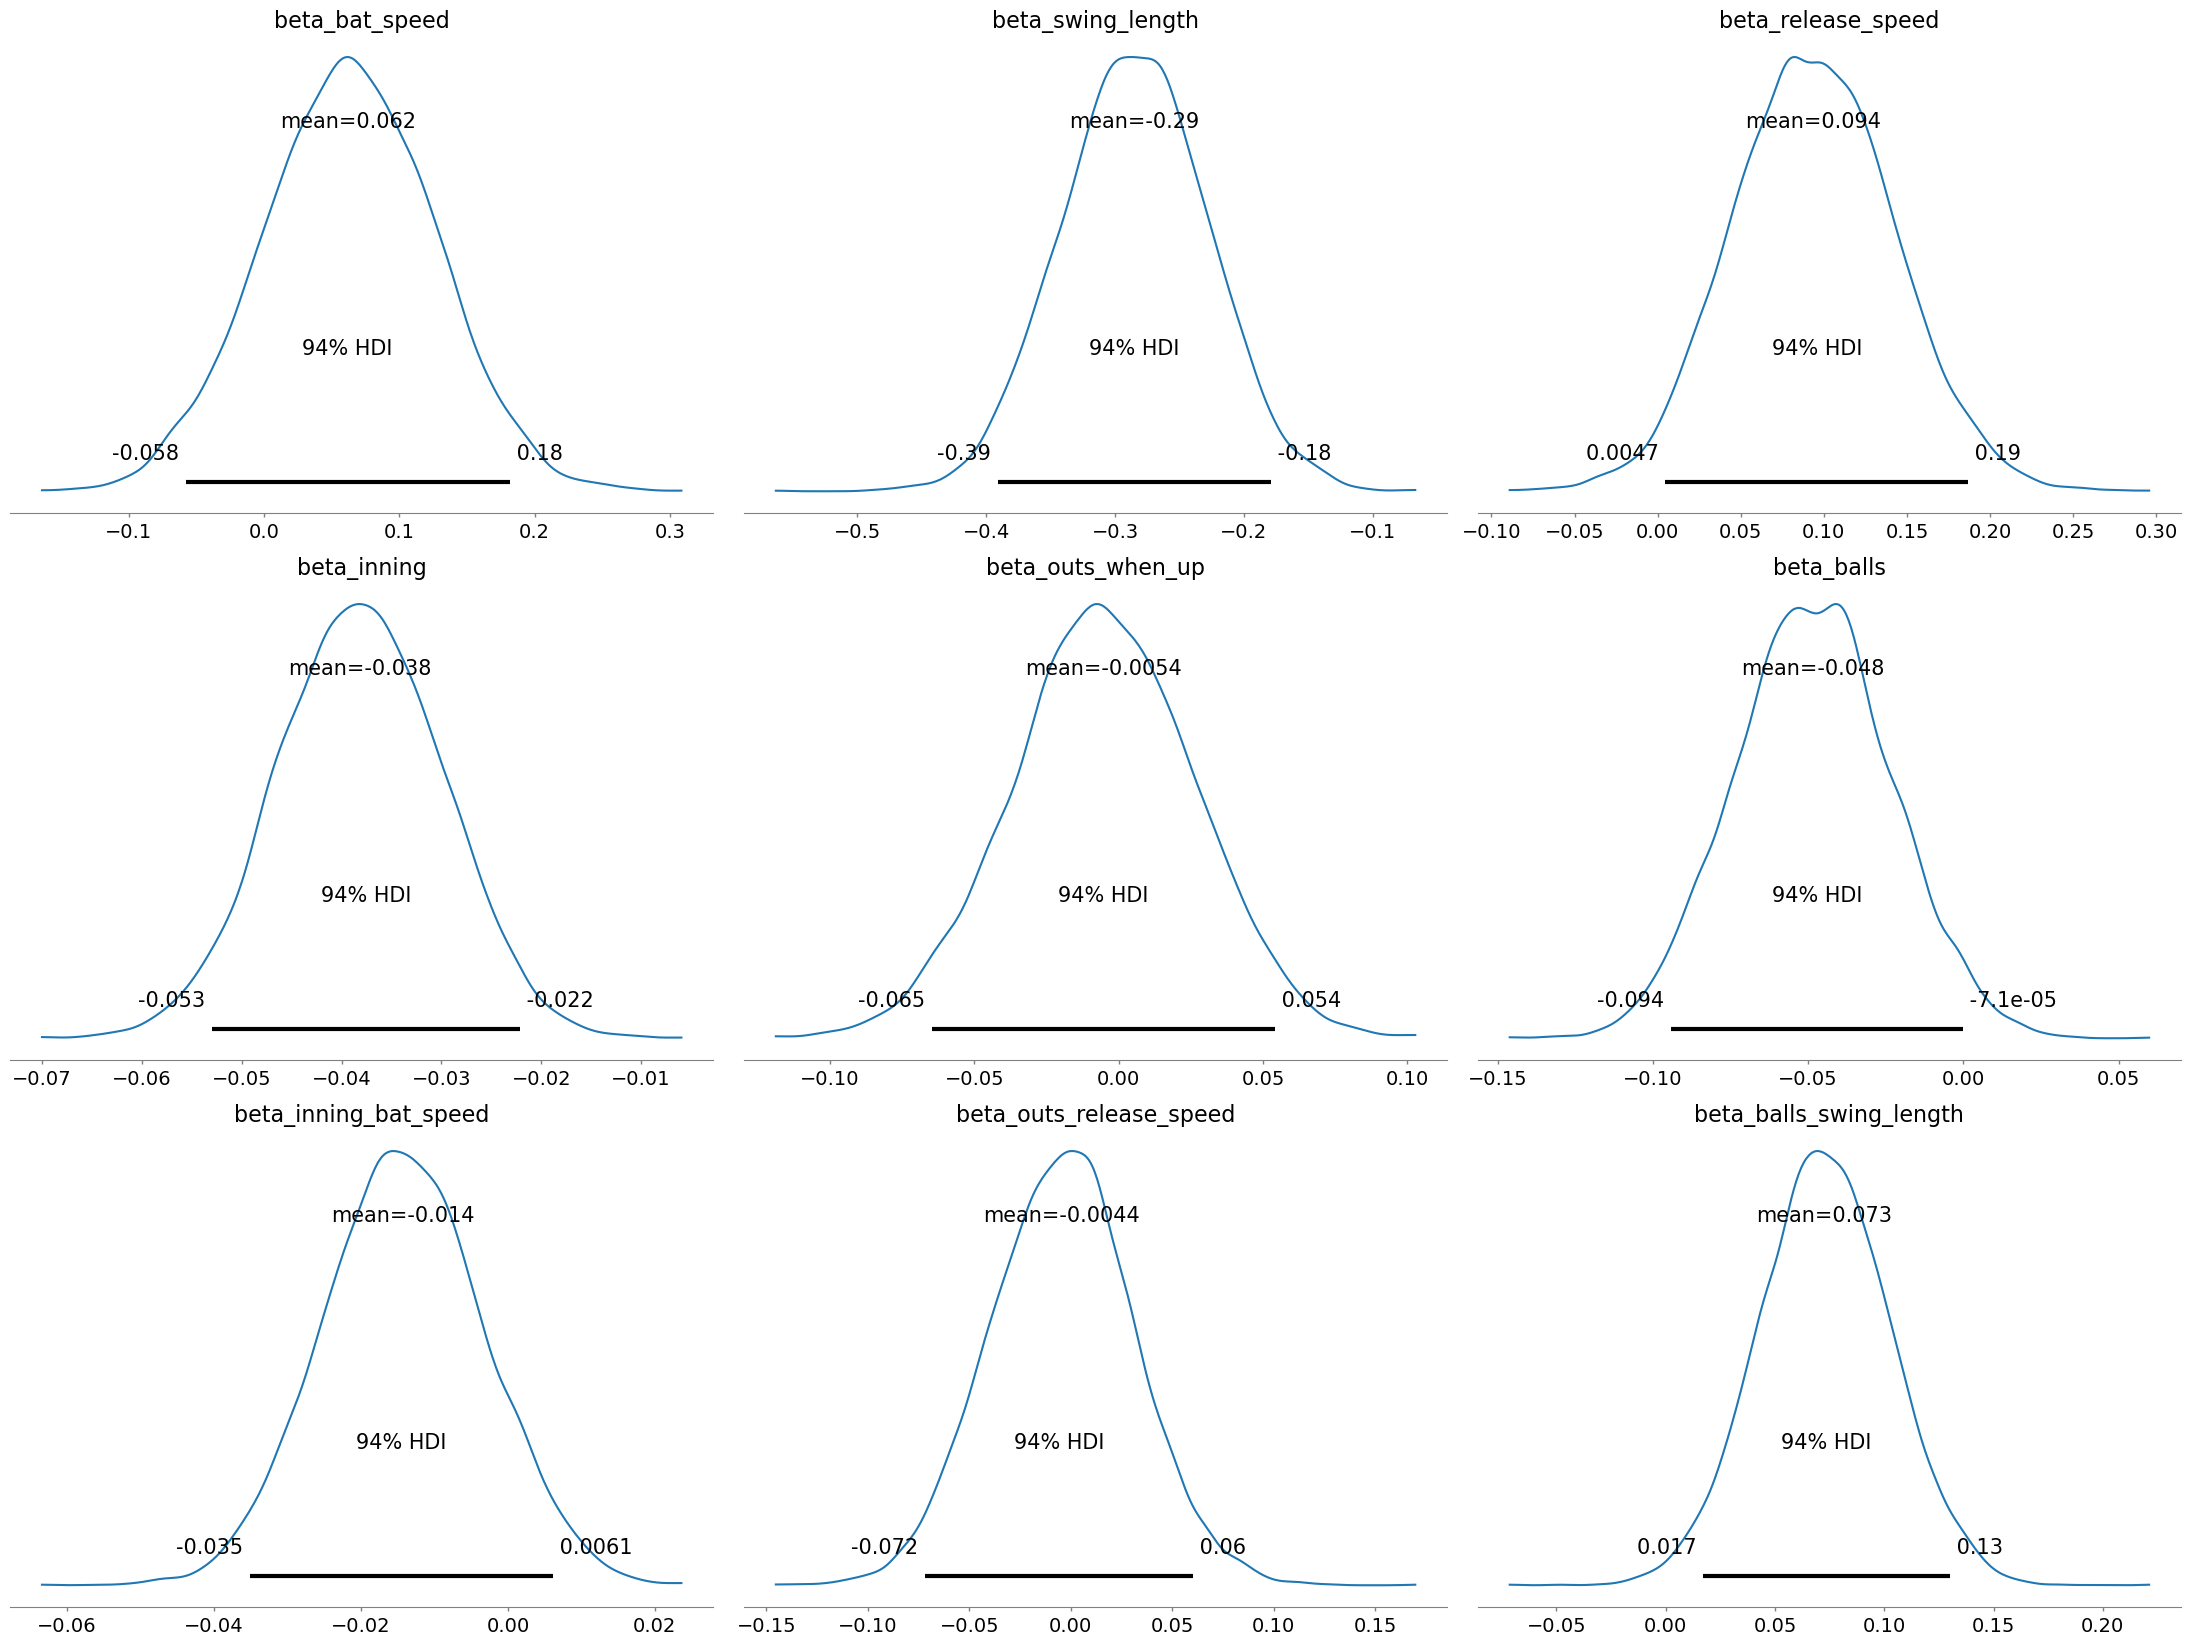

In [170]:
import pymc as pm
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit


with pm.Model() as mediation_model:
    # Priors for batter mechanics
    beta_bat_speed = pm.Normal("beta_bat_speed", mu=0, sigma=1)
    beta_swing_length = pm.Normal("beta_swing_length", mu=0, sigma=1)

    # Priors for pitch characteristics
    beta_release_speed = pm.Normal("beta_release_speed", mu=0, sigma=1)

    # Priors for game context variables
    beta_inning = pm.Normal("beta_inning", mu=0, sigma=1)
    beta_outs = pm.Normal("beta_outs_when_up", mu=0, sigma=1)
    beta_balls = pm.Normal("beta_balls", mu=0, sigma=1)

    # Interaction terms
    beta_inning_bat_speed = pm.Normal("beta_inning_bat_speed", mu=0, sigma=1)
    beta_outs_release_speed = pm.Normal("beta_outs_release_speed", mu=0, sigma=1)
    beta_balls_swing_length = pm.Normal("beta_balls_swing_length", mu=0, sigma=1)

    # Priors for mediators
    alpha_release_speed = pm.Normal("alpha_release_speed", mu=0, sigma=1)
    alpha_bat_speed = pm.Normal("alpha_bat_speed", mu=0, sigma=1)
    alpha_swing_length = pm.Normal("alpha_swing_length", mu=0, sigma=1)

    # Mediation paths
    release_speed = pm.Normal(
        "release_speed",
        mu=alpha_release_speed * data_subset["bat_speed"] + alpha_bat_speed * data_subset["inning"],
        sigma=0.5,
        observed=data_subset["release_speed"],
    )

    # Likelihood of fouling (with interactions)
    logits = (
        beta_bat_speed * data_subset["bat_speed"] +
        beta_swing_length * data_subset["swing_length"] +
        beta_release_speed * release_speed +
        beta_inning * data_subset["inning"] +
        beta_outs * data_subset["outs_when_up"] +
        beta_balls * data_subset["balls"] +
        beta_inning_bat_speed * data_subset["inning"] * data_subset["bat_speed"] +
        beta_outs_release_speed * data_subset["outs_when_up"] * release_speed +
        beta_balls_swing_length * data_subset["balls"] * data_subset["swing_length"]
    )
    foul_prob = pm.Deterministic("foul_prob", pm.math.sigmoid(logits))
    foul_occurred = pm.Bernoulli("foul_occurred", p=foul_prob, observed=data_subset["foul_occurred"])

    # Sampling
    trace = pm.sample(5000, tune=1000, cores=2, return_inferencedata=True)

# Summarize Results
summary = az.summary(trace, hdi_prob=0.95)
# print(summary)

# Save Posterior Summary
summary.to_csv("posterior_summary_game_context_with_interactions.csv")

# Posterior Distributions
az.plot_posterior(trace, var_names=[
    "beta_bat_speed", "beta_swing_length", "beta_release_speed",
    "beta_inning", "beta_outs_when_up", "beta_balls",
    "beta_inning_bat_speed", "beta_outs_release_speed", "beta_balls_swing_length"
])
plt.tight_layout()
plt.savefig("posterior_distributions_game_context_with_interactions.png")
plt.show()


                                             Contrast  Mean Difference  \
0      Early Inning, Few Outs - Late Inning, Few Outs         0.019096   
1    Early Inning, Few Outs - Early Inning, Many Outs         0.002682   
2    Early Inning, Few Outs - Early Inning, Few Balls         0.012320   
3    Early Inning, Few Outs - Late Inning, Many Balls         0.055694   
4      Late Inning, Few Outs - Early Inning, Few Outs        -0.019096   
5     Late Inning, Few Outs - Early Inning, Many Outs        -0.016415   
6     Late Inning, Few Outs - Early Inning, Few Balls        -0.006776   
7     Late Inning, Few Outs - Late Inning, Many Balls         0.036598   
8    Early Inning, Many Outs - Early Inning, Few Outs        -0.002682   
9     Early Inning, Many Outs - Late Inning, Few Outs         0.016415   
10  Early Inning, Many Outs - Early Inning, Few Balls         0.009638   
11  Early Inning, Many Outs - Late Inning, Many Balls         0.053013   
12   Early Inning, Few Balls - Early I

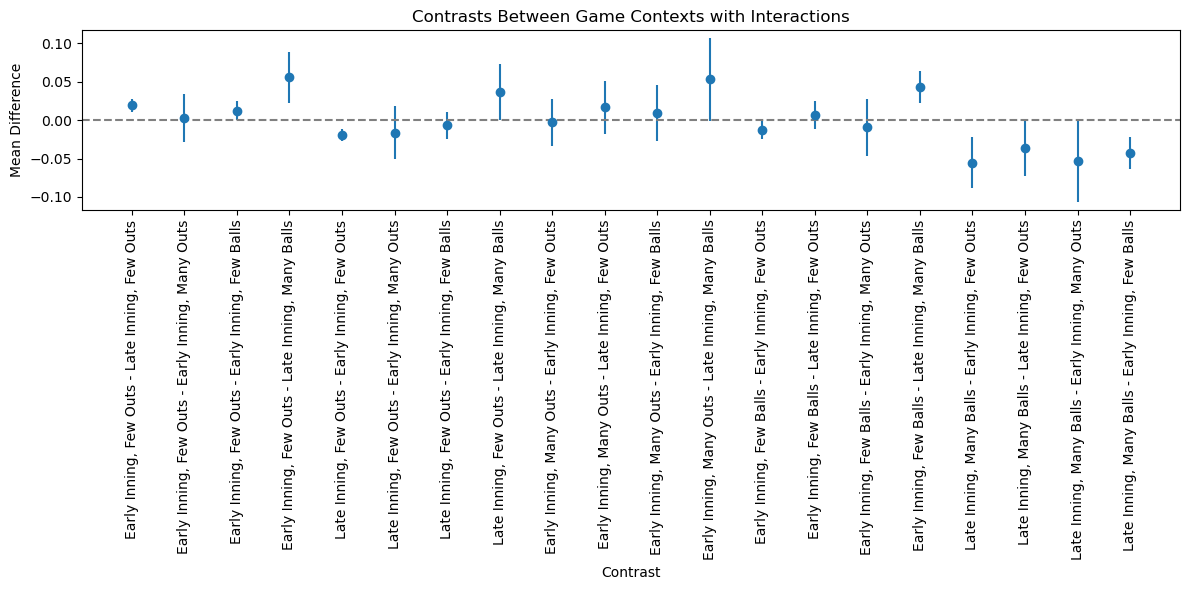

In [175]:
# Extract posterior samples as numeric arrays
beta_inning_samples = trace.posterior["beta_inning"].values.flatten()
beta_outs_samples = trace.posterior["beta_outs_when_up"].values.flatten()
beta_balls_samples = trace.posterior["beta_balls"].values.flatten()
beta_inning_bat_speed_samples = trace.posterior["beta_inning_bat_speed"].values.flatten()
beta_outs_release_speed_samples = trace.posterior["beta_outs_release_speed"].values.flatten()
beta_balls_swing_length_samples = trace.posterior["beta_balls_swing_length"].values.flatten()

# Define contrasts
contrasts = {}
conditions = {
    "Early Inning, Few Outs": (1, 0, 0),
    "Late Inning, Few Outs": (3, 0, 0),
    "Early Inning, Many Outs": (1, 2, 0),
    "Early Inning, Few Balls": (1, 0, 1),
    "Late Inning, Many Balls": (3, 0, 3),
}

# Compute contrasts
for cond1, (inning1, outs1, balls1) in conditions.items():
    for cond2, (inning2, outs2, balls2) in conditions.items():
        if cond1 != cond2:
            prob_diff = (
                expit(
                    beta_inning_samples * inning1 + beta_outs_samples * outs1 + beta_balls_samples * balls1 +
                    beta_inning_bat_speed_samples * inning1 * data_subset["bat_speed"].mean() +
                    beta_outs_release_speed_samples * outs1 * data_subset["release_speed"].mean() +
                    beta_balls_swing_length_samples * balls1 * data_subset["swing_length"].mean()
                ) -
                expit(
                    beta_inning_samples * inning2 + beta_outs_samples * outs2 + beta_balls_samples * balls2 +
                    beta_inning_bat_speed_samples * inning2 * data_subset["bat_speed"].mean() +
                    beta_outs_release_speed_samples * outs2 * data_subset["release_speed"].mean() +
                    beta_balls_swing_length_samples * balls2 * data_subset["swing_length"].mean()
                )
            )
            mean_diff = np.mean(prob_diff)
            ci_diff = np.percentile(prob_diff, [2.5, 97.5])
            contrasts[f"{cond1} - {cond2}"] = {"mean_diff": mean_diff, "95% CI": ci_diff}

# Save contrasts to DataFrame
contrast_df = pd.DataFrame.from_dict(contrasts, orient="index")
contrast_df.reset_index(inplace=True)
contrast_df.columns = ["Contrast", "Mean Difference", "95% CI"]

# Split the 95% CI into two columns
contrast_df[["95% CI Lower", "95% CI Upper"]] = pd.DataFrame(contrast_df["95% CI"].tolist(), index=contrast_df.index)
contrast_df.drop(columns=["95% CI"], inplace=True)

# Display the DataFrame
print(contrast_df)

# Plot Contrasts
plt.figure(figsize=(12, 6))
plt.errorbar(
    contrast_df["Contrast"], contrast_df["Mean Difference"],
    yerr=[
        contrast_df["Mean Difference"] - contrast_df["95% CI Lower"],
        contrast_df["95% CI Upper"] - contrast_df["Mean Difference"]
    ],
    fmt="o"
)
plt.xticks(rotation=90)
plt.axhline(0, color="gray", linestyle="--")
plt.title("Contrasts Between Game Contexts with Interactions")
plt.xlabel("Contrast")
plt.ylabel("Mean Difference")
plt.tight_layout()
plt.savefig("contrasts_game_context_with_interactions.png")
plt.show()


                   Context  Mean Probability  95% CI Lower  95% CI Upper
0   Early Inning, Few Outs          0.490436      0.486397      0.494437
1    Late Inning, Few Outs          0.471340      0.459272      0.483316
2  Early Inning, Many Outs          0.487754      0.457625      0.517143
3  Early Inning, Few Balls          0.478116      0.467579      0.488962
4  Late Inning, Many Balls          0.434742      0.403813      0.466929


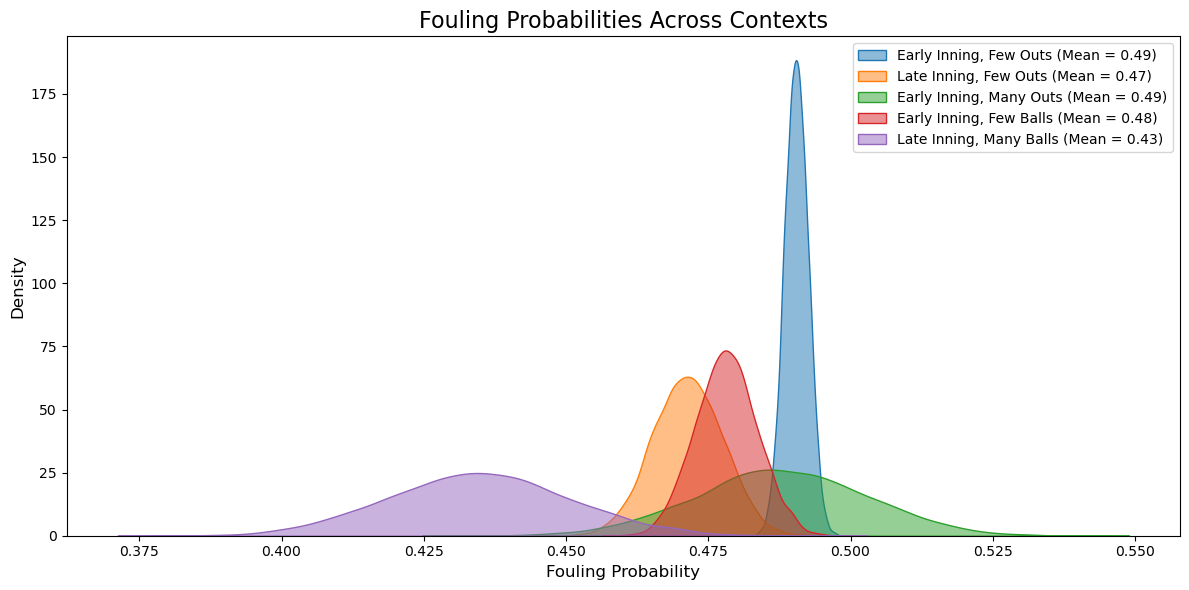

In [178]:
# Define game contexts
contexts = {
    "Early Inning, Few Outs": (1, 0, 0),
    "Late Inning, Few Outs": (3, 0, 0),
    "Early Inning, Many Outs": (1, 2, 0),
    "Early Inning, Few Balls": (1, 0, 1),
    "Late Inning, Many Balls": (3, 0, 3),
}

# Calculate fouling probabilities for each context
foul_probs = {}
for context, (inning, outs, balls) in contexts.items():
    probs = expit(
        beta_inning_samples * inning +
        beta_outs_samples * outs +
        beta_balls_samples * balls +
        beta_inning_bat_speed_samples * inning * data_subset["bat_speed"].mean() +
        beta_outs_release_speed_samples * outs * data_subset["release_speed"].mean() +
        beta_balls_swing_length_samples * balls * data_subset["swing_length"].mean()
    )
    foul_probs[context] = probs

# Summarize probabilities
results = []
for context, probs in foul_probs.items():
    mean_prob = np.mean(probs)
    ci_lower, ci_upper = np.percentile(probs, [2.5, 97.5])
    results.append({"Context": context, "Mean Probability": mean_prob, "95% CI Lower": ci_lower, "95% CI Upper": ci_upper})

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Save to CSV
results_df.to_csv("fouling_probabilities_across_contexts.csv", index=False)

# Plot fouling probabilities
plt.figure(figsize=(12, 6))
for context, probs in foul_probs.items():
    sns.kdeplot(probs, label=f"{context} (Mean = {np.mean(probs):.2f})", fill=True, alpha=0.5)
plt.title("Fouling Probabilities Across Contexts", fontsize=16)
plt.xlabel("Fouling Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig("fouling_probabilities_across_contexts.png")
plt.show()


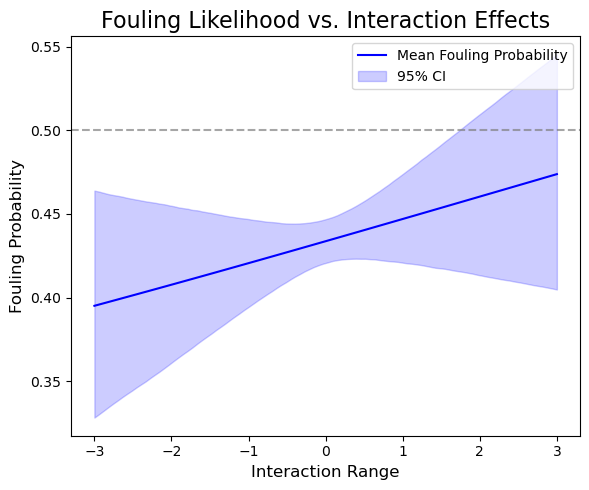

In [181]:
# Define range for interactions
interaction_range = np.linspace(-3, 3, 100)

# Initialize array for fouling probabilities
foul_probs_interaction = np.zeros((len(beta_inning_samples), len(interaction_range)))

# Calculate probabilities for each interaction value
for i, interaction in enumerate(interaction_range):
    foul_probs_interaction[:, i] = expit(
        beta_inning_samples * data_subset["inning"].mean() +
        beta_outs_samples * data_subset["outs_when_up"].mean() +
        beta_balls_samples * data_subset["balls"].mean() +
        beta_inning_bat_speed_samples * interaction +
        beta_outs_release_speed_samples * interaction +
        beta_balls_swing_length_samples * interaction
    )

# Compute mean and credible intervals
foul_probs_mean = foul_probs_interaction.mean(axis=0)
foul_probs_lower = np.percentile(foul_probs_interaction, 2.5, axis=0)
foul_probs_upper = np.percentile(foul_probs_interaction, 97.5, axis=0)

# Plot the interaction effects
plt.figure(figsize=(6, 5))
plt.plot(interaction_range, foul_probs_mean, label="Mean Fouling Probability", color="blue")
plt.fill_between(interaction_range, foul_probs_lower, foul_probs_upper, color="blue", alpha=0.2, label="95% CI")
plt.axhline(0.5, color="gray", linestyle="--", alpha=0.7)
plt.title("Fouling Likelihood vs. Interaction Effects", fontsize=16)
plt.xlabel("Interaction Range", fontsize=12)
plt.ylabel("Fouling Probability", fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig("fouling_likelihood_vs_interaction.png")
plt.show()


#                                       END

# Code for saving all the dags in pdf format

In [184]:
from causalgraphicalmodels import CausalGraphicalModel
import graphviz

# function to save DAGs as PDF
def save_dag_to_pdf(dag, filename):
    """
    Saves a DAG (CausalGraphicalModel) as a PDF file.

    Parameters:
        dag (CausalGraphicalModel): The DAG to save.
        filename (str): The name of the PDF file (without extension).
    """
    graph = dag.draw()
    graph.format = "pdf"
    graph.render(filename, cleanup=True)  # Save as PDF and remove intermediate files


# Define all DAGs
dags = {
    "dag_bat_speed": CausalGraphicalModel(
        nodes=["bat_speed", "foul_occurred"],
        edges=[("bat_speed", "foul_occurred")]
    ),
    "dag_swing_length": CausalGraphicalModel(
        nodes=["swing_length", "foul_occurred"],
        edges=[("swing_length", "foul_occurred")]
    ),
    "dag_release_speed": CausalGraphicalModel(
        nodes=["release_speed", "foul_occurred"],
        edges=[("release_speed", "foul_occurred")]
    ),
    "dag_interaction": CausalGraphicalModel(
        nodes=["bat_speed", "swing_length", "interaction", "foul_occurred"],
        edges=[
            ("bat_speed", "foul_occurred"),
            ("swing_length", "foul_occurred"),
            ("bat_speed", "interaction"),
            ("swing_length", "interaction"),
            ("interaction", "foul_occurred")
        ]
    ),
    "dag_interaction_pitch_movement": CausalGraphicalModel(
        nodes=["bat_speed", "swing_length", "pfx_x", "pfx_z", "foul_occurred"],
        edges=[
            ("bat_speed", "pfx_x"),
            ("bat_speed", "pfx_z"),
            ("swing_length", "pfx_x"),
            ("swing_length", "pfx_z"),
            ("pfx_x", "foul_occurred"),
            ("pfx_z", "foul_occurred")
        ]
    ),
    "dag_mediation_game_situation": CausalGraphicalModel(
        nodes=["bat_speed", "swing_length", "stand", "p_throws", "foul_occurred"],
        edges=[
            ("bat_speed", "foul_occurred"),
            ("swing_length", "foul_occurred"),
            ("stand", "foul_occurred"),
            ("p_throws", "foul_occurred"),
            ("stand", "bat_speed"),
            ("p_throws", "swing_length")
        ]
    ),
    "dag_mediated_by_pitch": CausalGraphicalModel(
        nodes=["bat_speed", "swing_length", "release_speed", "pfx_x", "pfx_z", "plate_x", "plate_z", "foul_occurred"],
        edges=[
            ("bat_speed", "release_speed"),
            ("bat_speed", "pfx_x"),
            ("bat_speed", "pfx_z"),
            ("swing_length", "plate_x"),
            ("swing_length", "plate_z"),
            ("release_speed", "foul_occurred"),
            ("pfx_x", "foul_occurred"),
            ("pfx_z", "foul_occurred"),
            ("plate_x", "foul_occurred"),
            ("plate_z", "foul_occurred")
        ]
    ),
    "dag_mediators_game_context": CausalGraphicalModel(
        nodes=["bat_speed", "swing_length", "release_speed", "inning", "outs", "balls", "foul_occurred"],
        edges=[
            ("bat_speed", "release_speed"),
            ("release_speed", "foul_occurred"),
            ("inning", "foul_occurred"),
            ("outs", "foul_occurred"),
            ("balls", "foul_occurred"),
            ("inning", "release_speed"),
            ("outs", "bat_speed"),
            ("swing_length", "foul_occurred"),
            ("balls", "swing_length")
        ]
    )
}

# Save all DAGs as PDFs
for name, dag in dags.items():
    save_dag_to_pdf(dag, name)

print("All DAGs saved as PDF files.")


All DAGs saved as PDF files.
